In [1]:
import jCMIP as jc
import matplotlib.pyplot as plt
import copy
import os.path
from netCDF4 import Dataset
import numpy as np

In [2]:
# Check if variable exists in netCDF file:
def check_var(infile,var):
    ncid = Dataset(infile,'r')
    vars = ncid.variables.keys()
    ncid.close()
    
    if var in vars:
        return True
    else:
        return False

# Finds all points in a closed region (non-recursive):
def find_points(A,sty,stx):
    ni = np.size(A,axis=1)
    nj = np.size(A,axis=0)
    #print(ni*nj)
    
    if A[sty,stx] == 0:
        print('invalid starting point')
    else:
        plist = np.asarray([[sty,stx],])
        
        cc = 0
        
        while ((np.size(plist) !=0)):
            cc = cc + 1
            #print(np.shape(plist))

            sty = plist[0,0]
            stx = plist[0,1]
            
            if A[sty,stx] == 1:
                # Find all the connected points:
                
                # left
                ptx = stx - 1
                pty = sty
                if ptx == -1:
                    ptx = ni-1
                if A[pty,ptx] == 1:
                    plist = np.concatenate((plist,[[pty,ptx],]),0)
                
                # up
                ptx = stx
                pty = sty + 1
                if pty < nj:   
                    if A[pty,ptx] == 1:
                        plist = np.concatenate((plist,[[pty,ptx],]),0)

                # right 
                ptx = stx + 1
                pty = sty
                if ptx == ni:
                    ptx = 0
                if A[pty,ptx] == 1:  
                    plist = np.concatenate((plist,[[pty,ptx],]),0)

                # down
                ptx = stx
                pty = sty - 1
                if pty >= 0:
                    if A[pty,ptx] == 1:
                        plist = np.concatenate((plist,[[pty,ptx],]),0)
                
            A[sty,stx] = 2
            plist = np.delete(plist,0,0)
            
    A[np.where(A != 2)] = 0
    A[np.where(A == 2)] = 1
    print(cc)
    
    
def find_points2(A,sty,stx):
    ni = np.size(A,axis=1)
    nj = np.size(A,axis=0)
    #print(ni*nj)
    
    if A[sty,stx] == 0:
        print('invalid starting point')
    else:
        plist = np.asarray([[sty,stx],])
        
        cc = 0
        
        while ((np.size(plist) !=0) & (cc < 52000)):
            cc = cc + 1
            #print(np.shape(plist))

            sty = plist[0,0]
            stx = plist[0,1]
            
            if A[sty,stx] == 1:
                # Find all the connected points:
                
                # left
                ptx = stx - 1
                pty = sty
                if ptx == -1:
                    ptx = ni-1
                if A[pty,ptx] == 1:
                    plist = np.concatenate((plist,[[pty,ptx],]),0)
                
                # up
                ptx = stx
                pty = sty + 1
                if pty < nj:   
                    if A[pty,ptx] == 1:
                        plist = np.concatenate((plist,[[pty,ptx],]),0)

                # right 
                ptx = stx + 1
                pty = sty
                if ptx == ni:
                    ptx = 0
                if A[pty,ptx] == 1:  
                    plist = np.concatenate((plist,[[pty,ptx],]),0)

                # down
                ptx = stx
                pty = sty - 1
                if pty >= 0:
                    if A[pty,ptx] == 1:
                        plist = np.concatenate((plist,[[pty,ptx],]),0)
                
            A[sty,stx] = 2
            plist = np.delete(plist,0,0)
            
    A[np.where(A != 2)] = 0
    A[np.where(A == 2)] = 1
    print(cc)

In [3]:
cmip   = '6'
#cmip   = '5'
Clist = jc.readList(('../CMIP' + cmip + 'list'))
Models = list(Clist.keys())
nm     = len(Models)
#nm = 25

/gws/pw/j07/wishbone/jmecki/CMIP6/basins/ACCESS-CM2_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/ACCESS-ESM1-5_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/ACCESS-OM2_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/ACCESS-OM2-025_basins.nc already exists
Need to compute ocean mesh_mask file first for AWI-CM-1-1-HR
Need to compute ocean mesh_mask file first for AWI-CM-1-1-LR
Need to compute ocean mesh_mask file first for AWI-CM-1-1-MR
Need to compute ocean mesh_mask file first for AWI-ESM-1-1-LR
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/BCC-CSM2-HR_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/BCC-CSM2-MR_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/BCC-ESM1_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/CAMS-CSM1-0_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/CAS-ESM2-0_basins.nc already exists
Need to compute ocean mesh_mask file first for CESM1-C

/home/users/jmecking001/miniconda3/envs/working/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


/gws/pw/j07/wishbone/jmecki/CMIP6/basins/CNRM-ESM2-1_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/CanESM5_basins.nc already exists
Need to compute ocean mesh_mask file first for CanESM5-CanOE
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/E3SM-1-0_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/E3SM-1-1_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/E3SM-1-1-ECA_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/EC-Earth3_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/EC-Earth3-AerChem_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/EC-Earth3-CC_basins.nc already exists
Need to compute ocean mesh_mask file first for EC-Earth3-LR
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/EC-Earth3-Veg_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/EC-Earth3-Veg-LR_basins.nc already exists
/gws/pw/j07/wishbone/jmecki/CMIP6/basins/EC-Earth3P_basins.nc already exists
/gws/pw/j07/wishbon

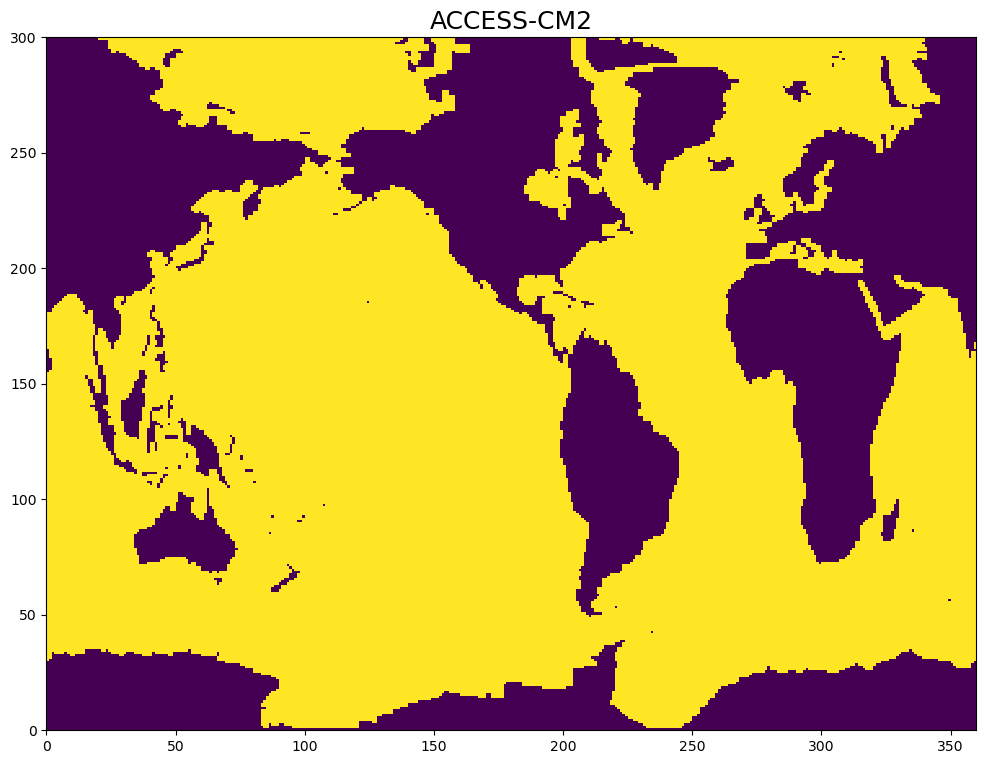

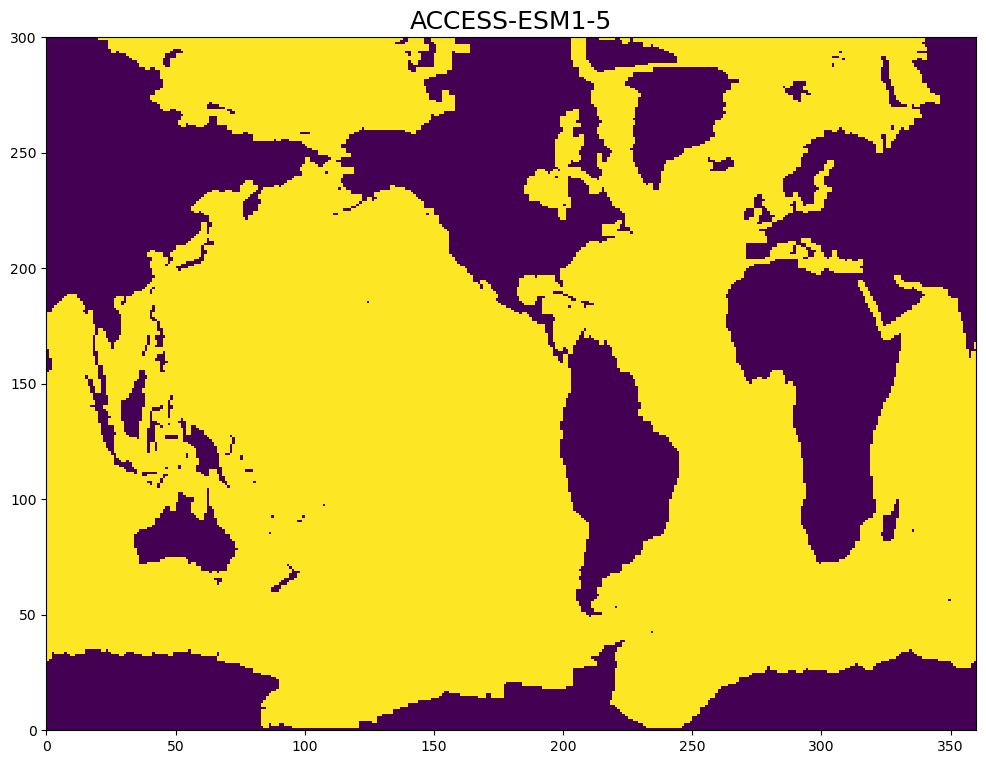

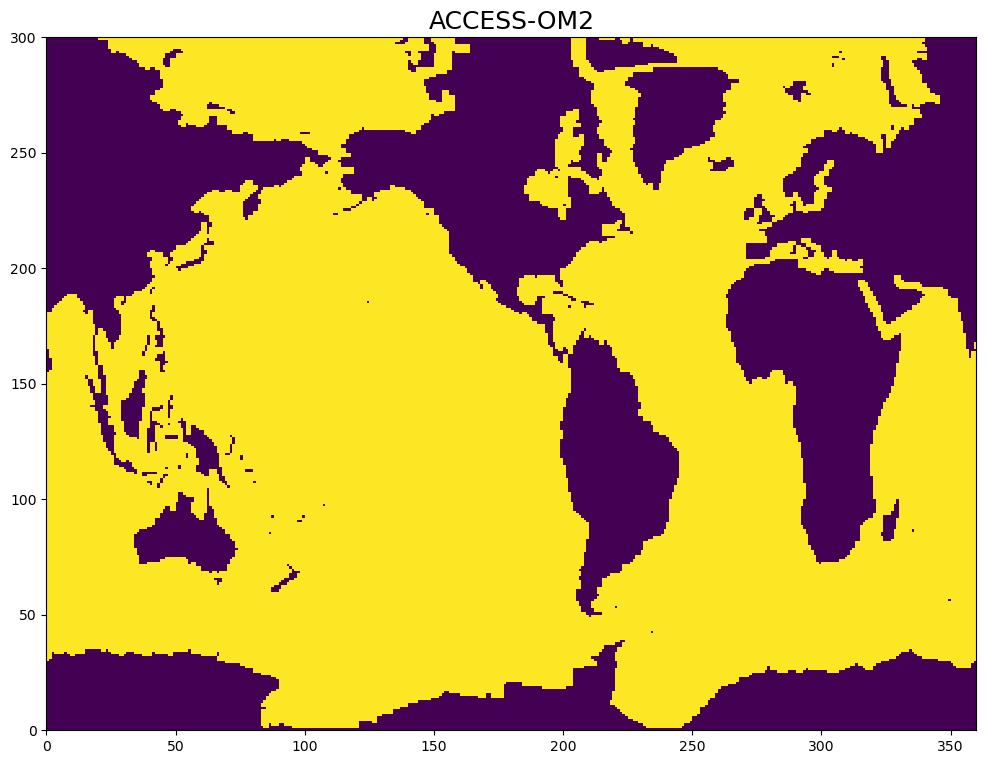

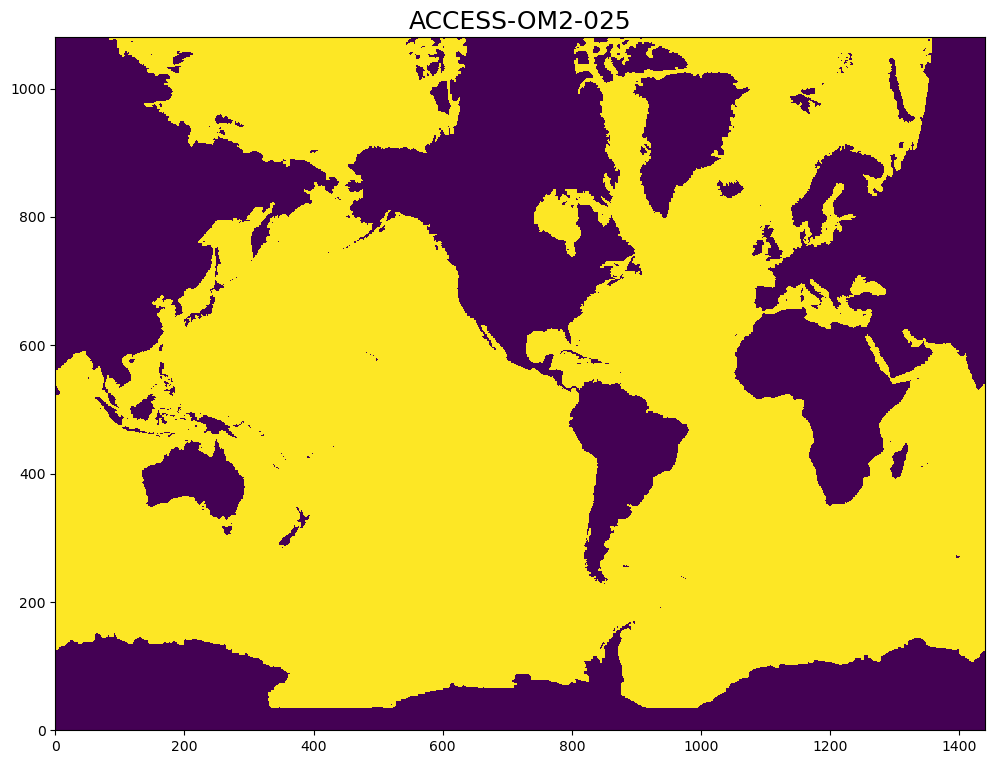

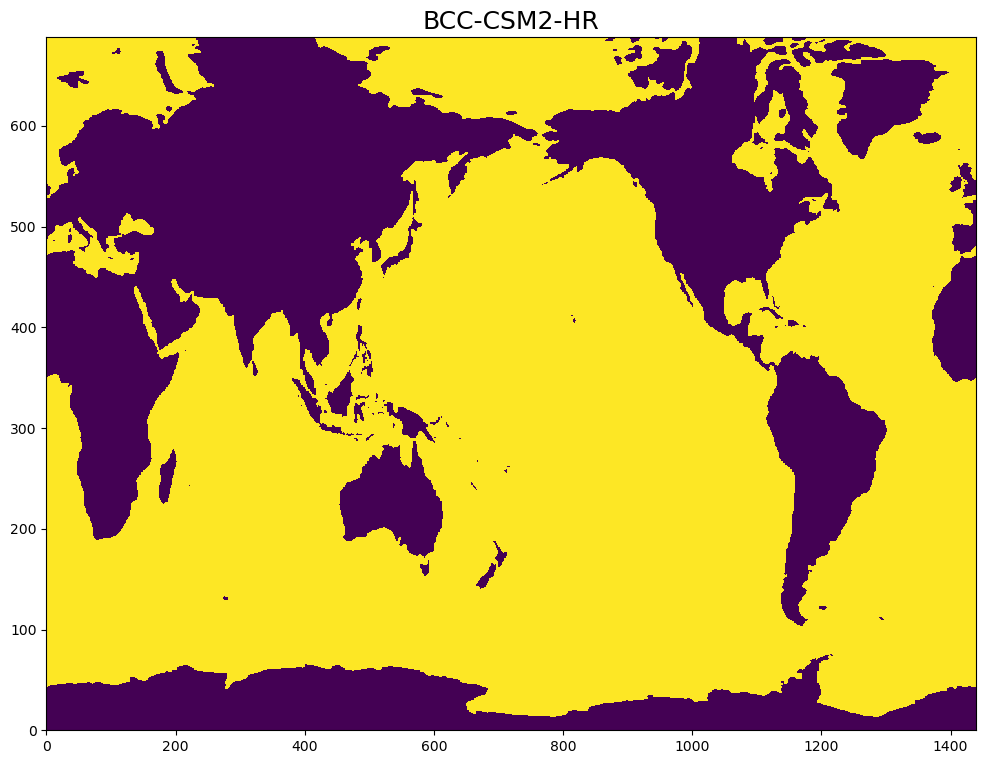

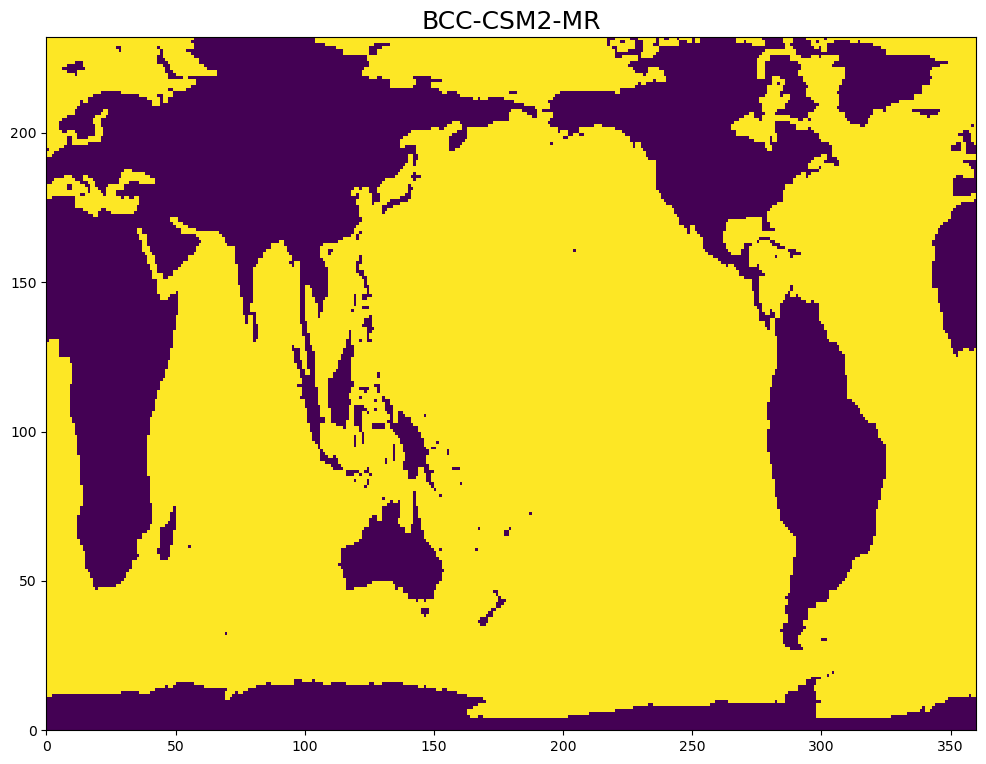

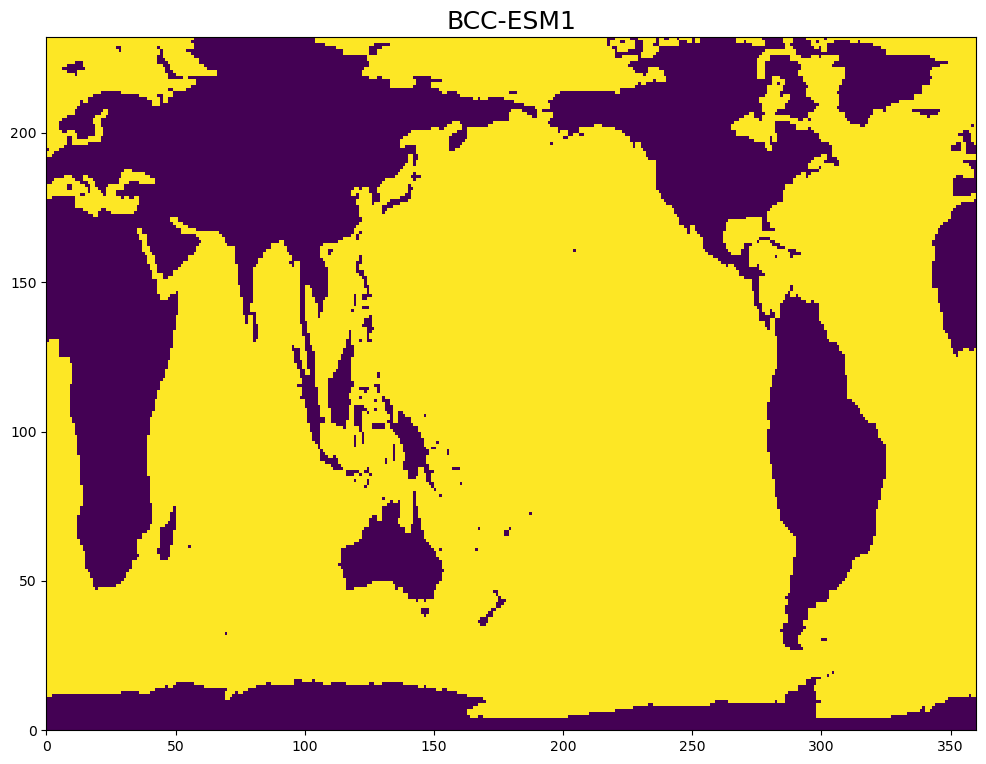

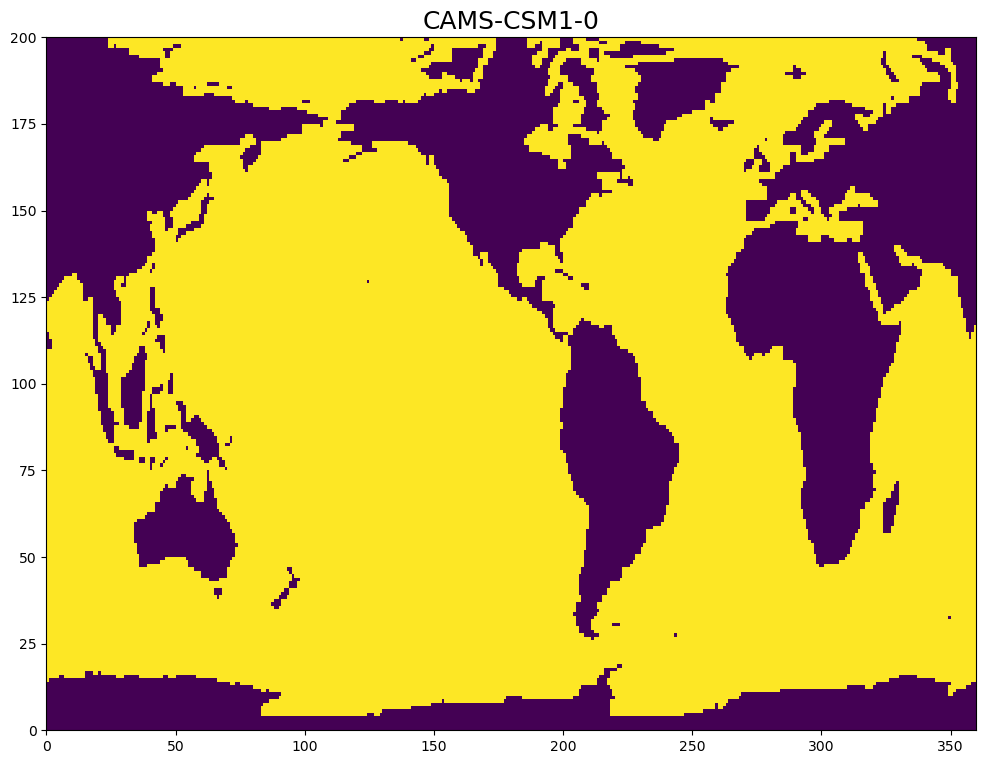

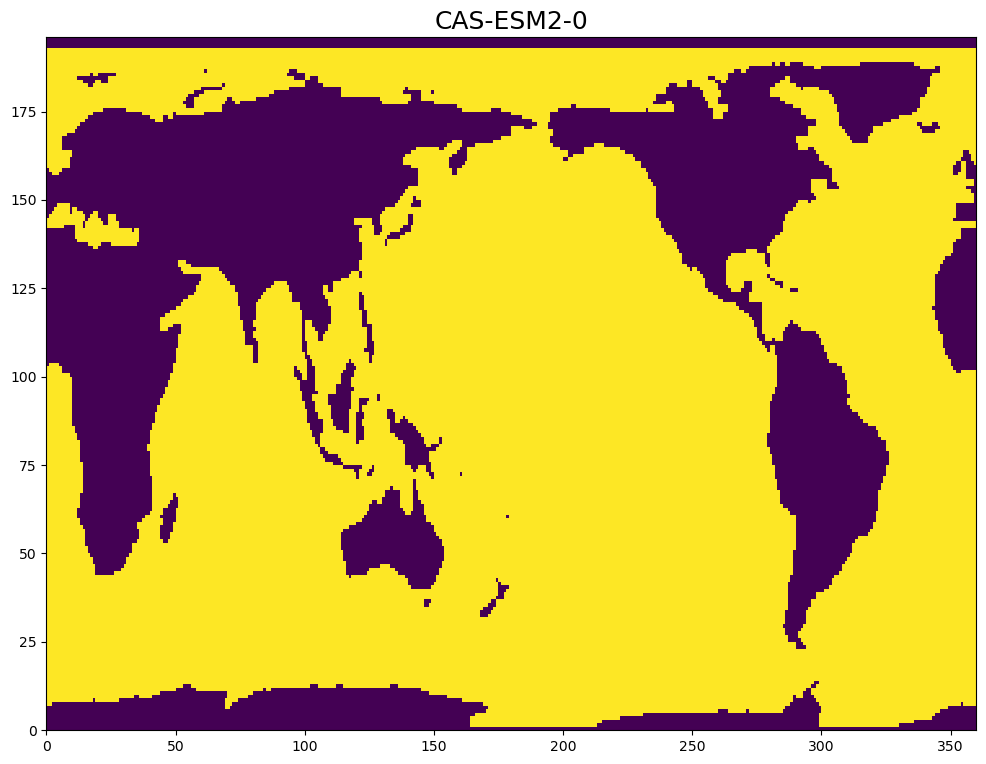

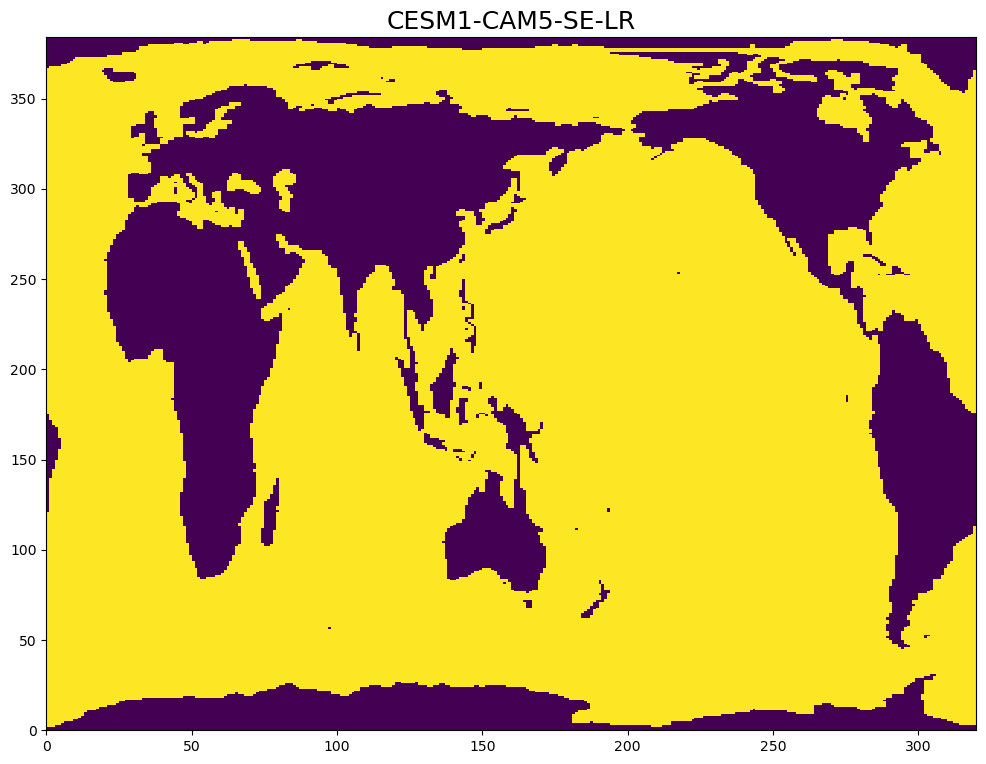

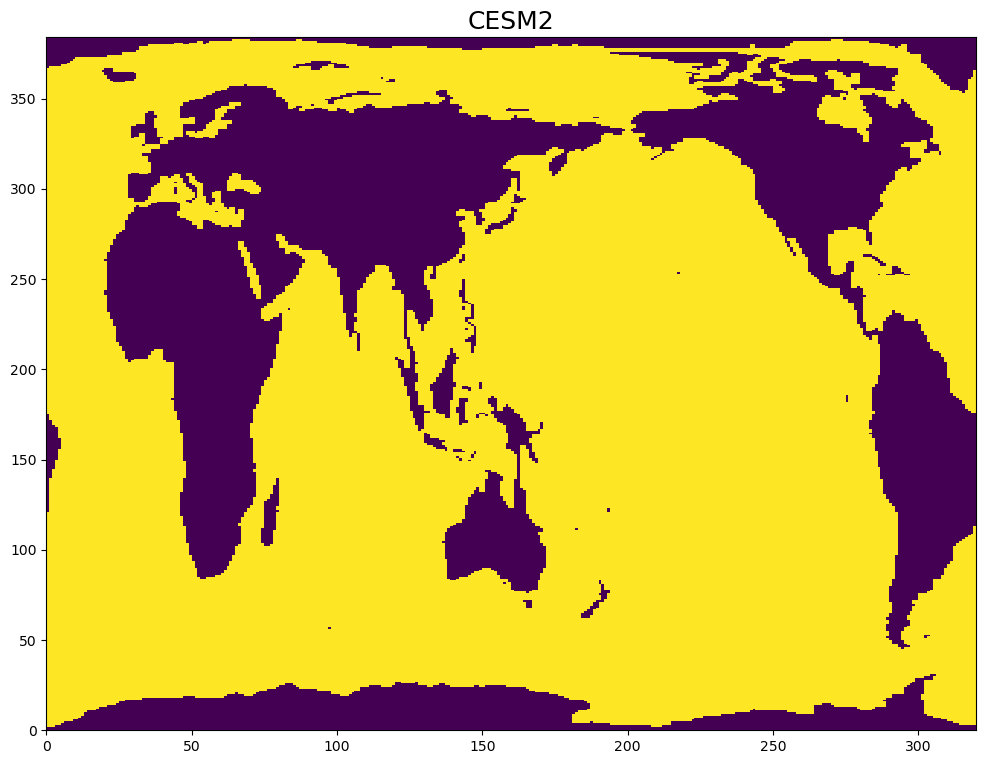

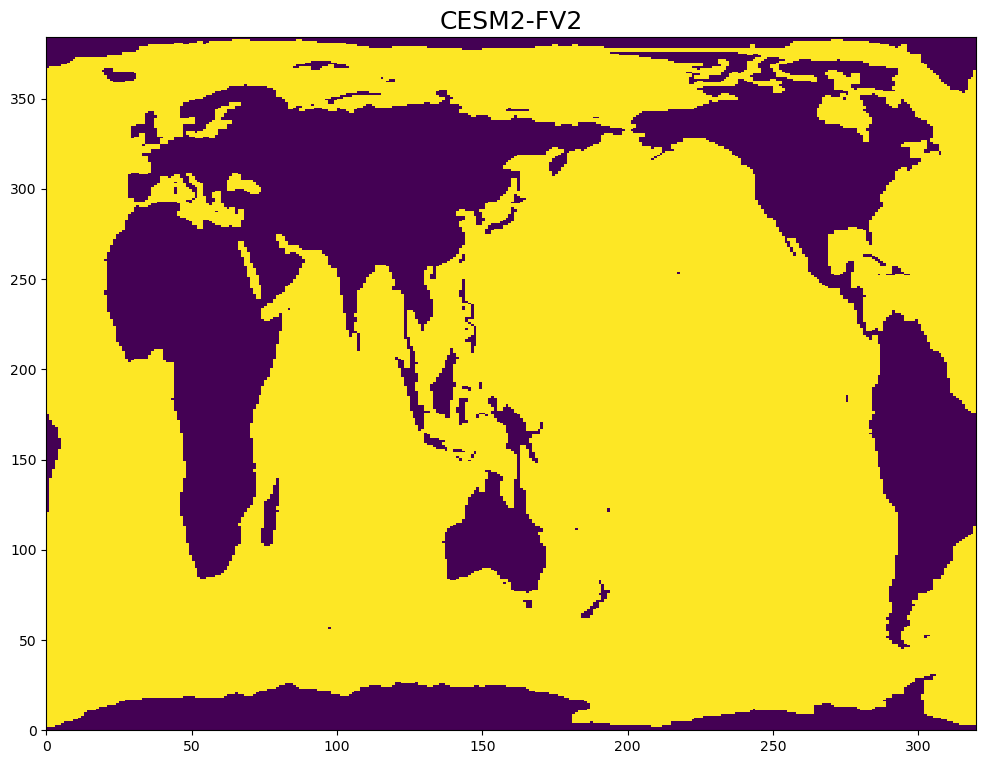

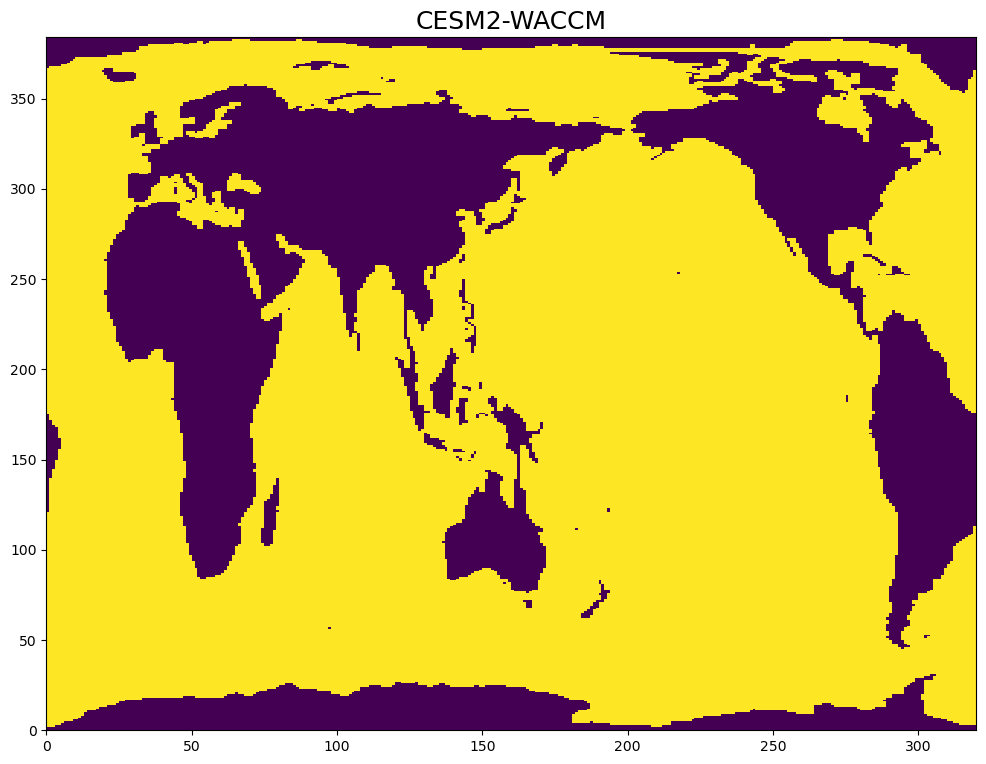

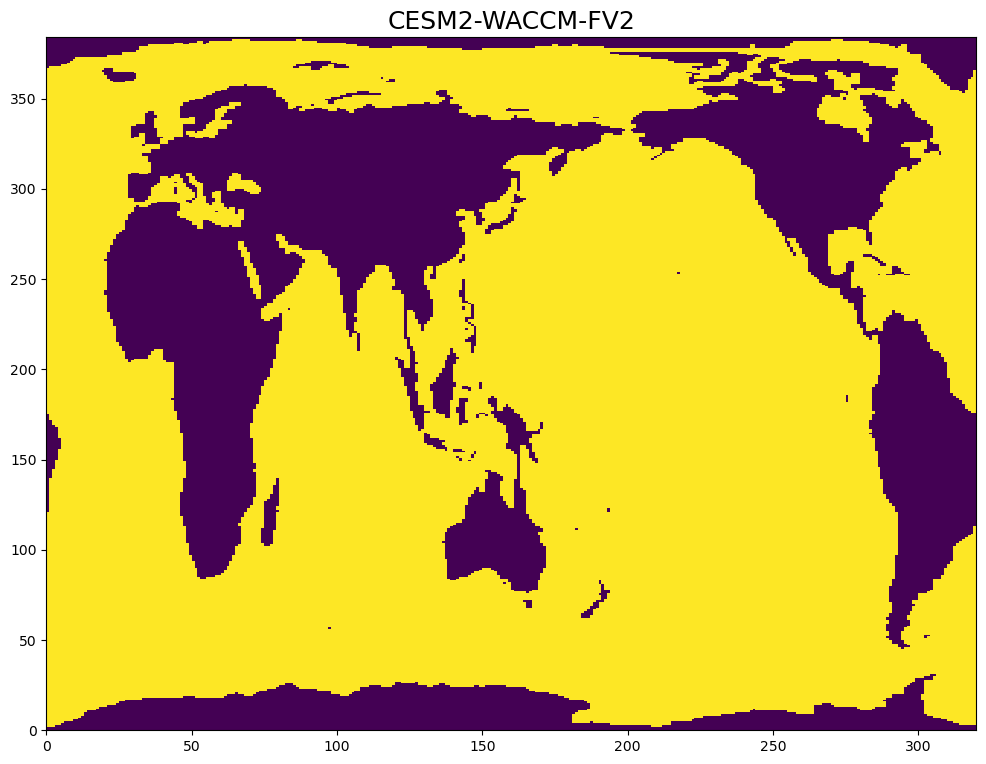

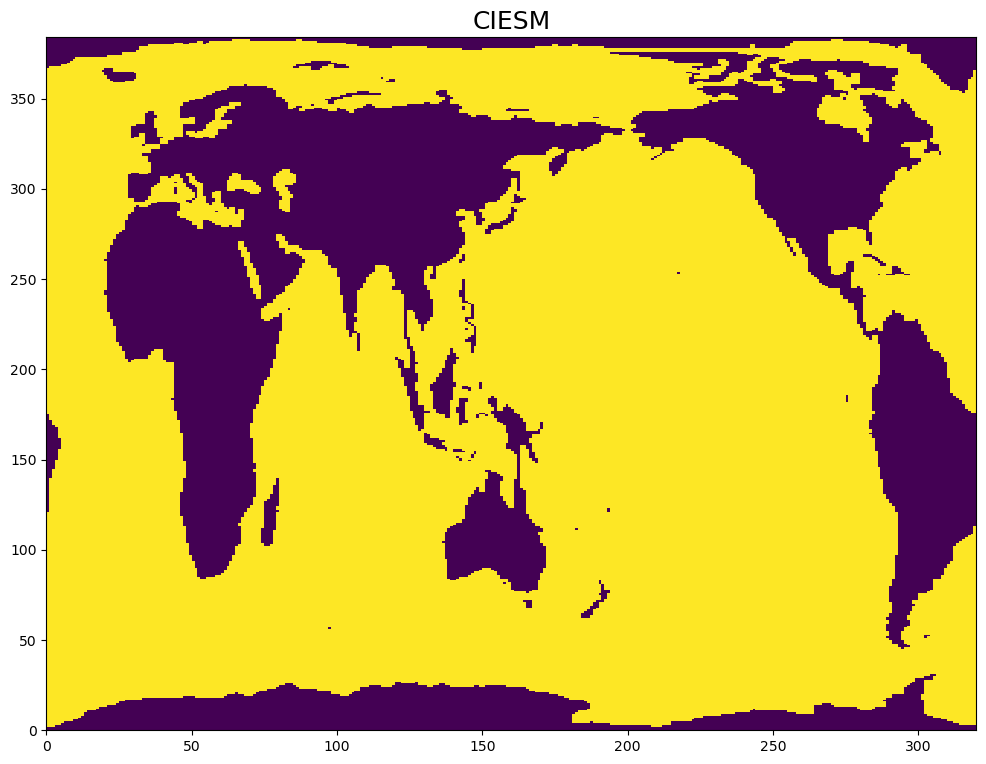

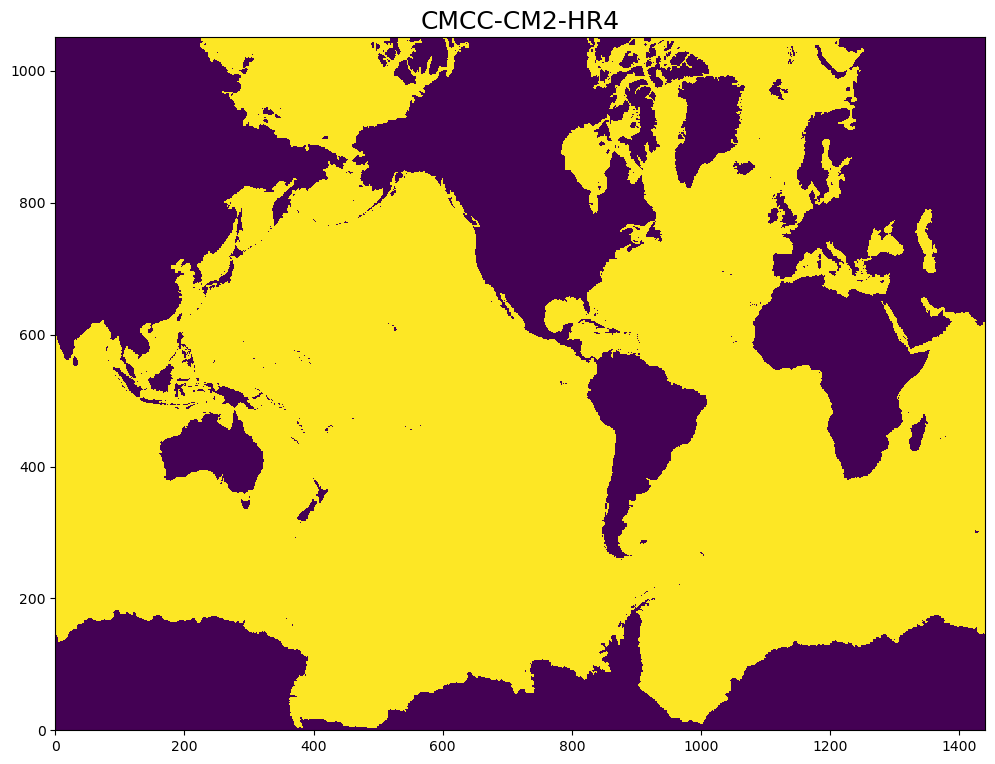

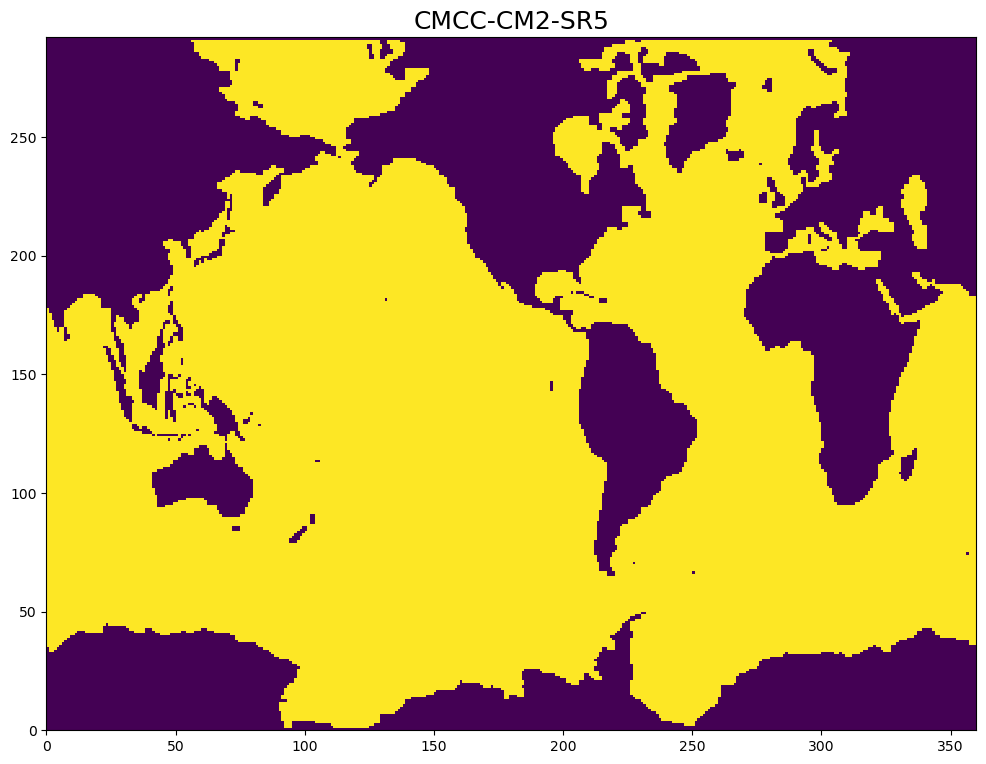

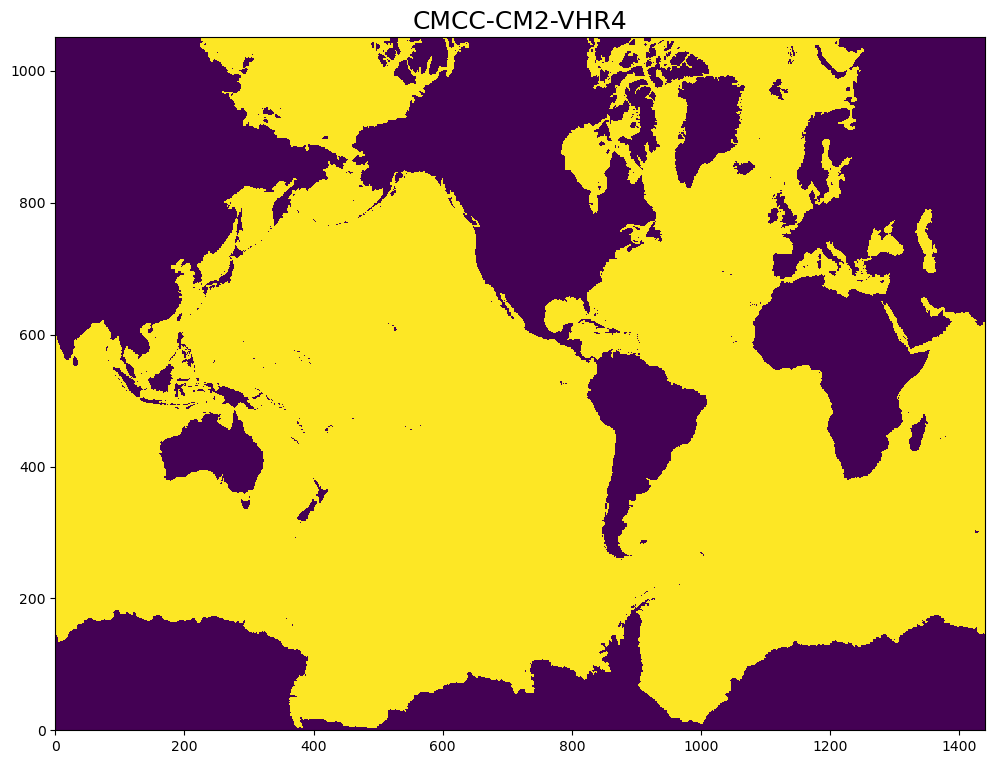

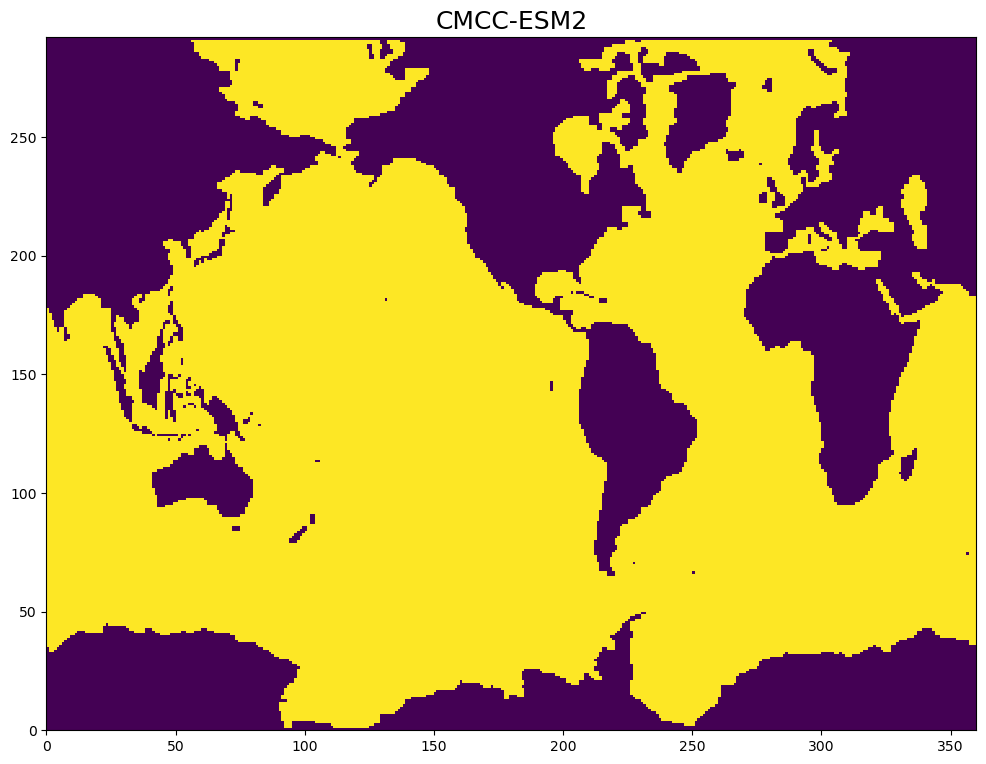

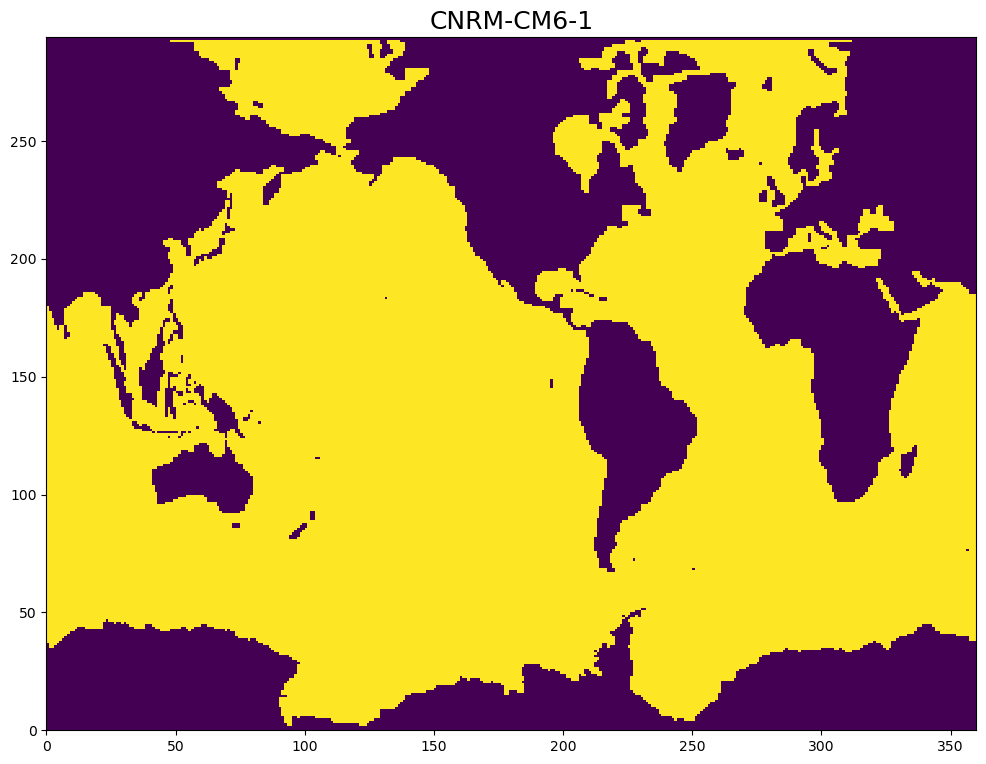

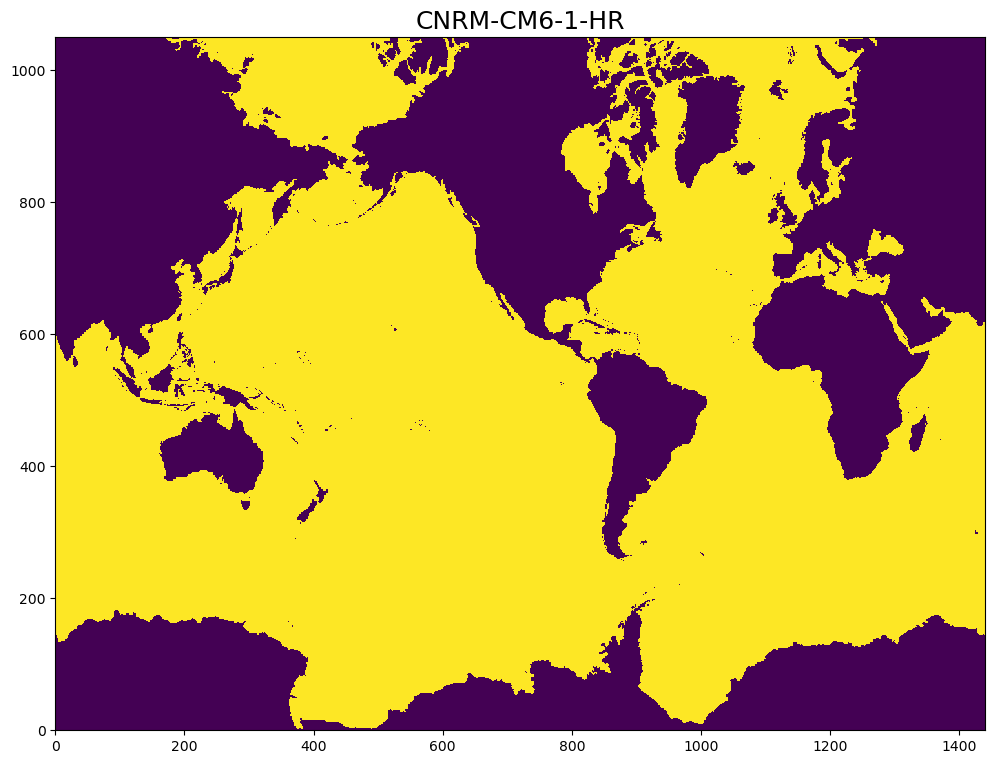

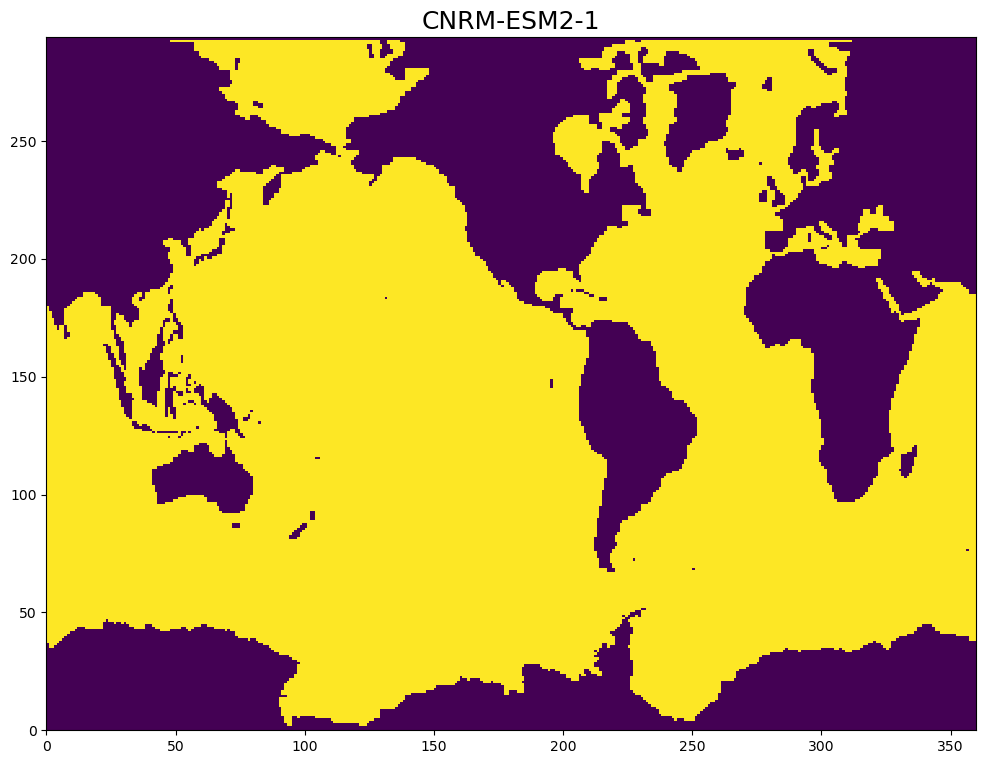

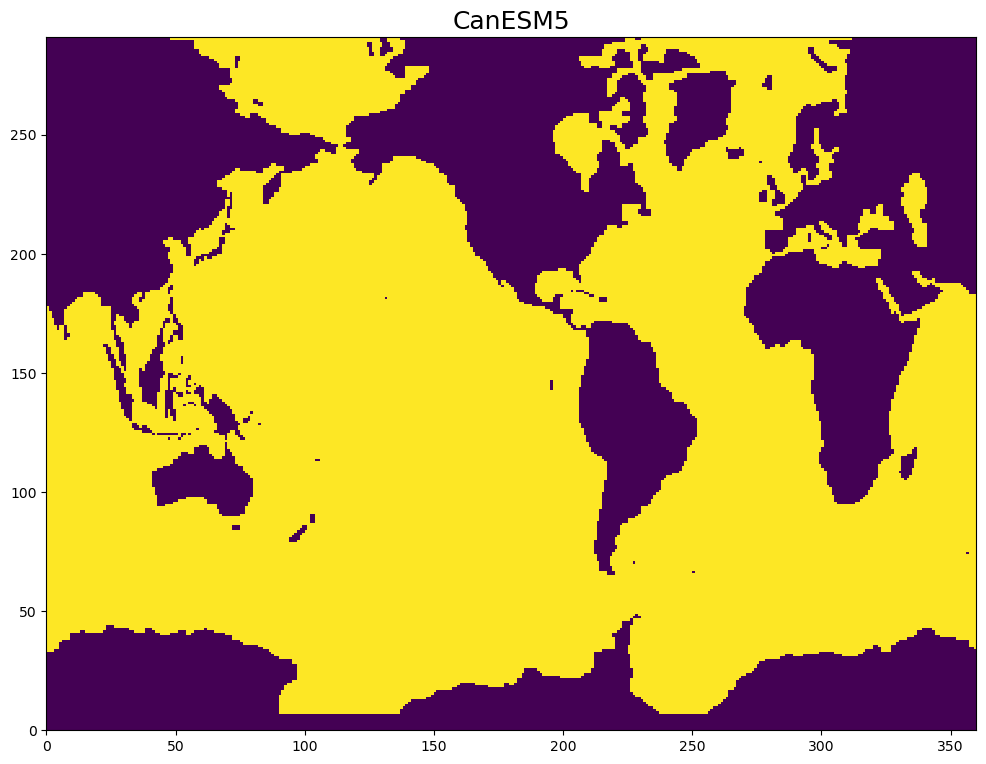

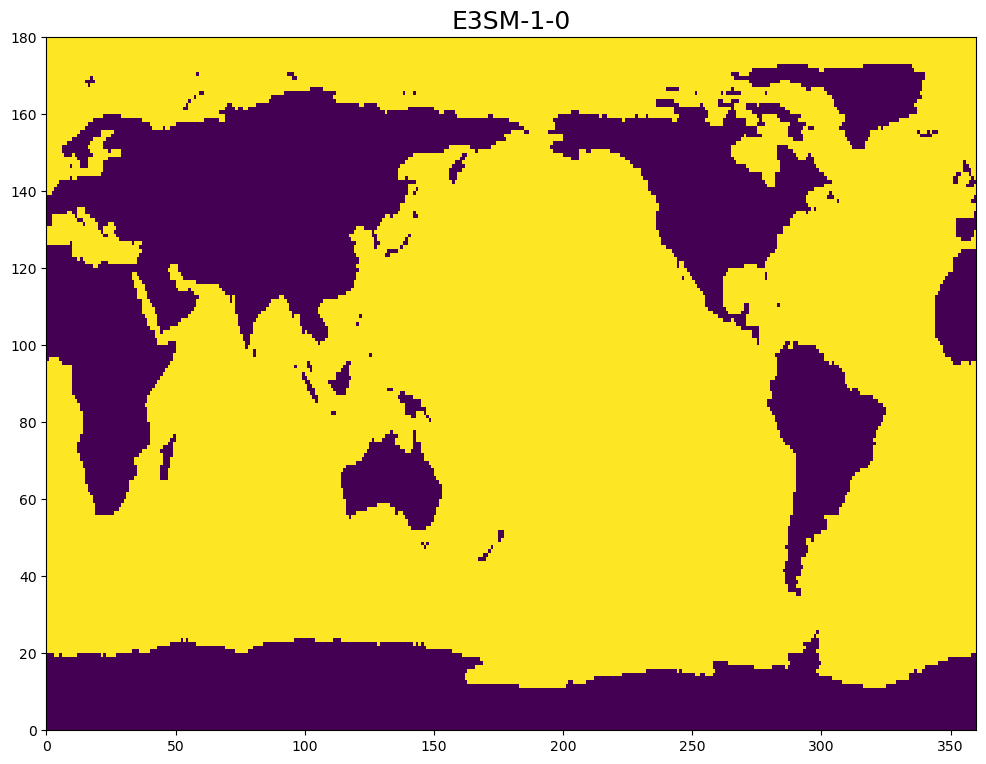

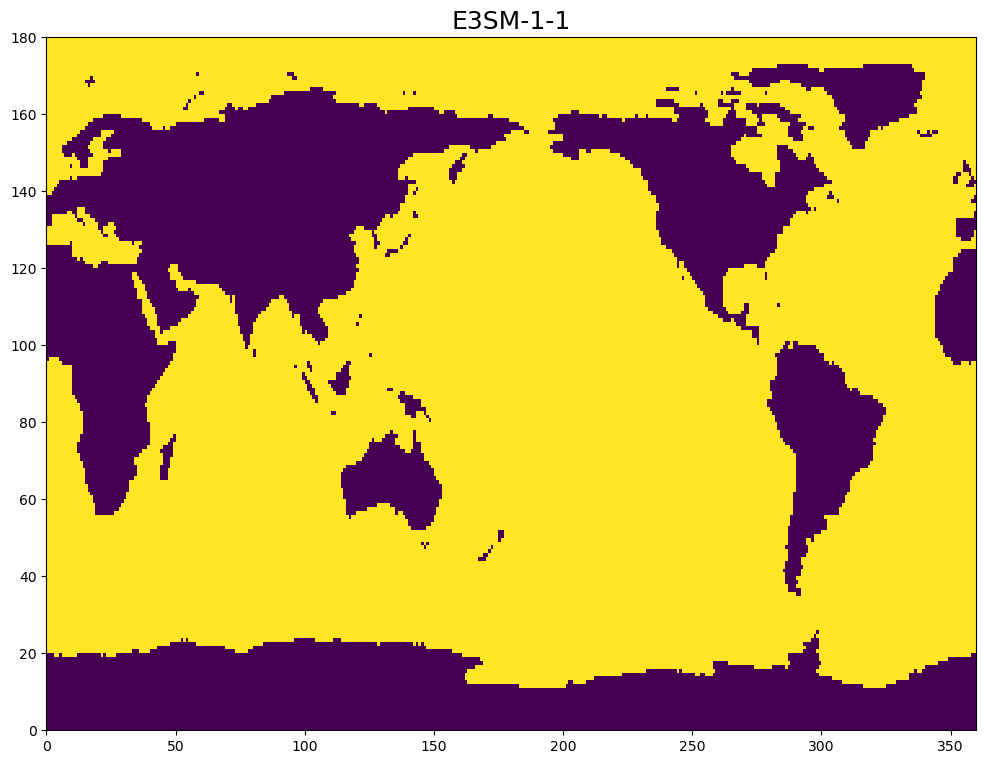

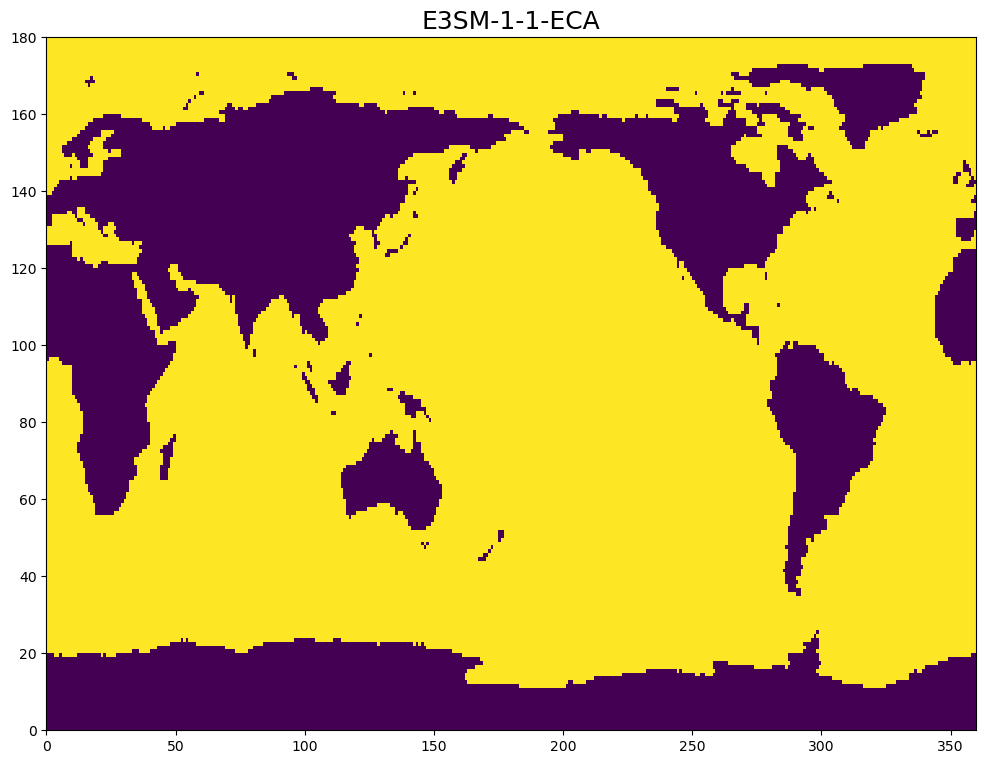

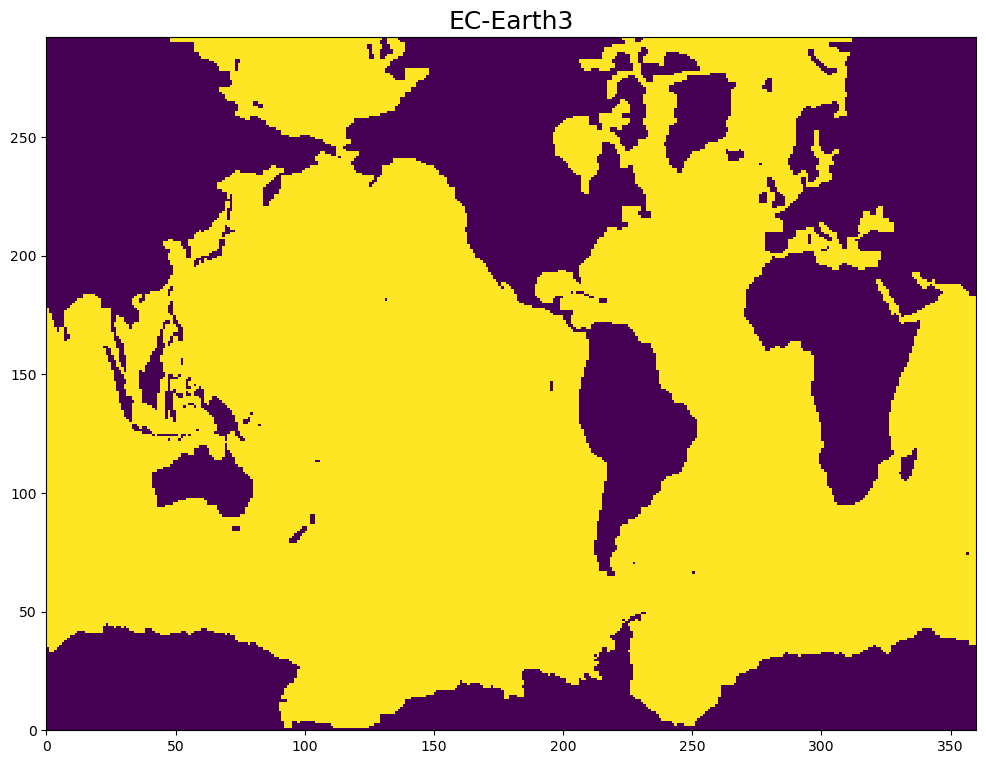

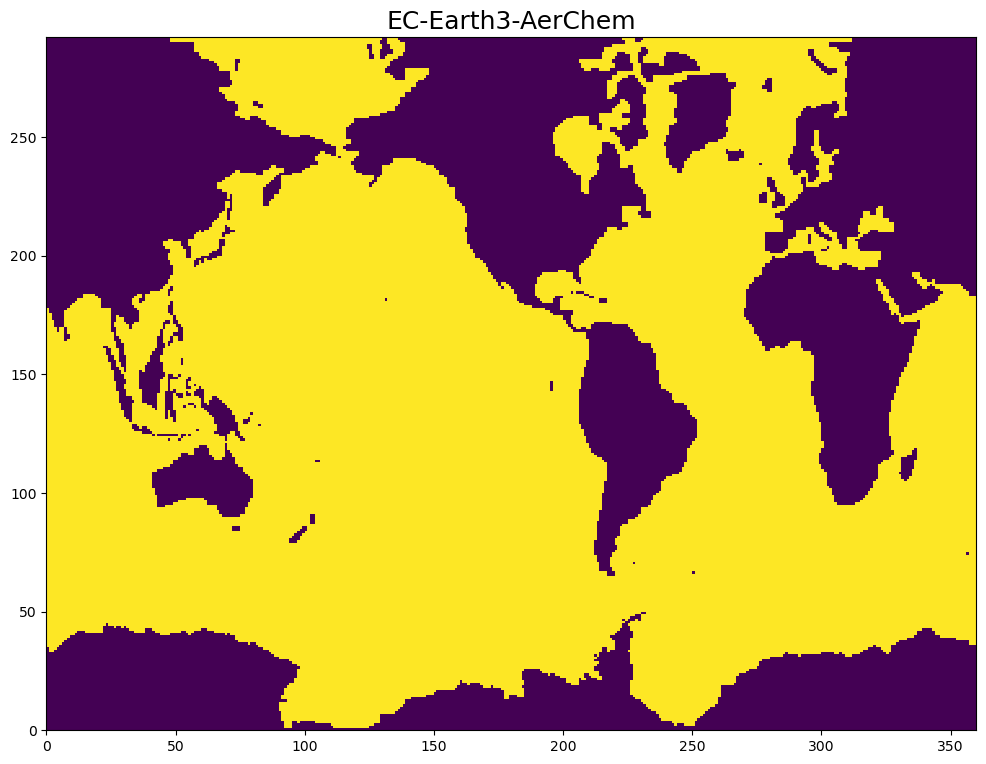

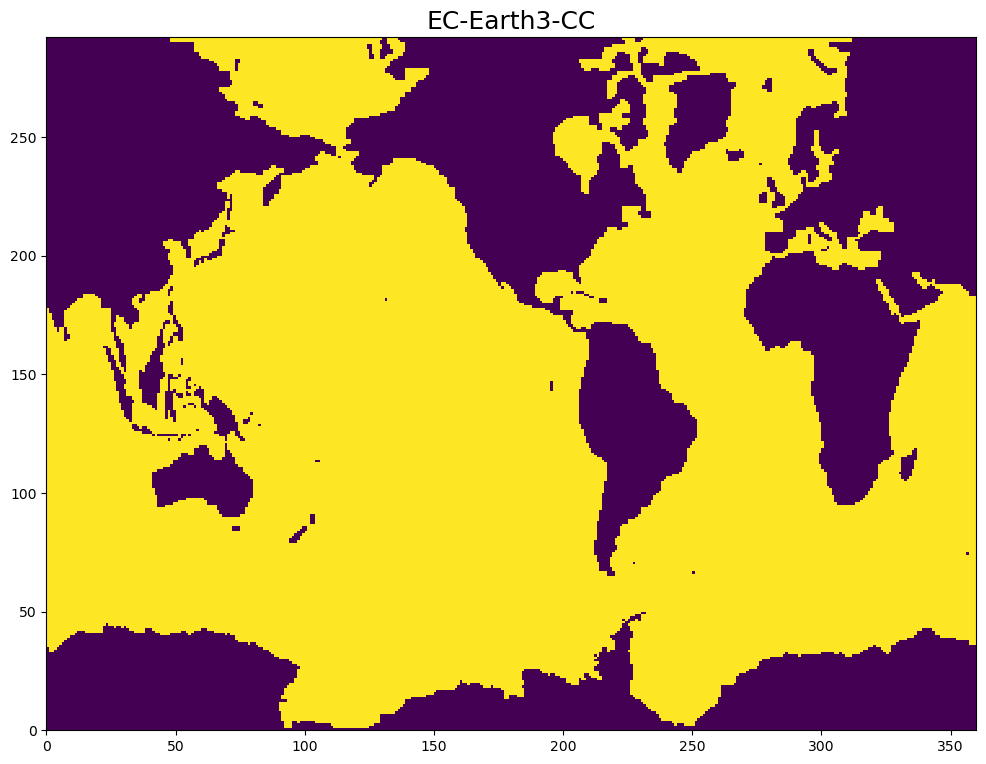

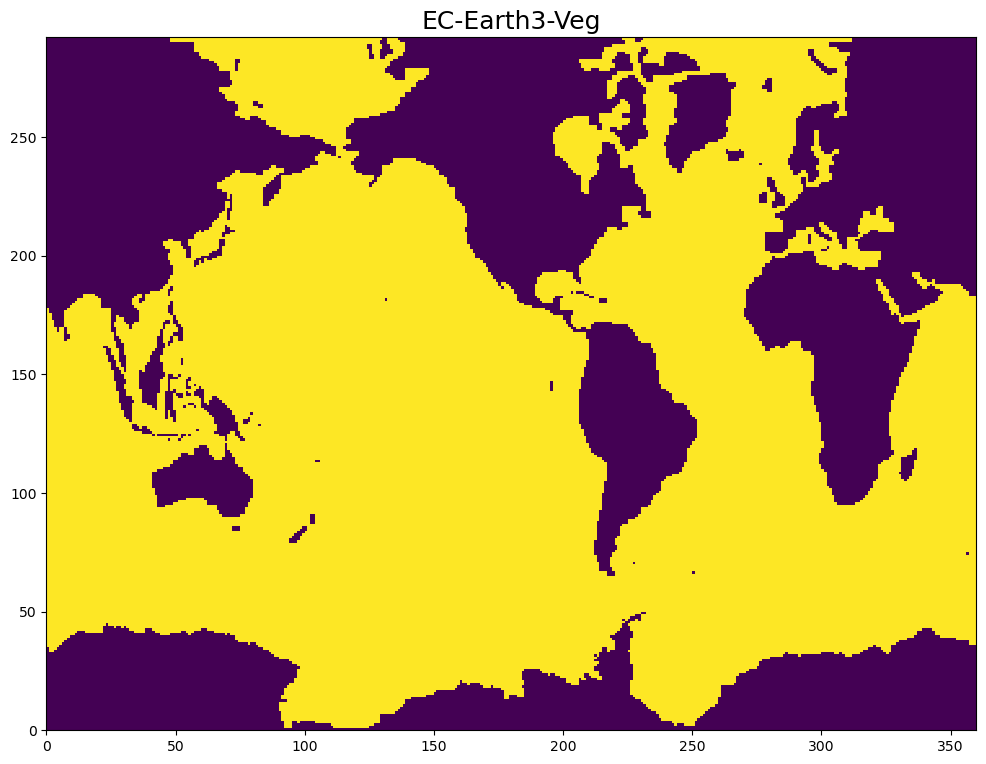

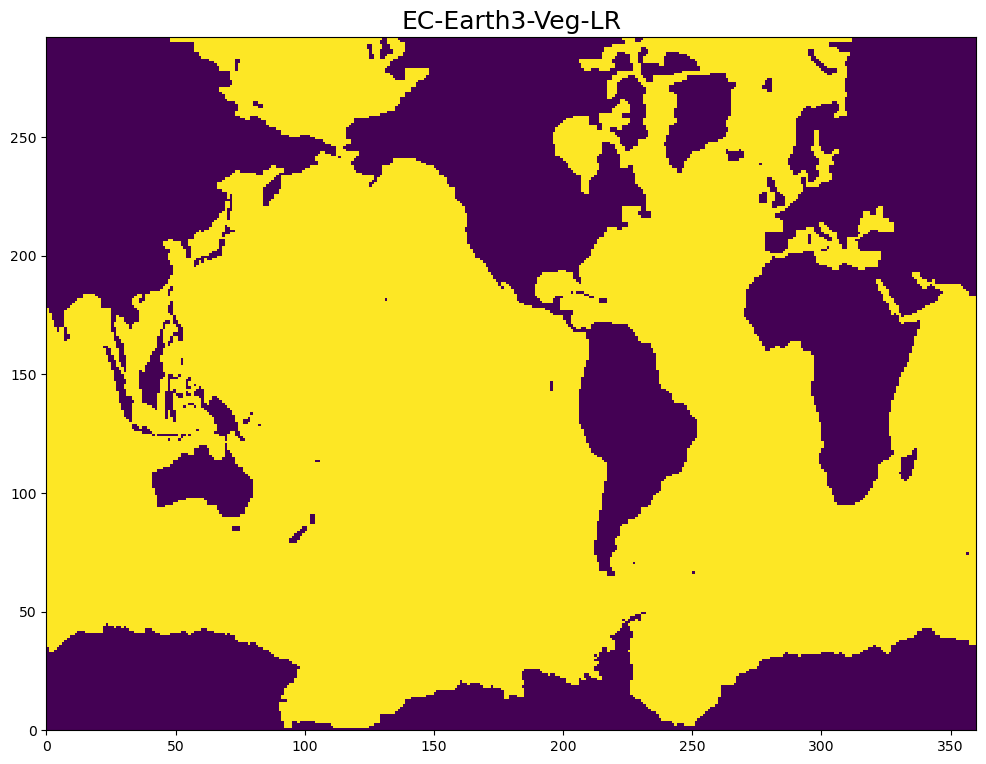

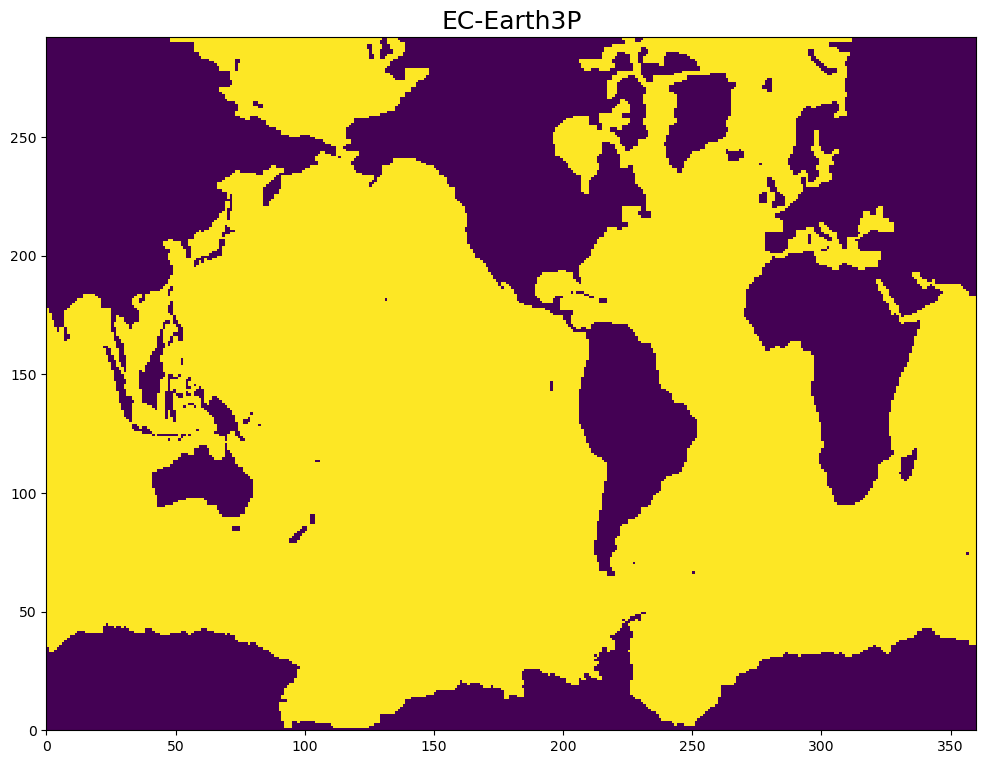

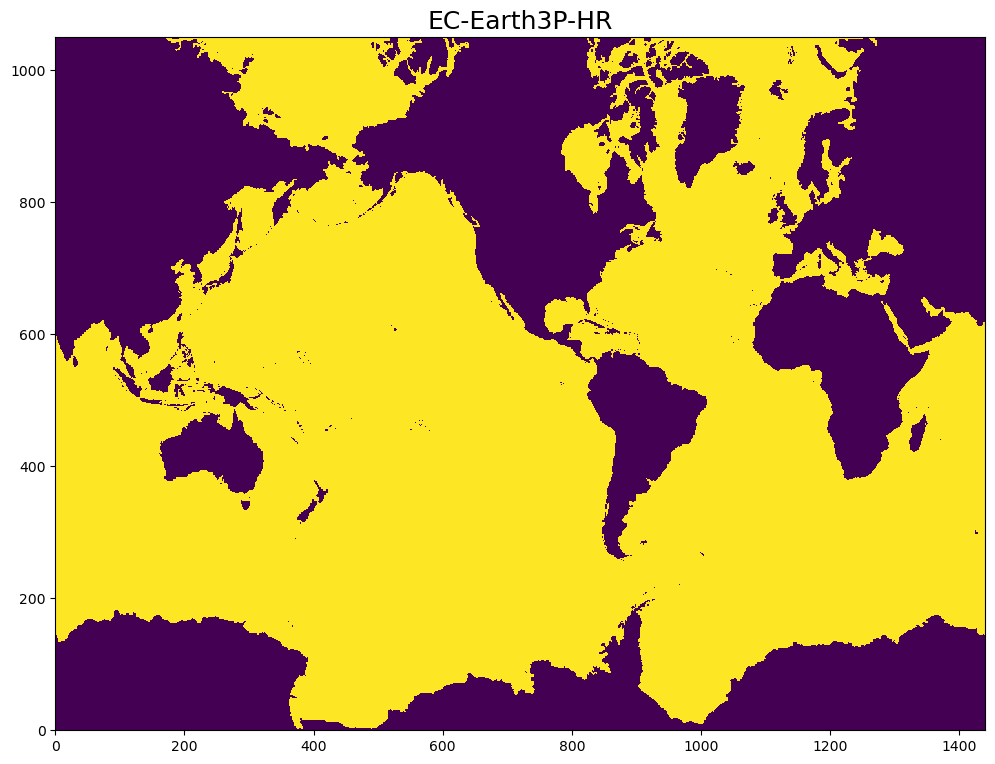

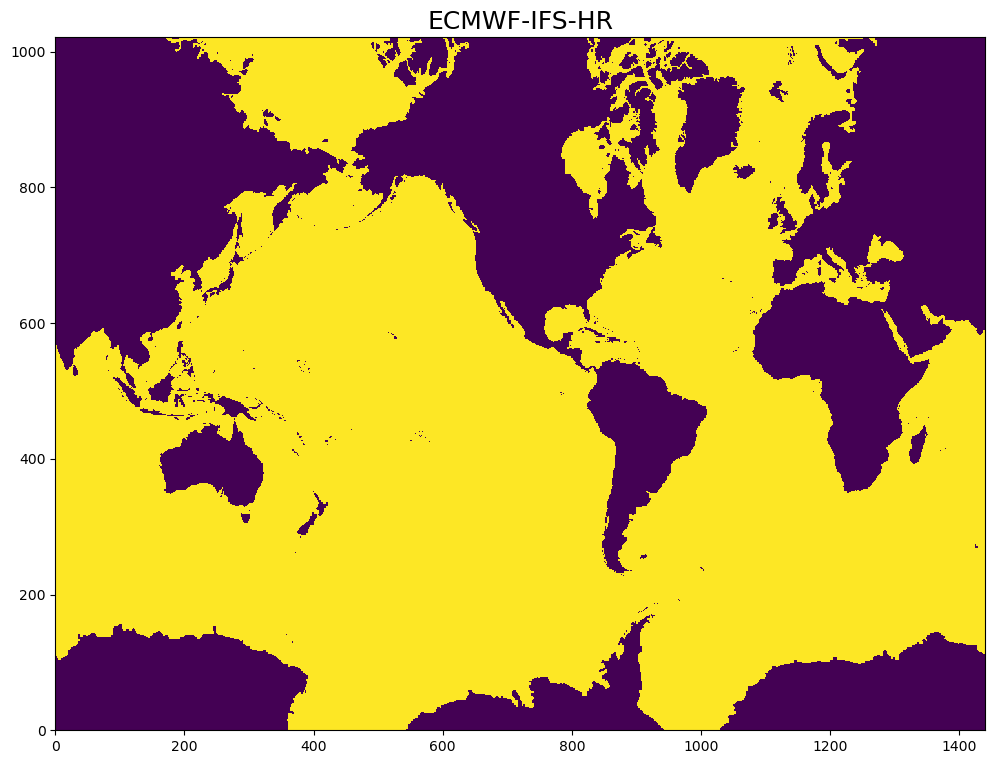

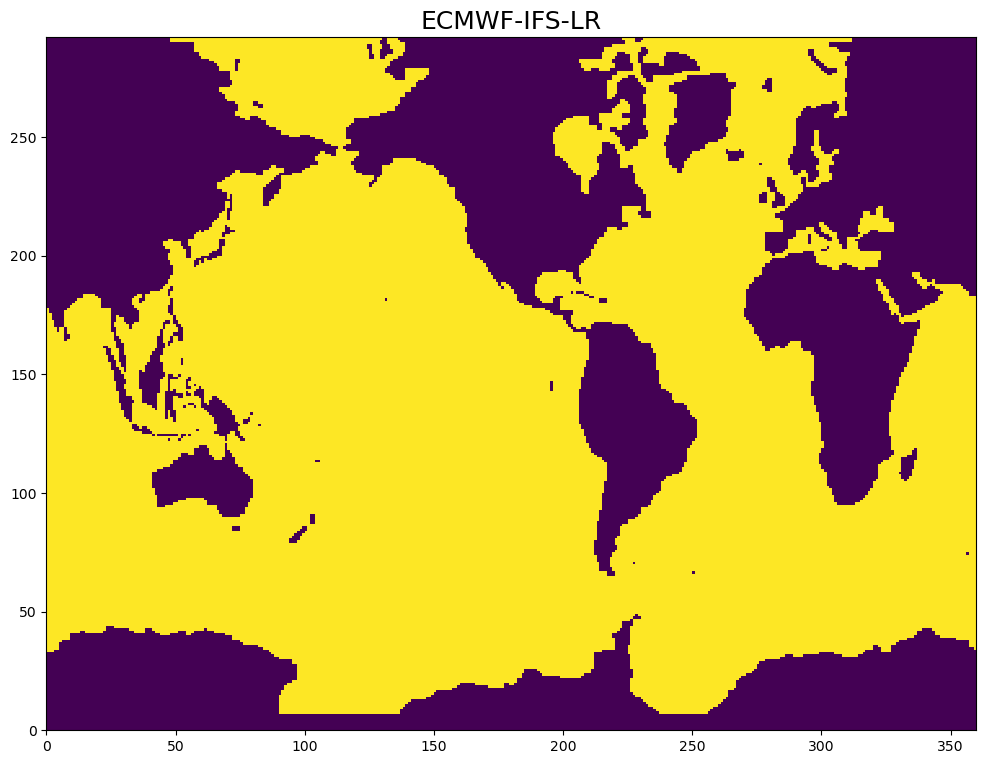

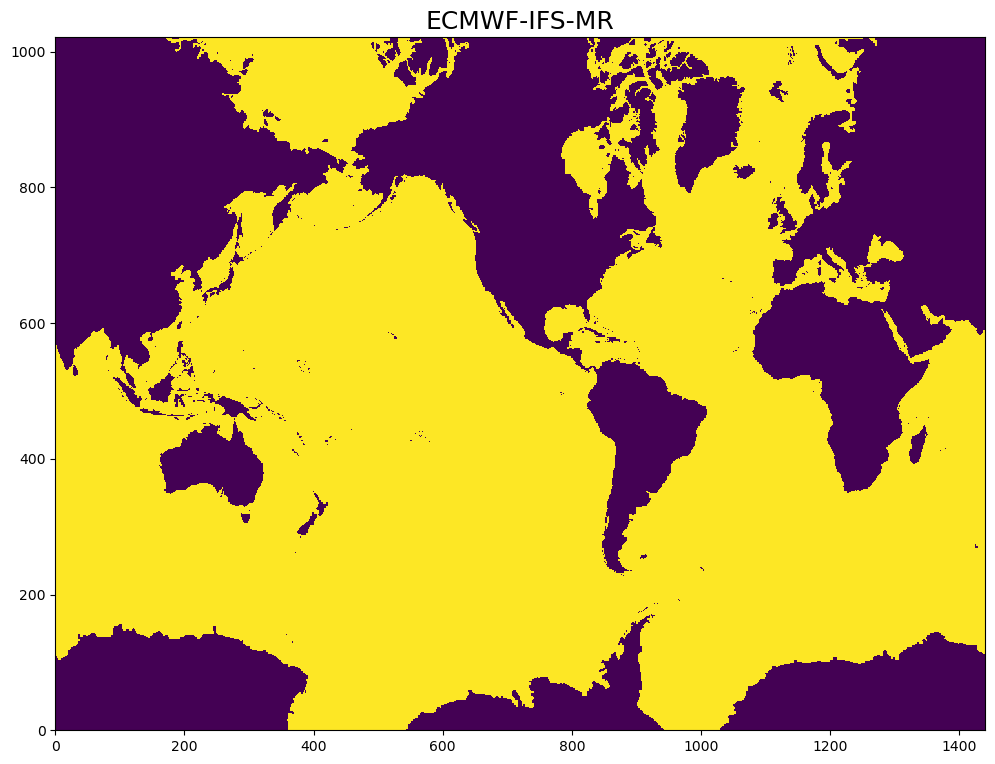

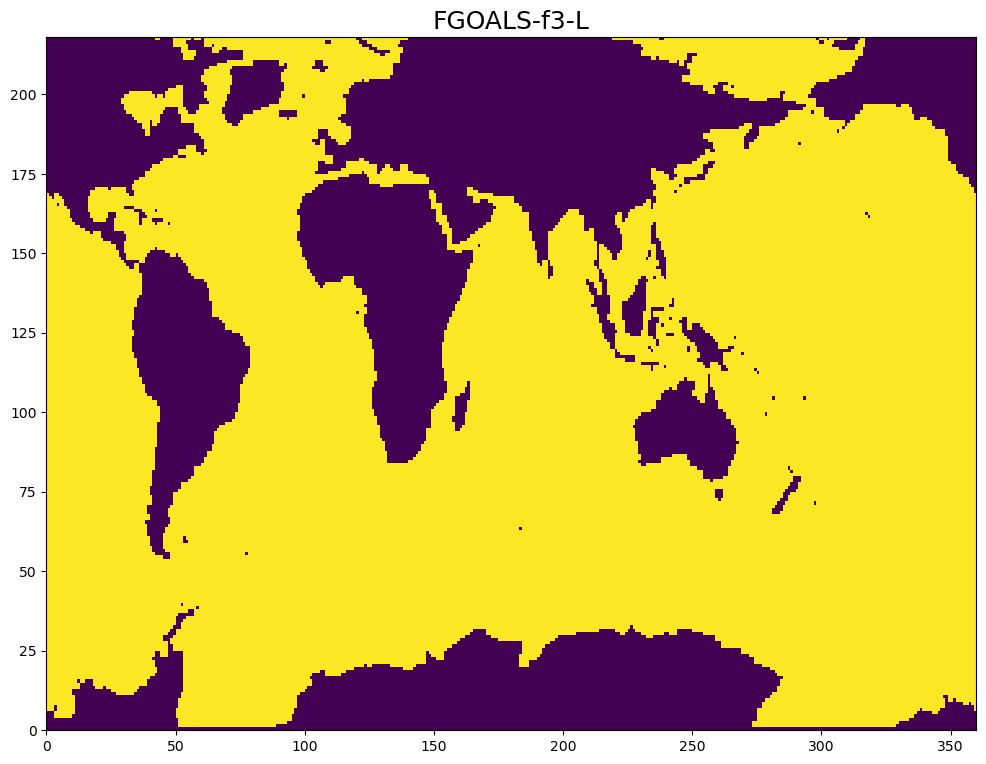

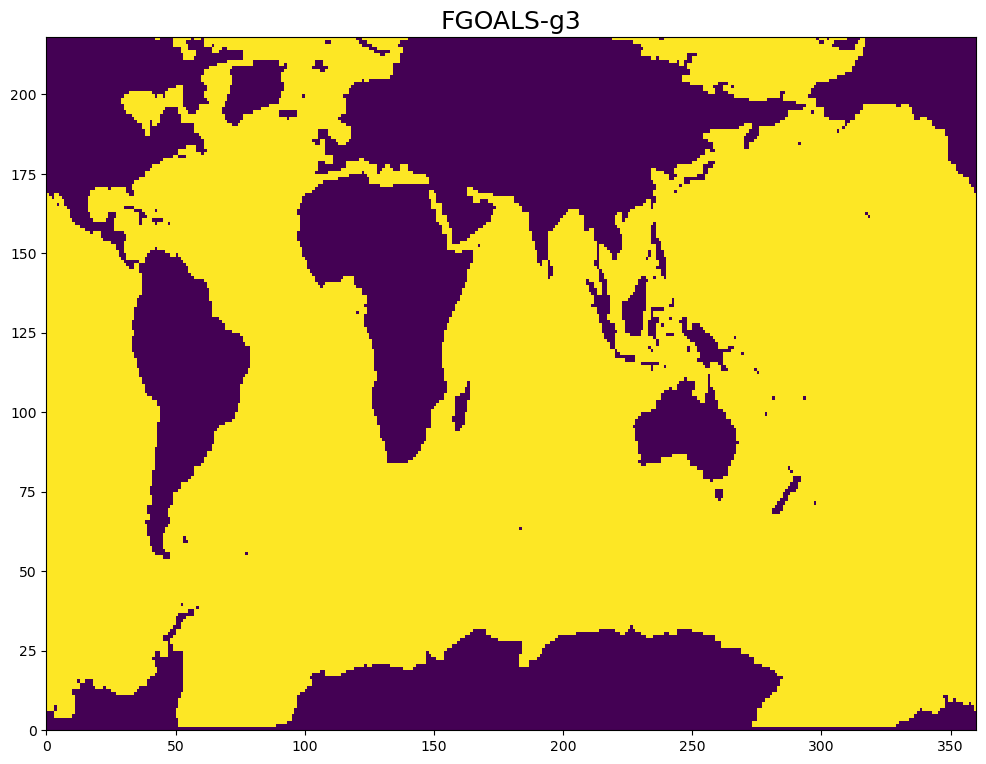

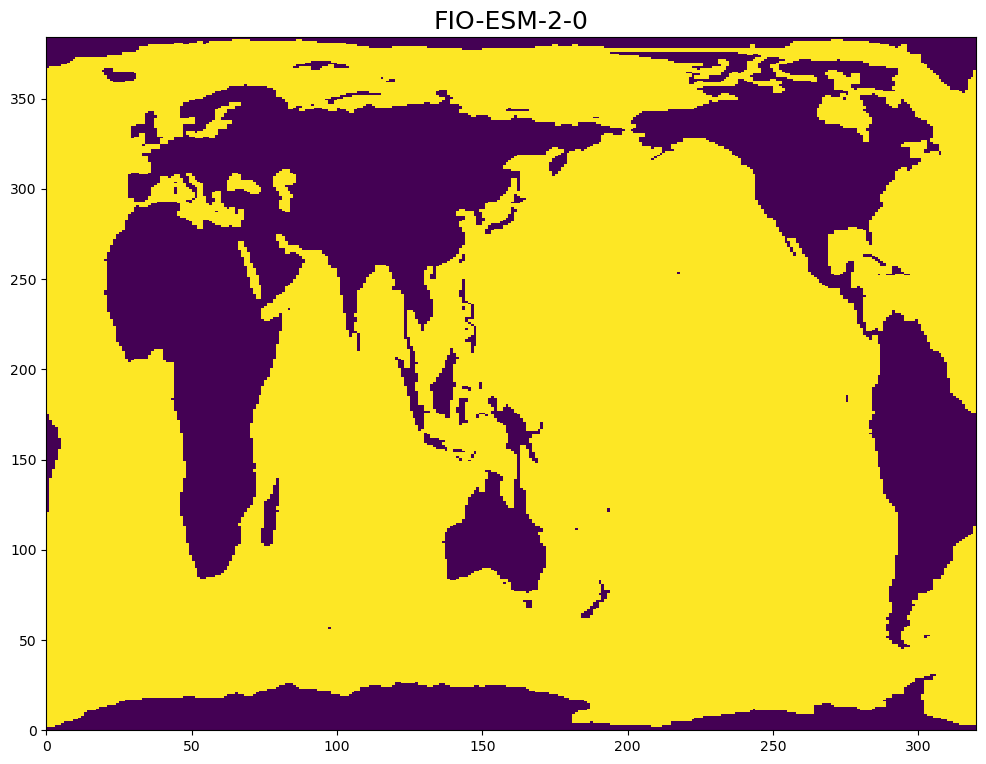

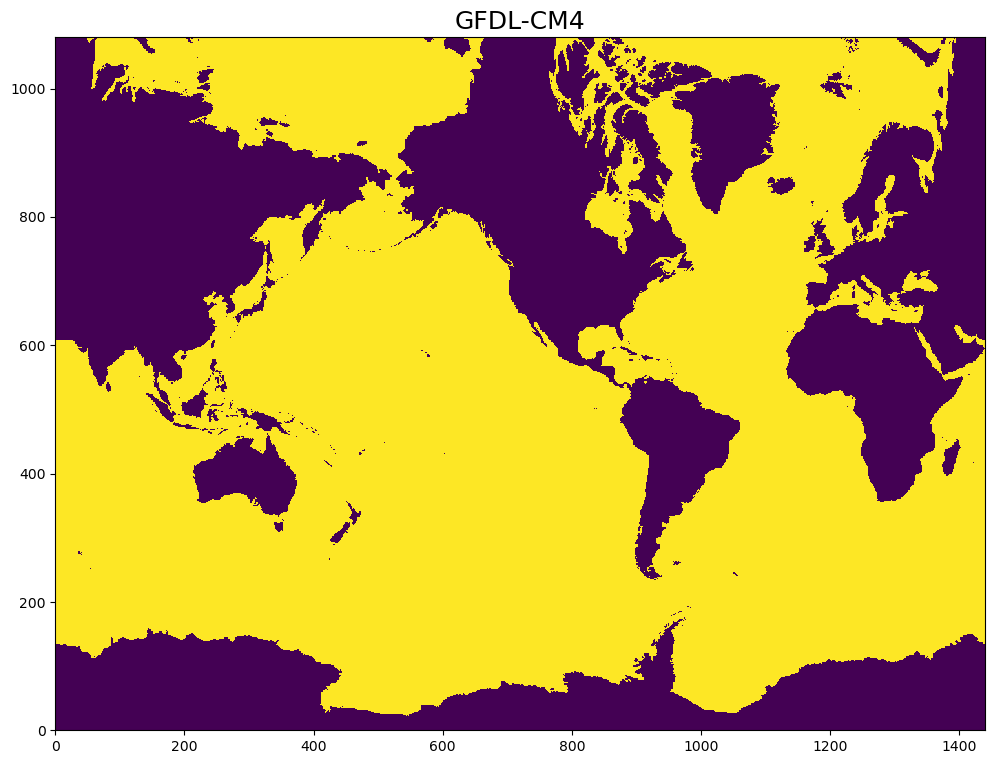

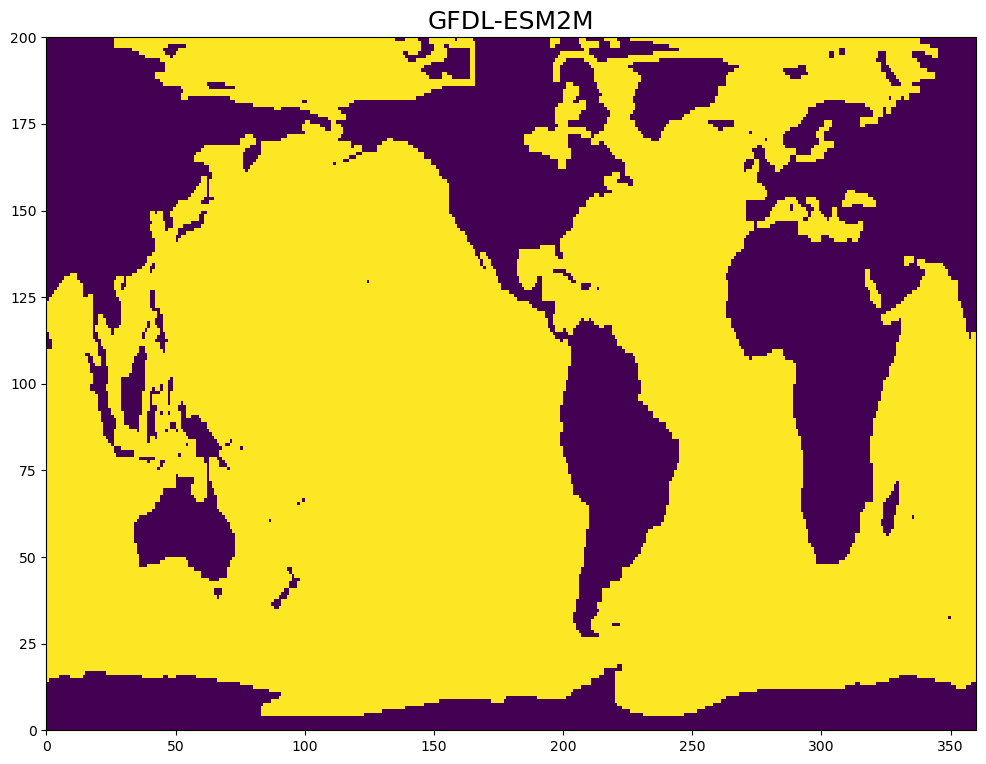

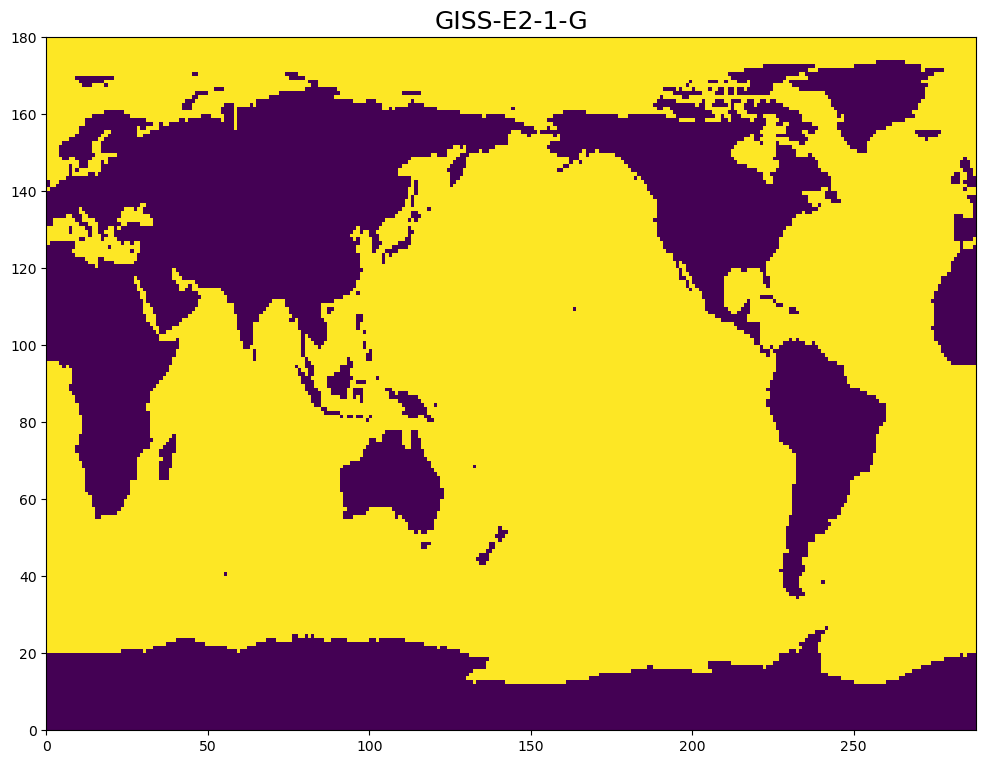

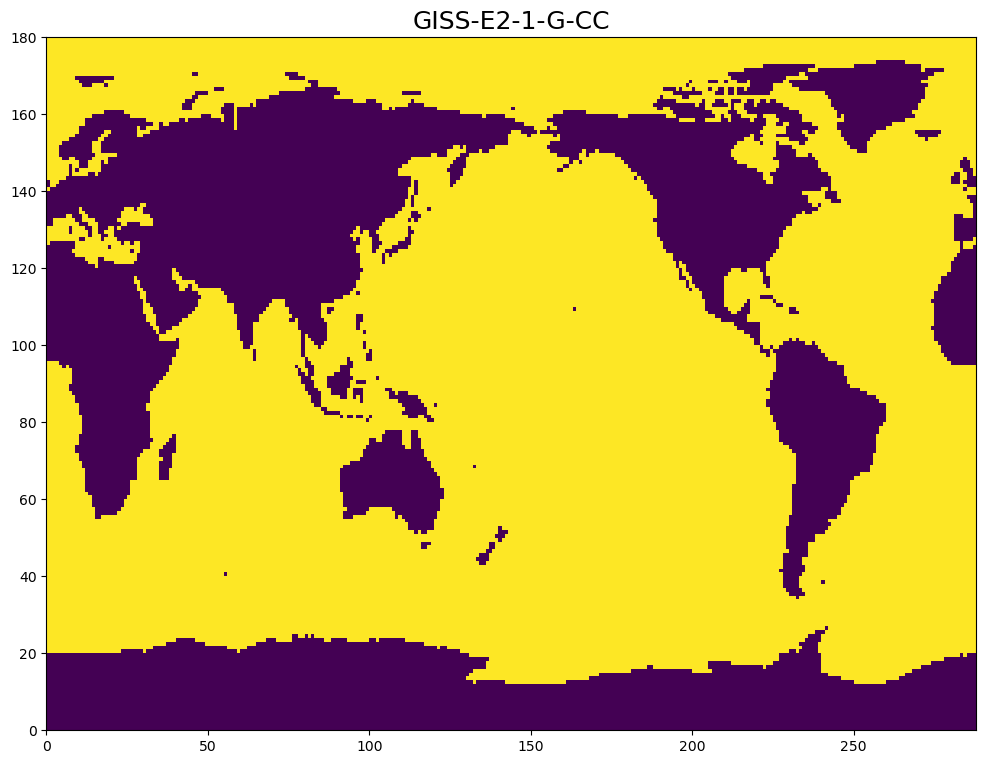

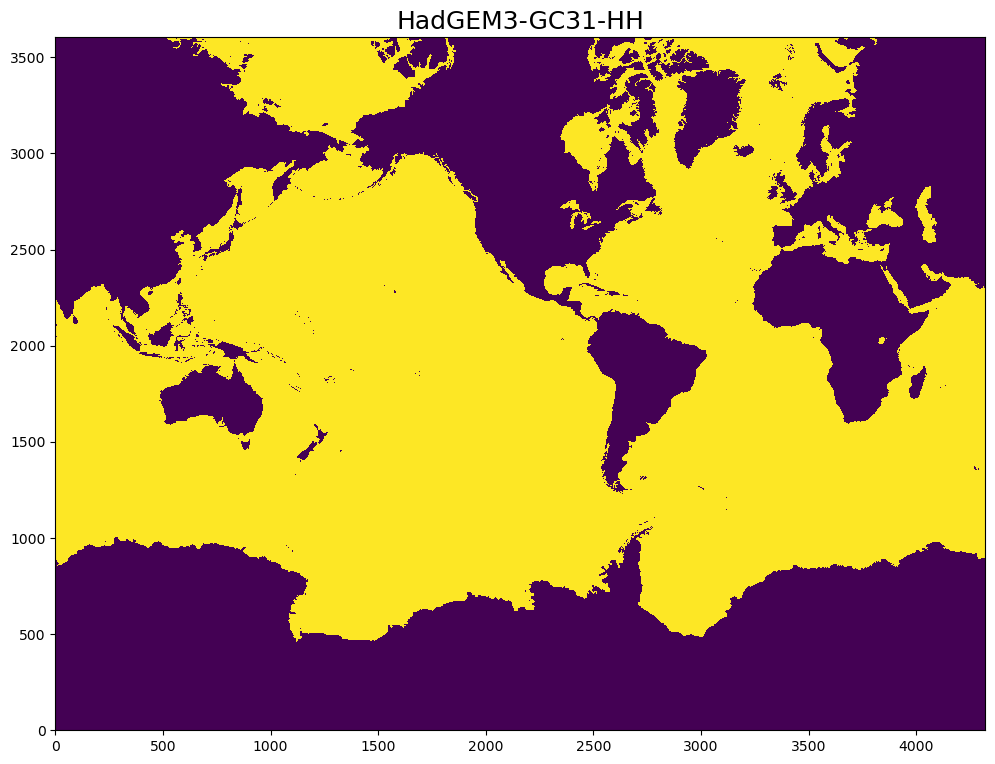

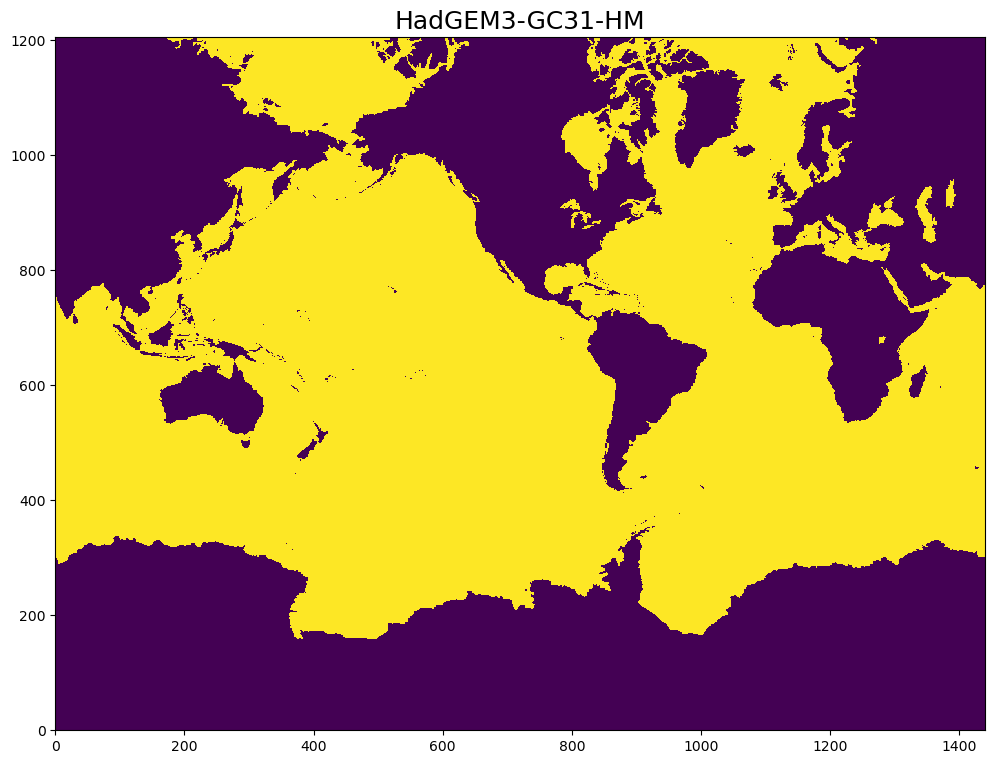

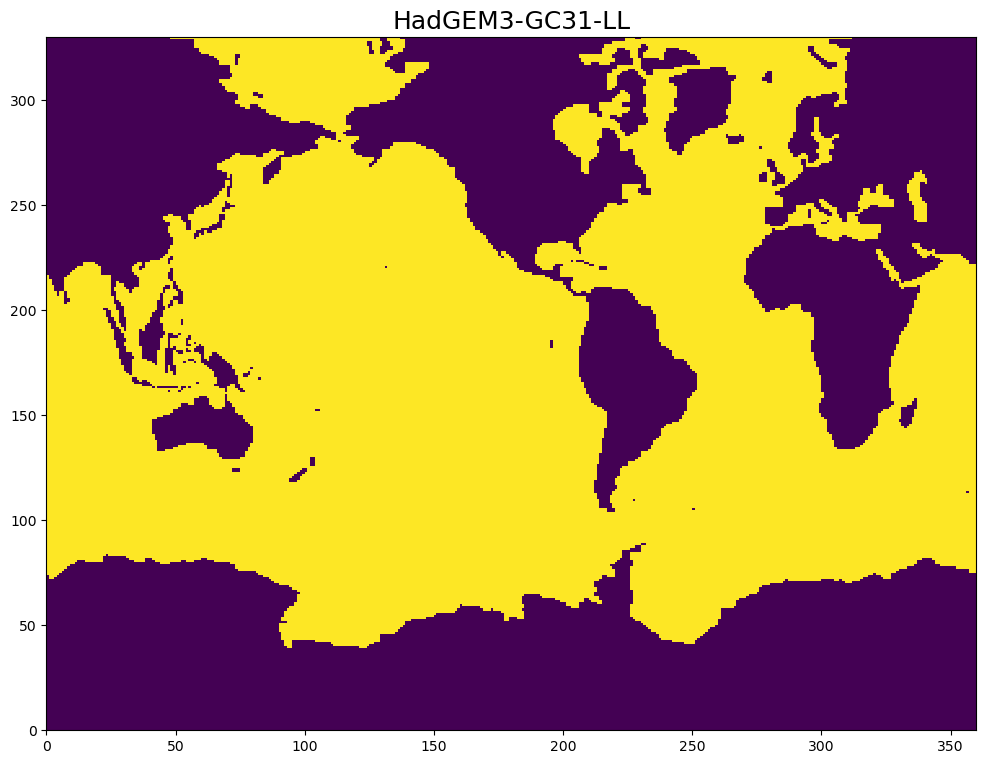

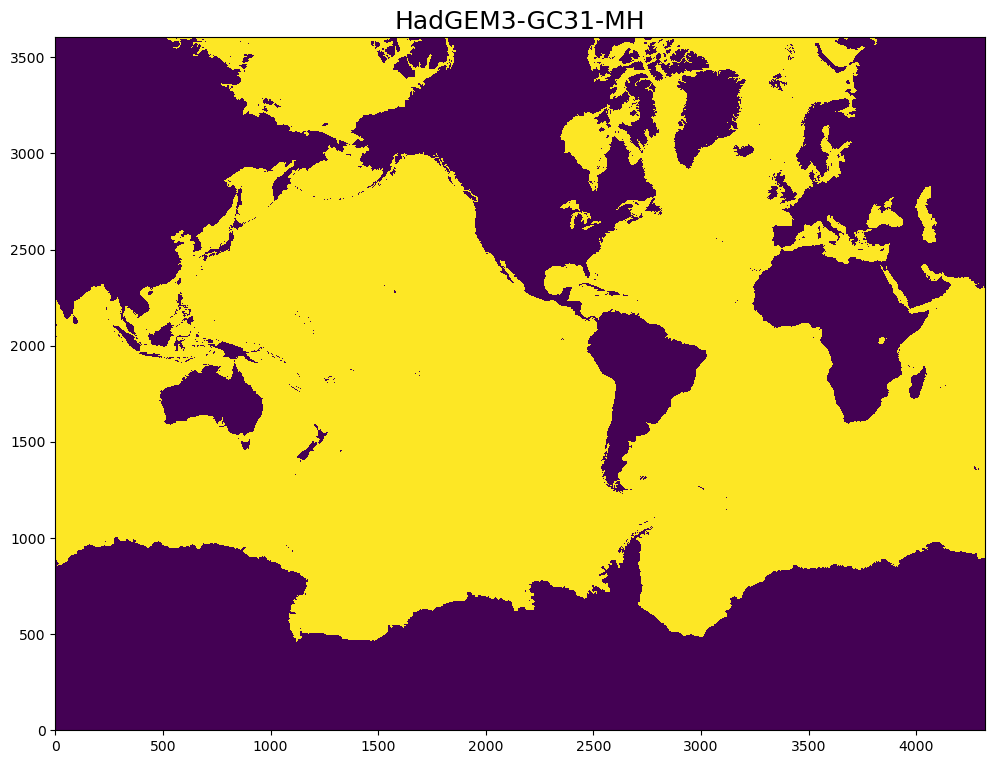

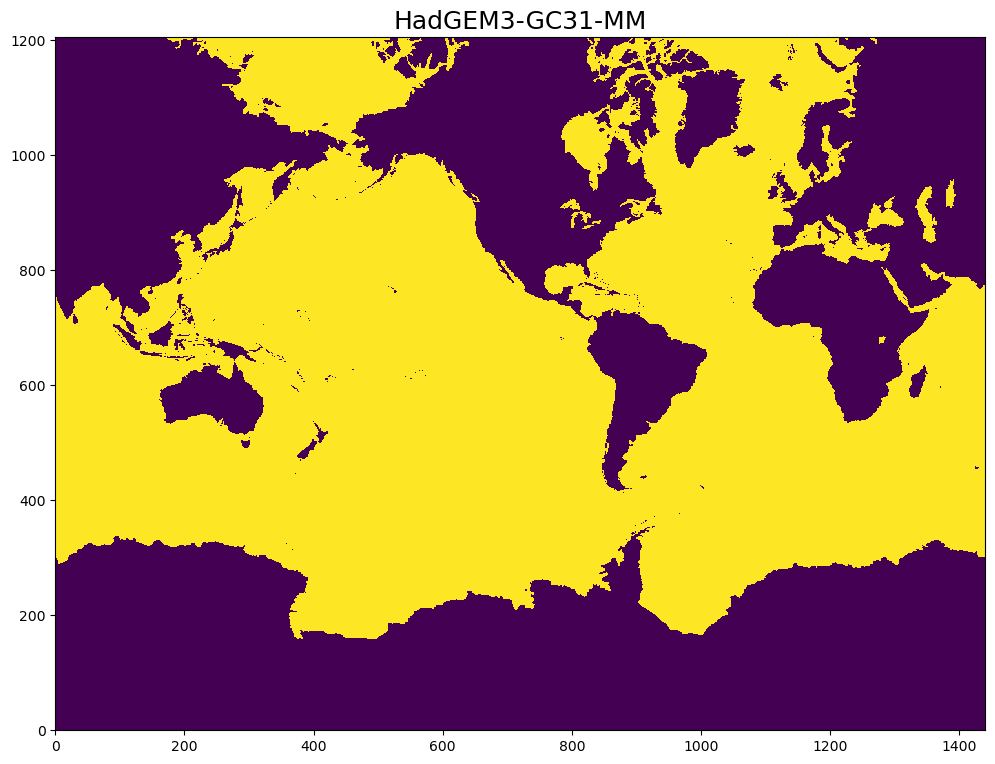

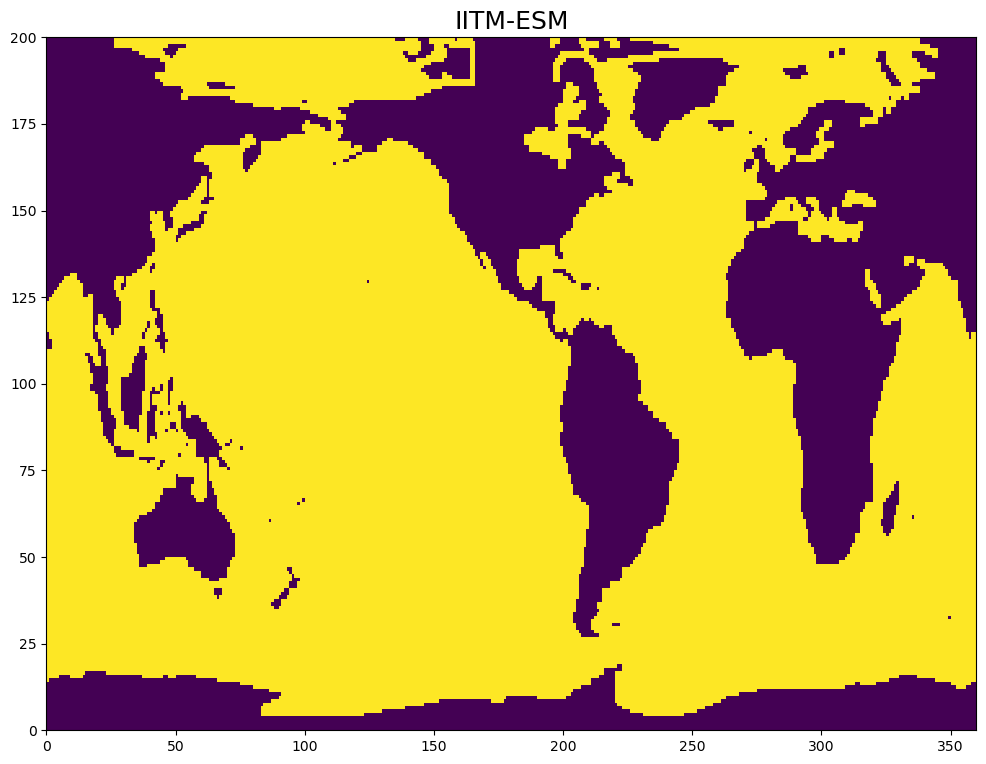

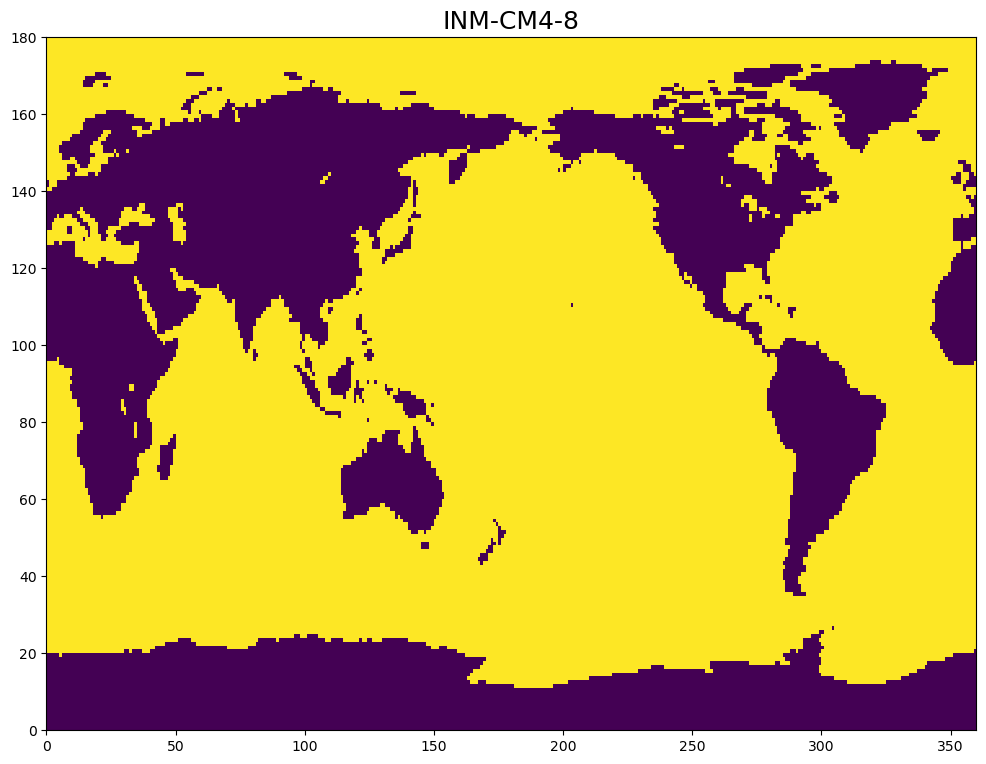

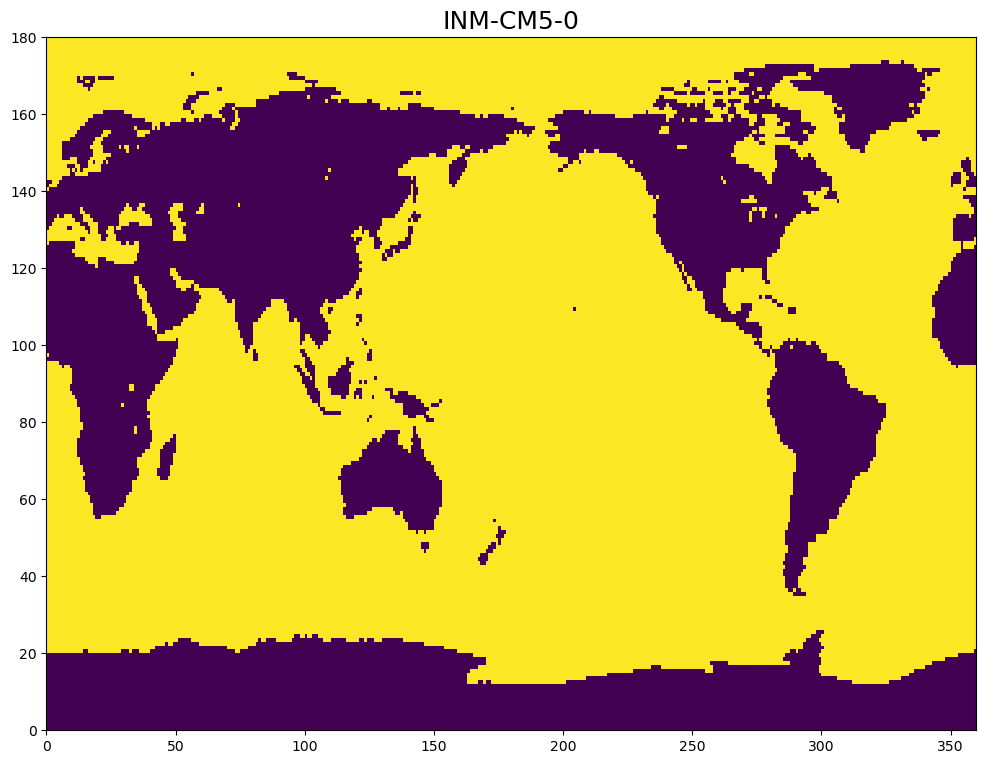

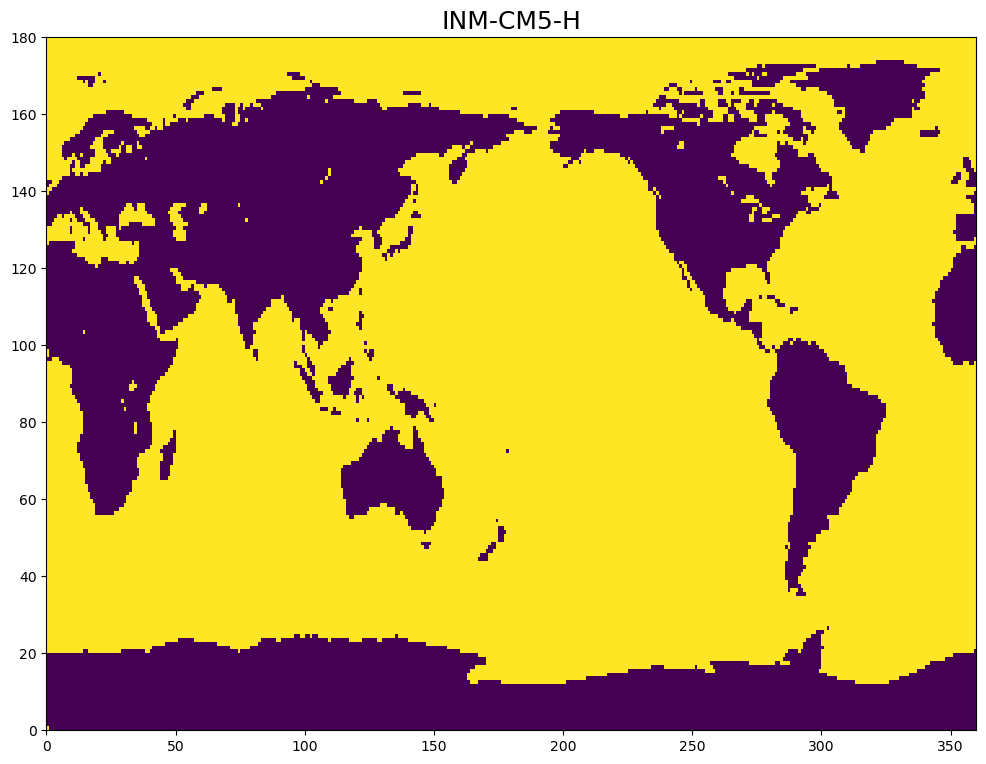

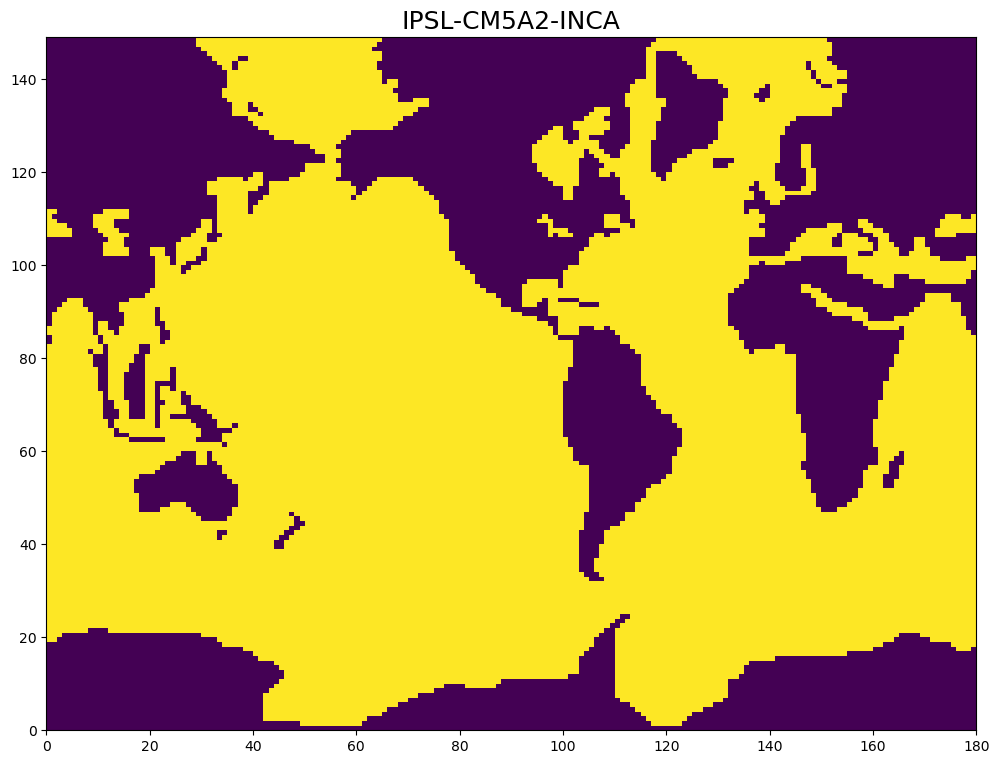

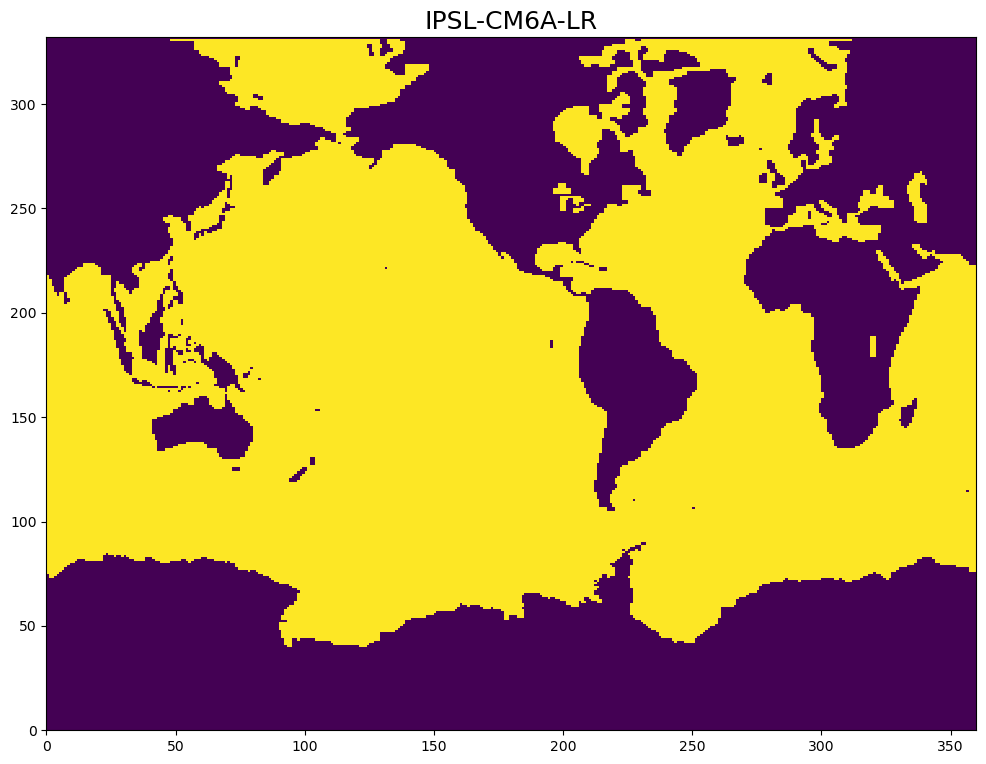

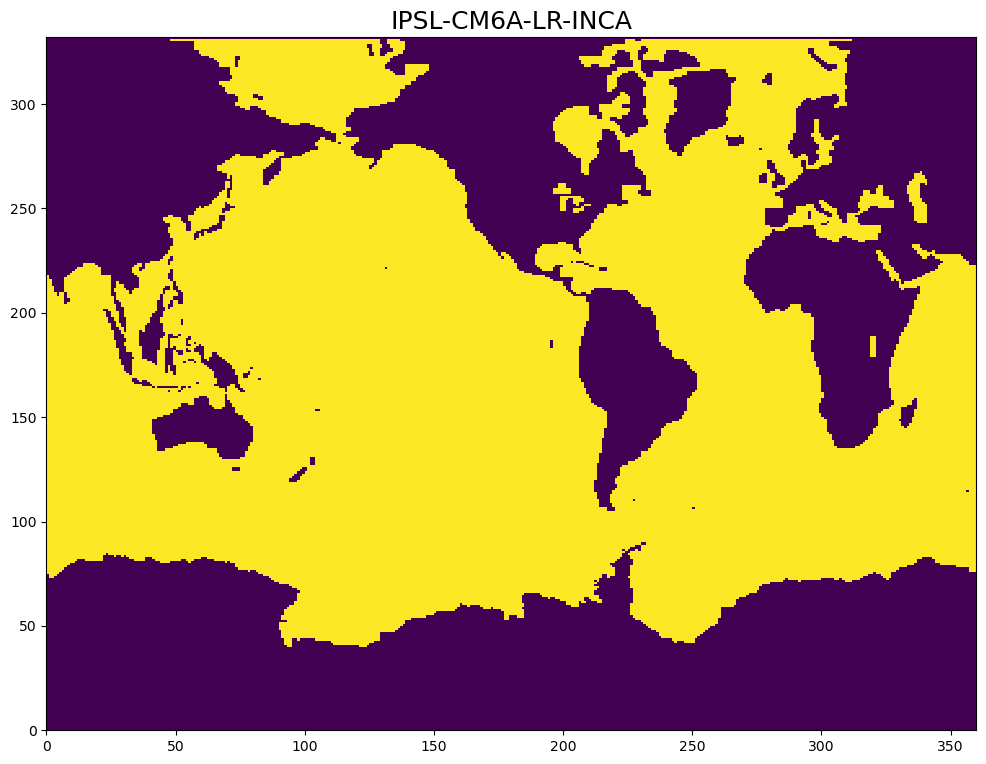

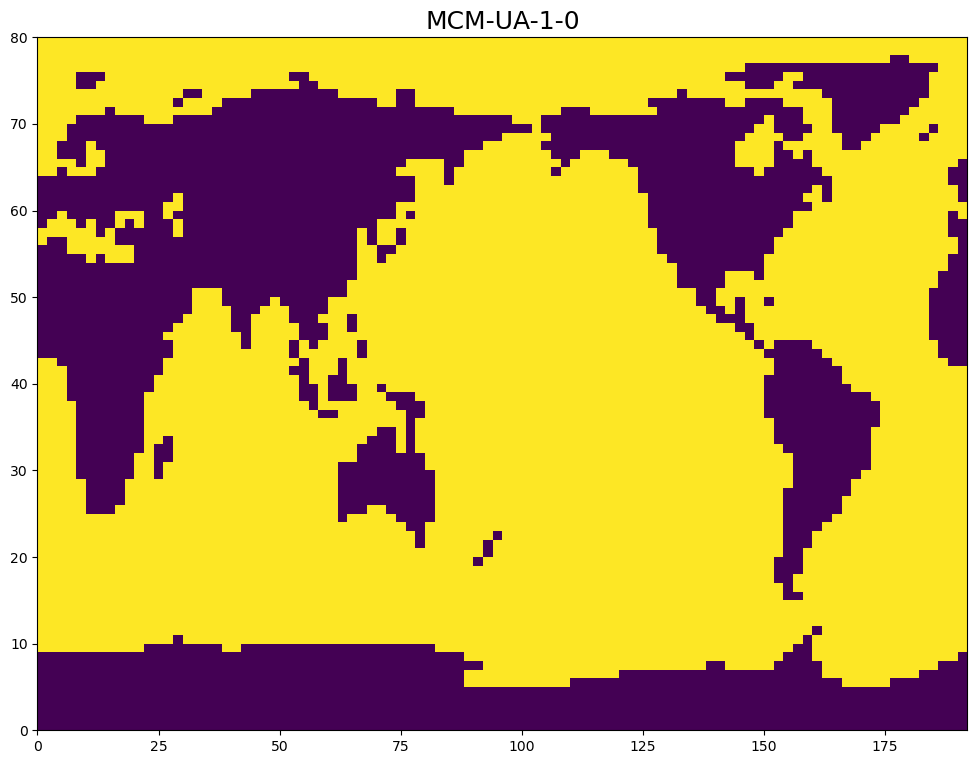

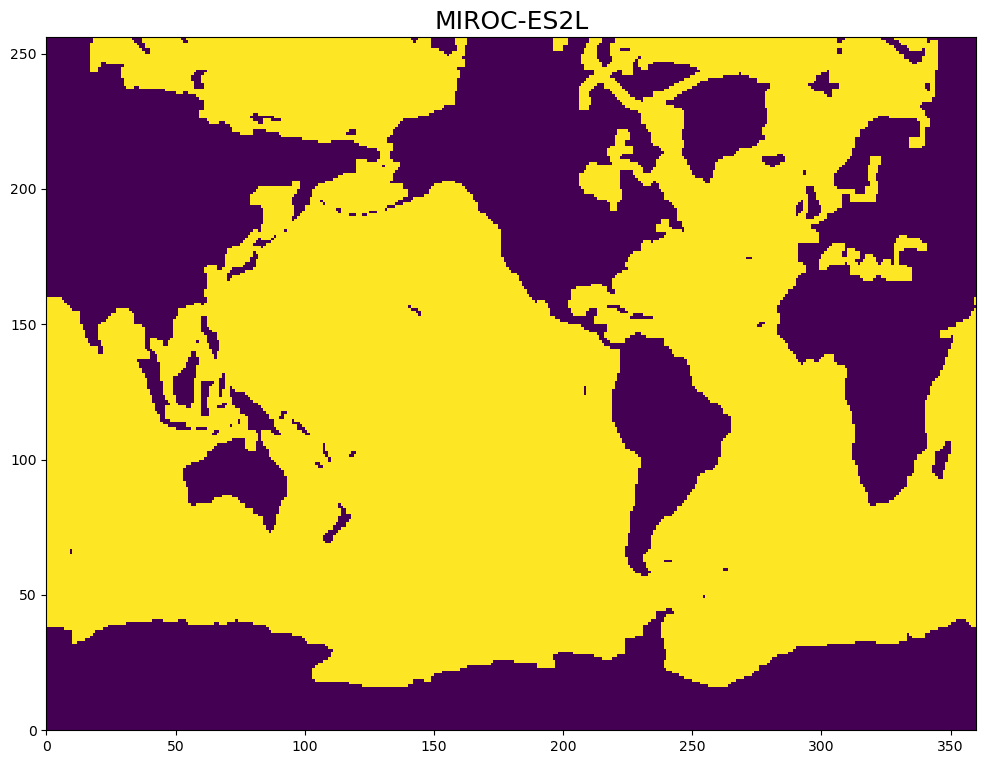

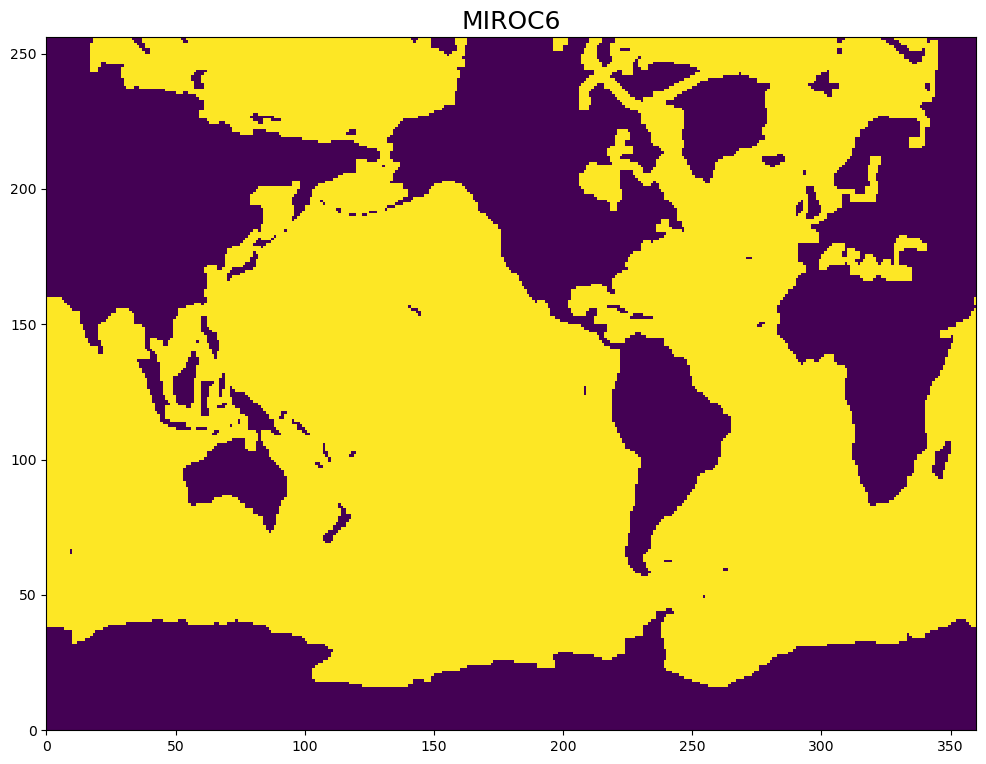

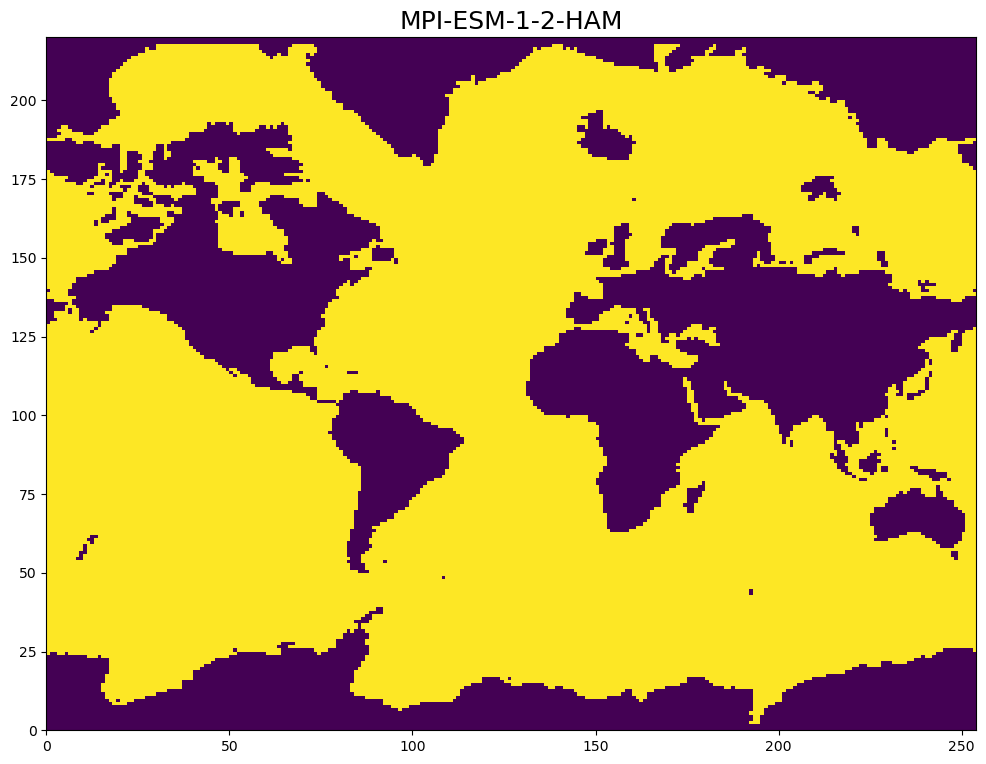

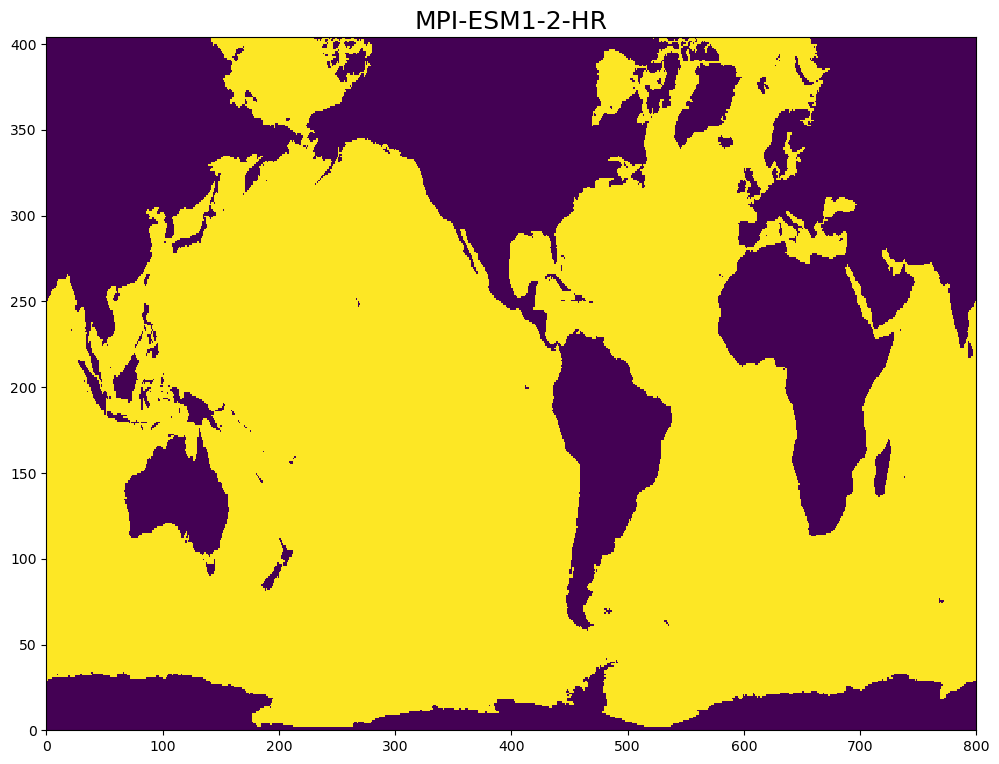

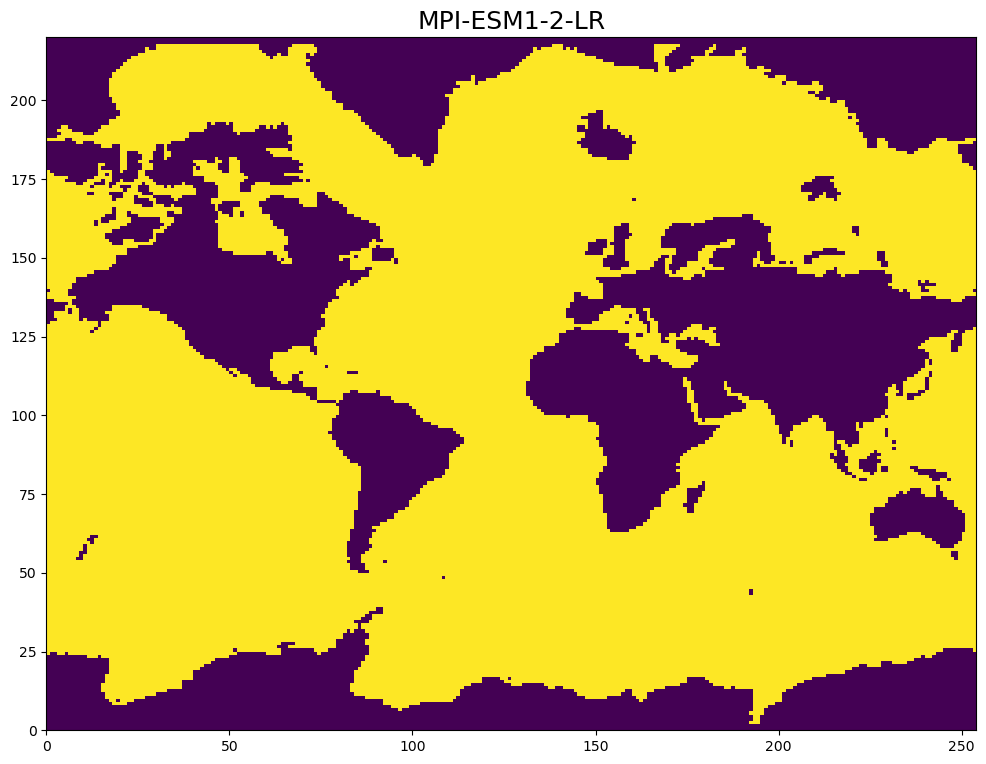

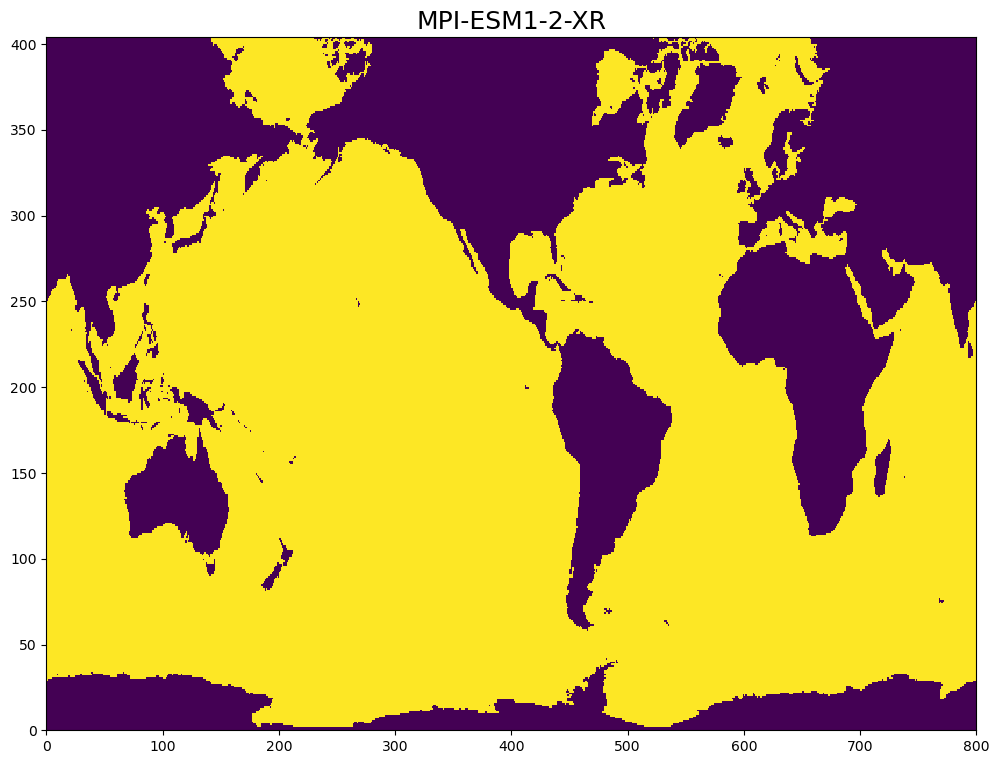

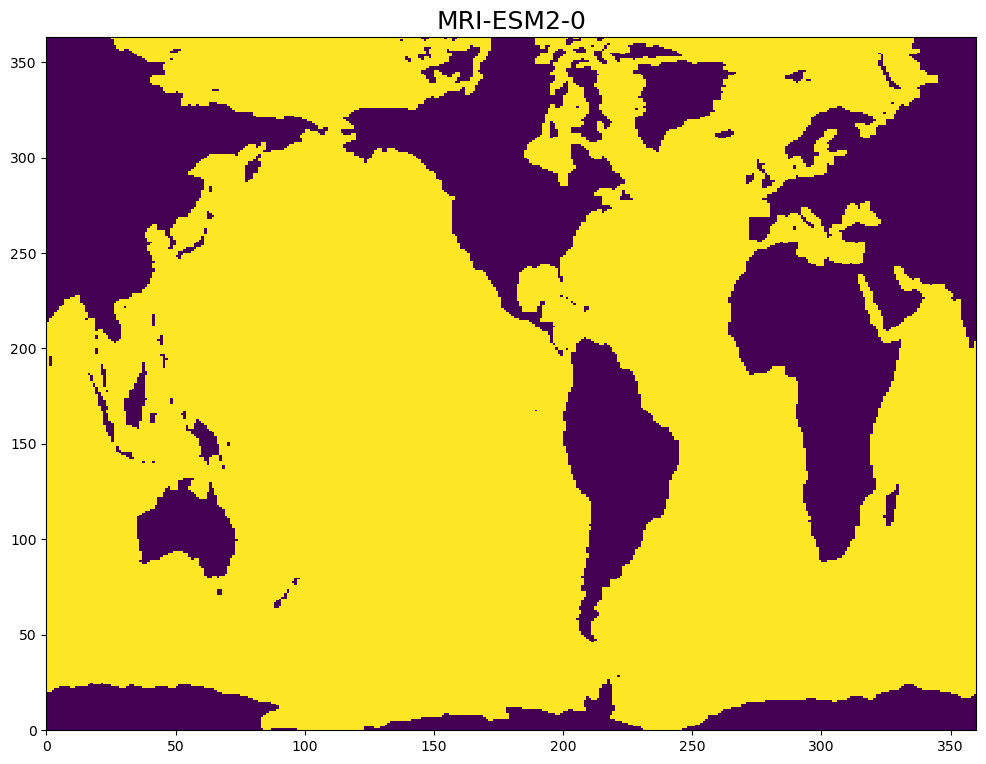

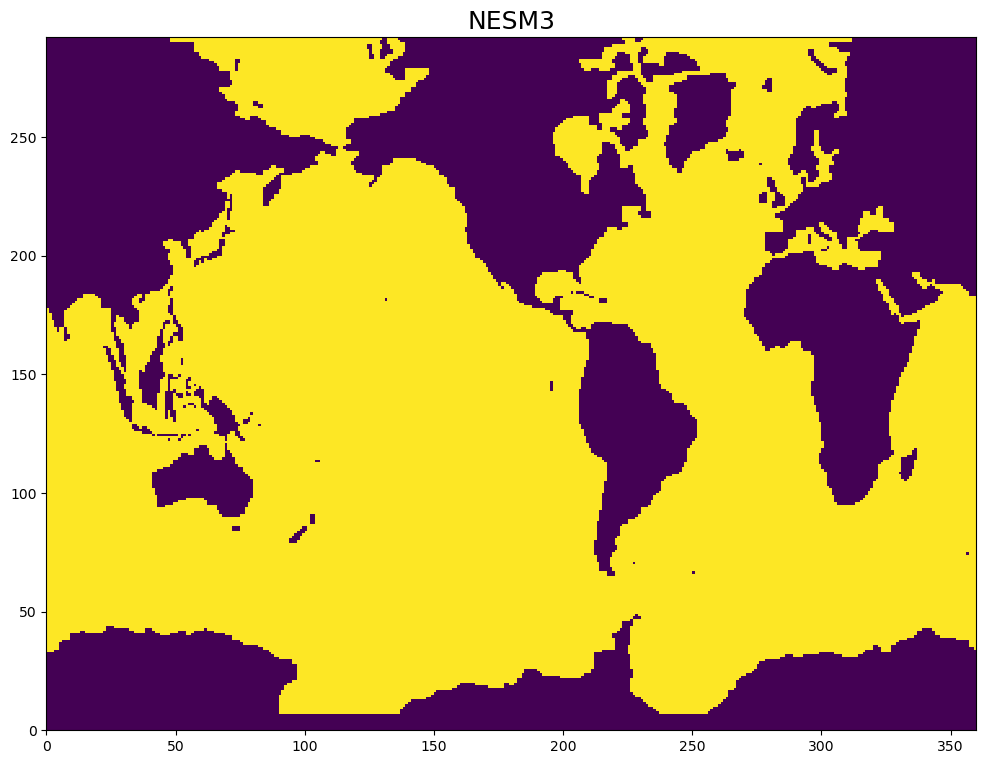

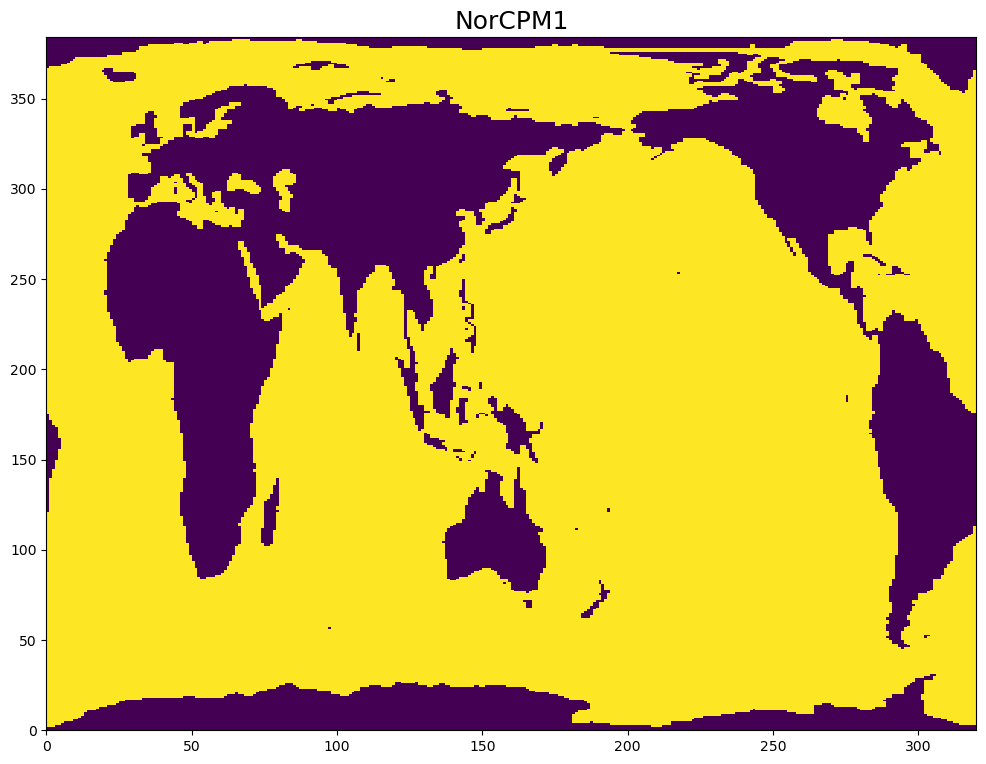

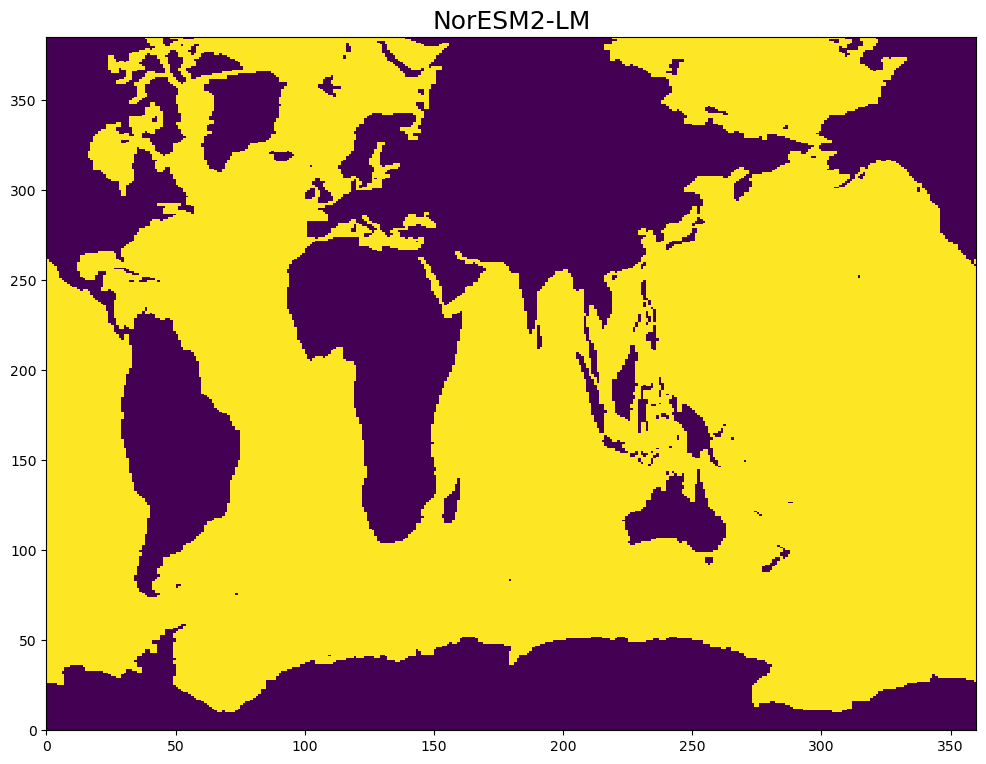

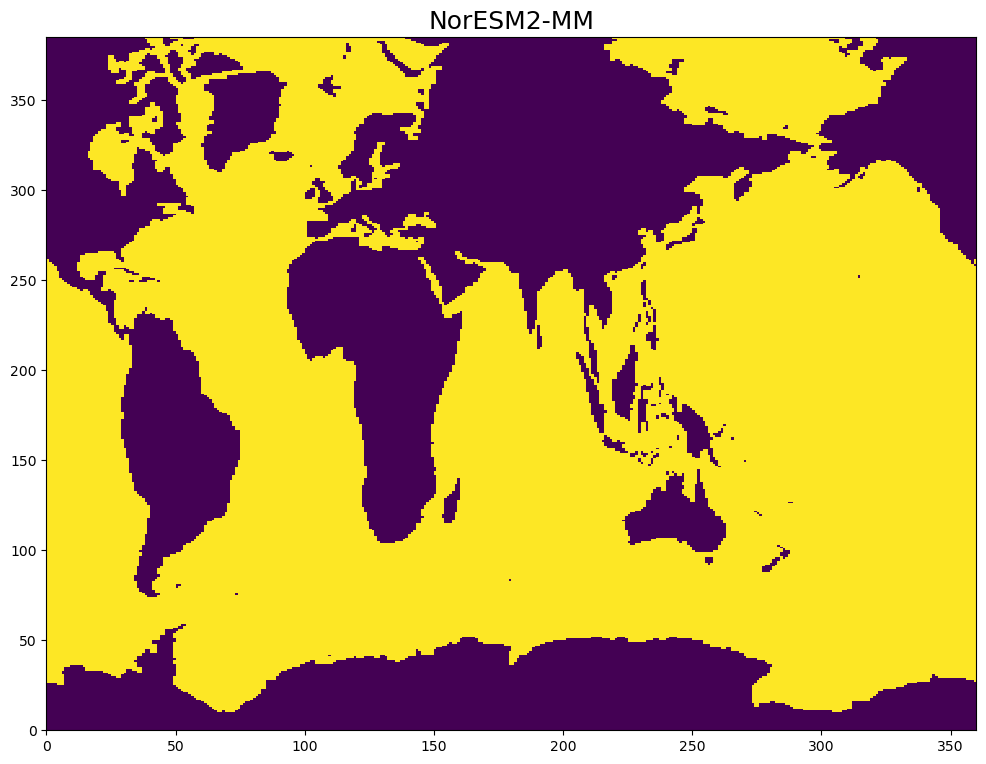

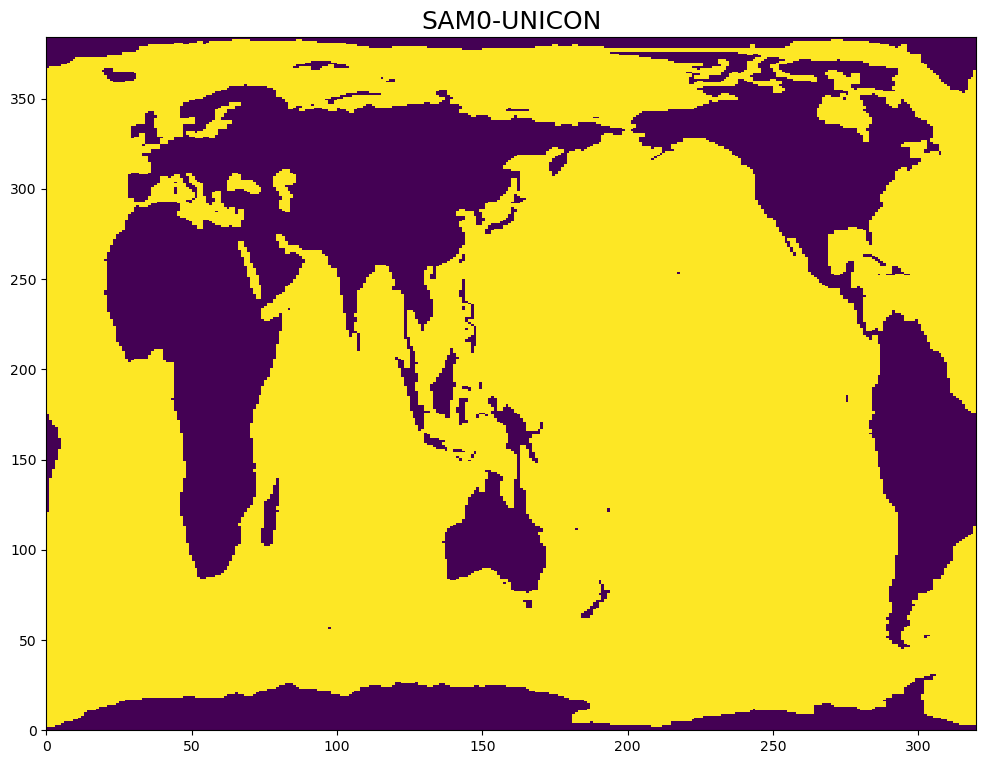

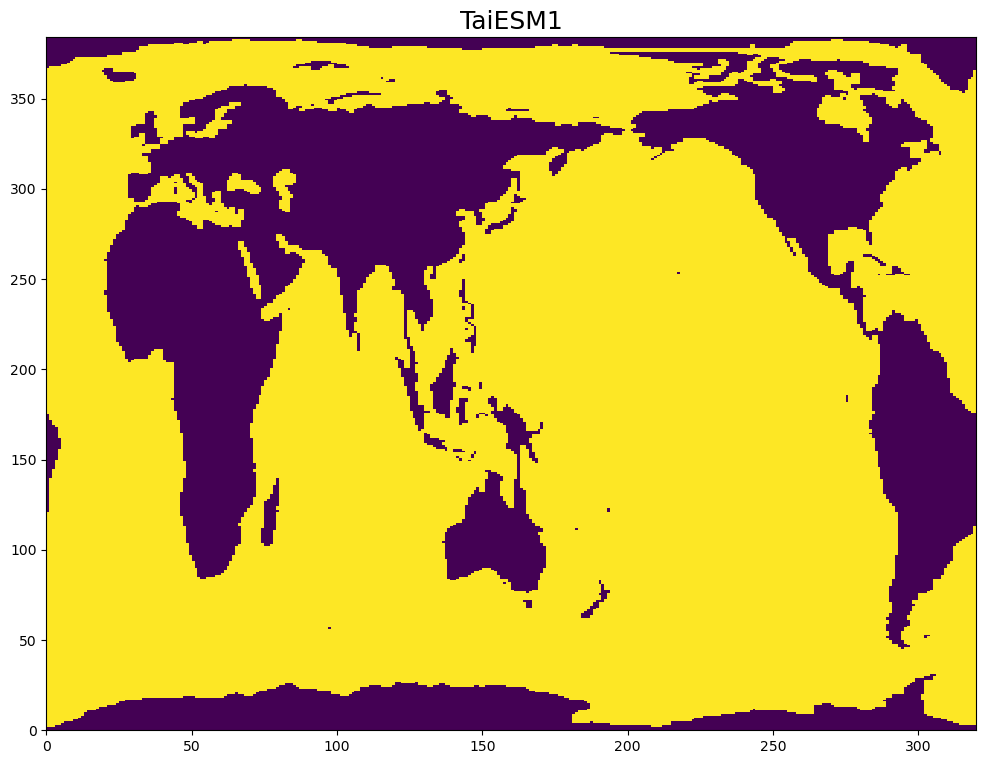

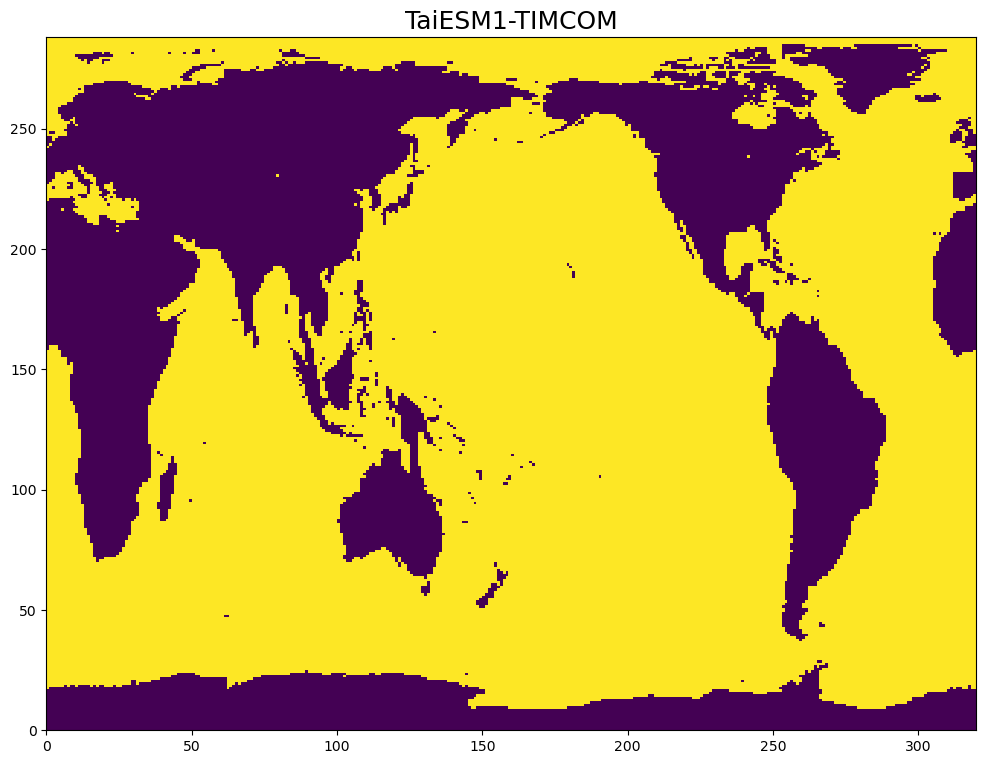

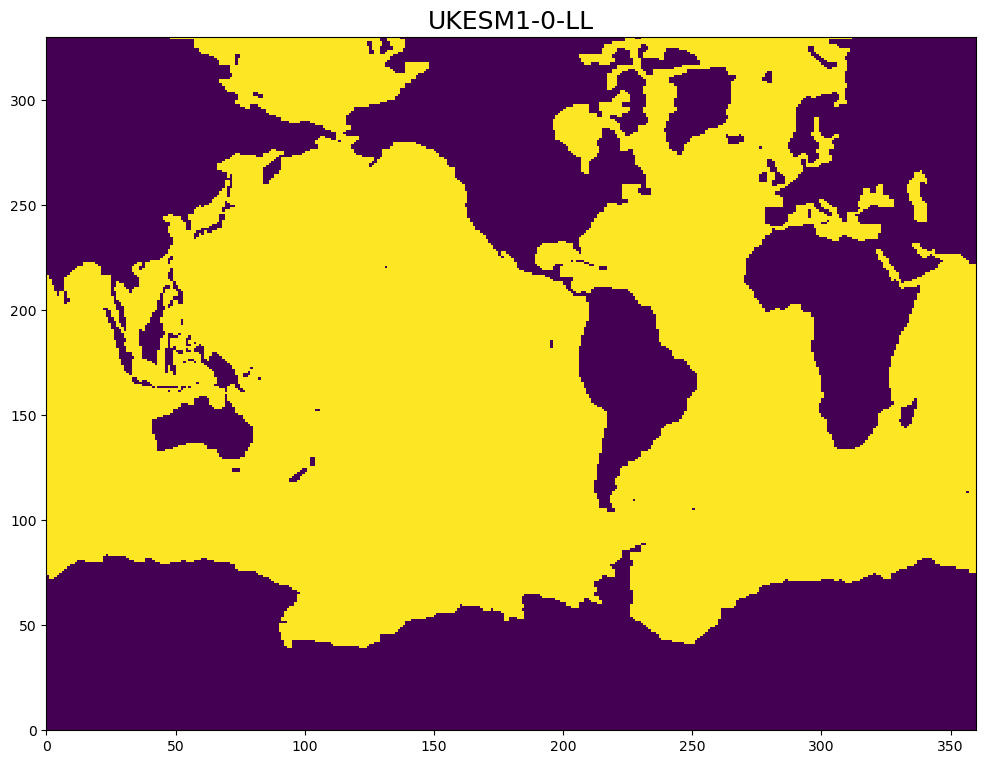

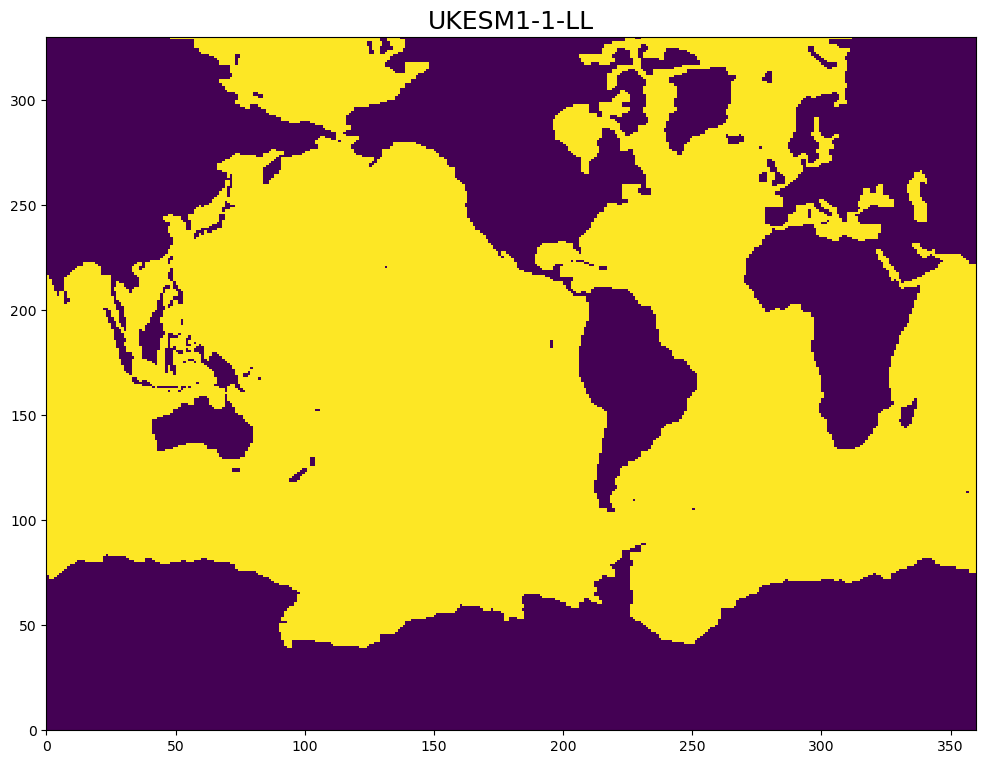

In [4]:
# Loop through all models and make basin file if it doesn't exist:
for mm in range(0,nm):
    Model = Clist[Models[mm]]
    
    # Only make basins file if mesh_mask exists:
    if os.path.isfile(Model.Omeshmask):
        basins = ('/gws/pw/j07/wishbone/jmecki/CMIP' + str(cmip) + '/basins/' + Model.name + '_basins.nc')
        #basins = ('/home/users/jmecking001/tmp_basins/' + Model.name + '_basins.nc')
        if os.path.isfile(basins):
            print(basins + ' already exists')

            # Read in variables:
            ncid = Dataset(basins,'r')
            tmask = np.squeeze(ncid.variables['Tmask'][:,:])
            lon  = np.squeeze(ncid.variables['lon'][:,:])
            lat  = np.squeeze(ncid.variables['lat'][:,:])
            ncid.close()
        else:
            ncid  = Dataset(Model.Omeshmask,'r')
            dims  = ncid.variables['tmask'].get_dims()
            tmask = np.squeeze(ncid.variables['tmask'][0,0,:,:])
            lon  = np.squeeze(ncid.variables['tlon'][:,:])
            lat  = np.squeeze(ncid.variables['tlat'][:,:])
            ncid.close

            # Make consistant longitude range:
            lon[np.where(lon > 180)]  = lon[np.where(lon > 180)]  - 360
            lon[np.where(lon < -180)] = lon[np.where(lon < -180)] + 360

            print('creating ' + basins)

            ncid = Dataset(basins, 'w', format='NETCDF4')
            # dimensions:
            ncid.createDimension(dims[3].name,dims[3].size)
            ncid.createDimension(dims[2].name,dims[2].size)
            # variables:
            ncid.createVariable('lon'  ,'f8',(dims[2].name,dims[3].name,))
            ncid.createVariable('lat'  ,'f8',(dims[2].name,dims[3].name,))
            ncid.createVariable('Tmask','f8',(dims[2].name,dims[3].name,))
            # fill variables:
            ncid.variables['lon'][:,:]   = lon
            ncid.variables['lat'][:,:]   = lat
            ncid.variables['Tmask'][:,:] = tmask
            # close:
            ncid.close()

        plt.figure(figsize=(12,9))
        plt.pcolormesh(tmask)
        plt.title(Model.name,fontsize=18)
    else:
        print('Need to compute ocean mesh_mask file first for ' + Model.name)

Connected already Computed for ACCESS-CM2
Connected already Computed for ACCESS-ESM1-5
Connected already Computed for ACCESS-OM2
Connected already Computed for ACCESS-OM2-025
Connected already Computed for BCC-CSM2-HR
Connected already Computed for BCC-CSM2-MR
Connected already Computed for BCC-ESM1
Connected already Computed for CAMS-CSM1-0
Connected already Computed for CAS-ESM2-0
Connected already Computed for CESM1-CAM5-SE-LR
Connected already Computed for CESM2
Connected already Computed for CESM2-FV2
Connected already Computed for CESM2-WACCM
Connected already Computed for CESM2-WACCM-FV2
Connected already Computed for CIESM
Connected already Computed for CMCC-CM2-HR4
Connected already Computed for CMCC-CM2-SR5
Connected already Computed for CMCC-CM2-VHR4
Connected already Computed for CMCC-ESM2
Connected already Computed for CNRM-CM6-1
Connected already Computed for CNRM-CM6-1-HR
Connected already Computed for CNRM-ESM2-1


/home/users/jmecking001/miniconda3/envs/working/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Connected already Computed for CanESM5
Connected already Computed for E3SM-1-0
Connected already Computed for E3SM-1-1
Connected already Computed for E3SM-1-1-ECA
Connected already Computed for EC-Earth3
Connected already Computed for EC-Earth3-AerChem
Connected already Computed for EC-Earth3-CC
Connected already Computed for EC-Earth3-Veg
Connected already Computed for EC-Earth3-Veg-LR
Connected already Computed for EC-Earth3P
Connected already Computed for EC-Earth3P-HR
Connected already Computed for ECMWF-IFS-HR
Connected already Computed for ECMWF-IFS-LR
Connected already Computed for ECMWF-IFS-MR
Connected already Computed for FGOALS-f3-L
Connected already Computed for FGOALS-g3
Connected already Computed for FIO-ESM-2-0
Connected already Computed for GFDL-CM4
Connected already Computed for GFDL-ESM2M
Connected already Computed for GISS-E2-1-G
Connected already Computed for GISS-E2-1-G-CC
Connected already Computed for HadGEM3-GC31-HH
Connected already Computed for HadGEM3-GC31-HM

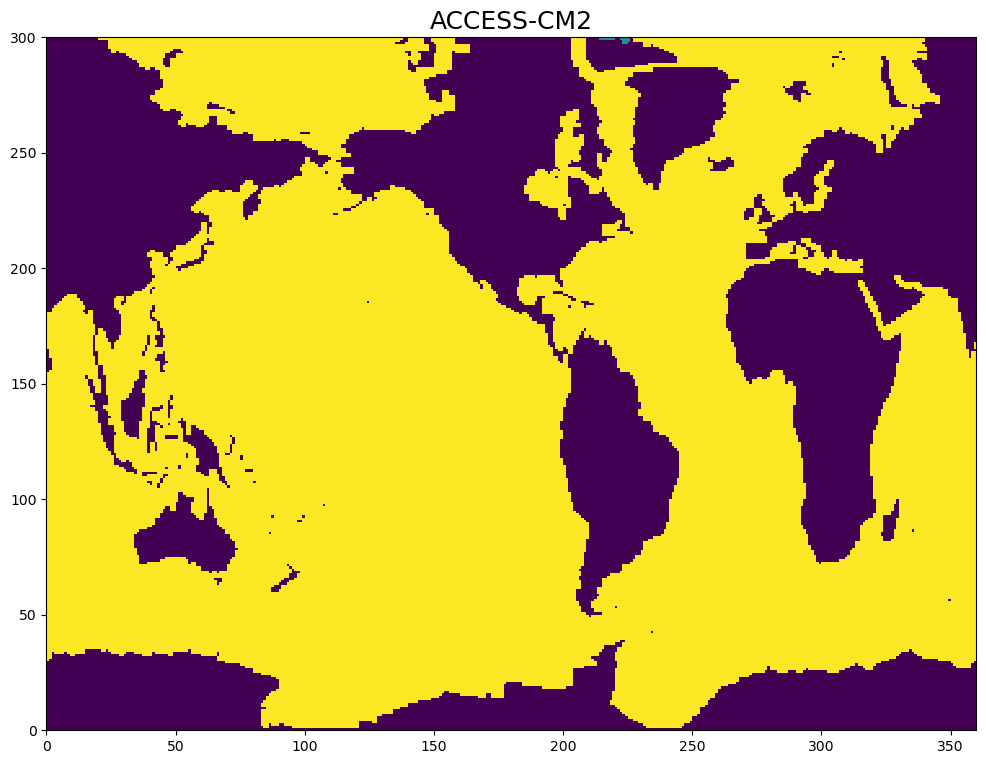

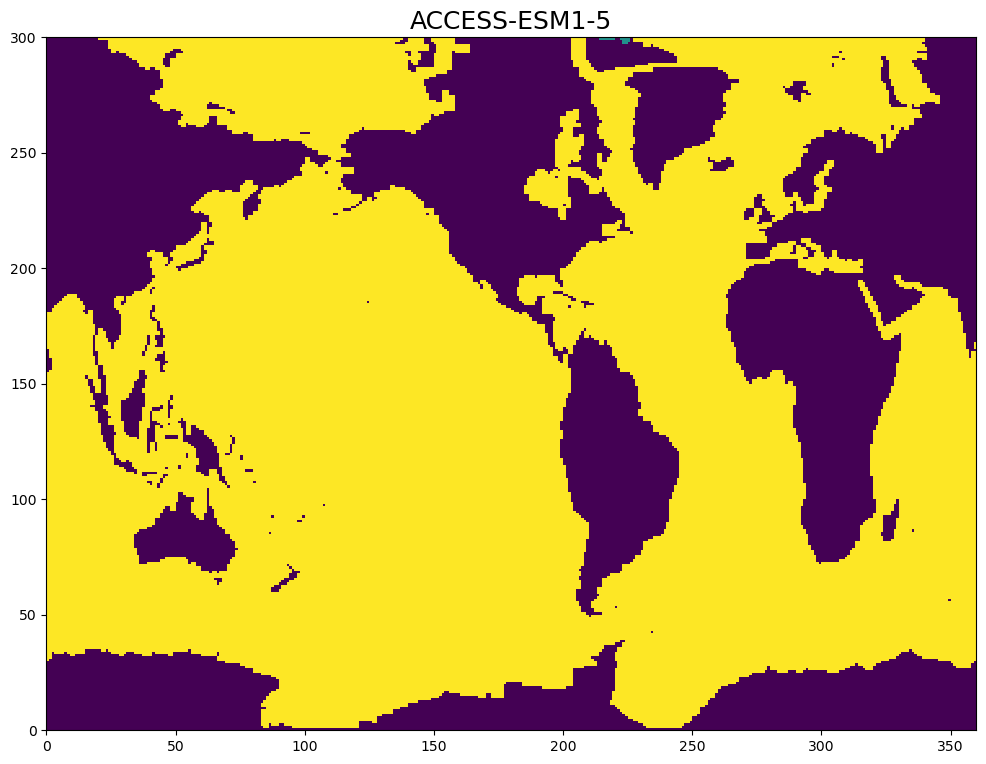

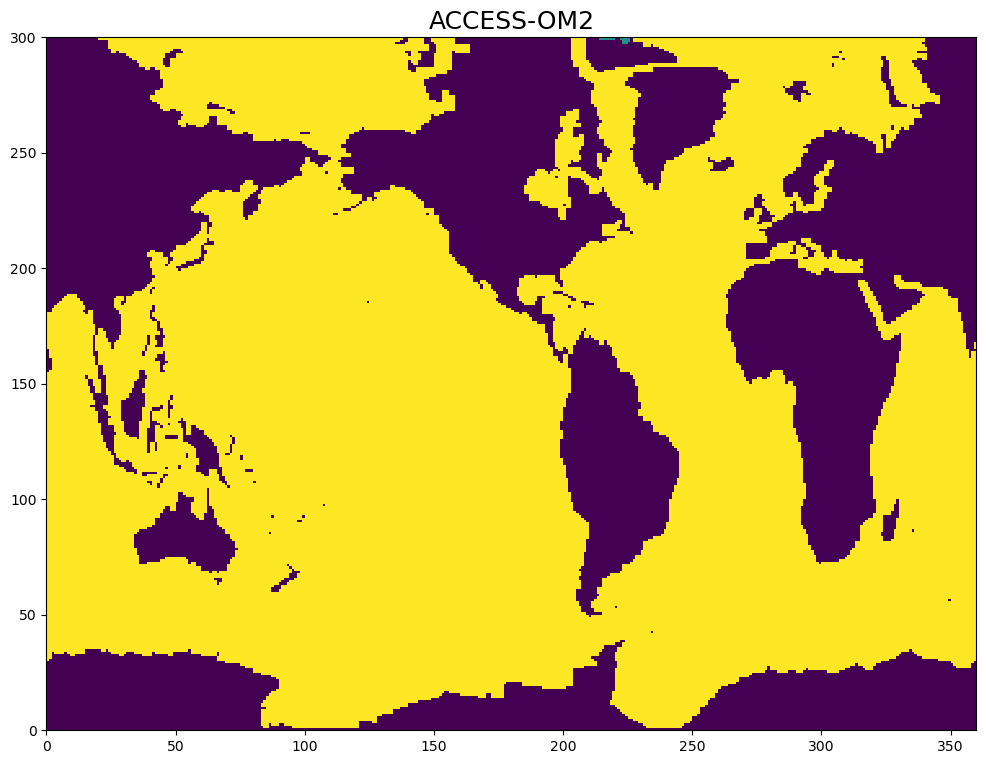

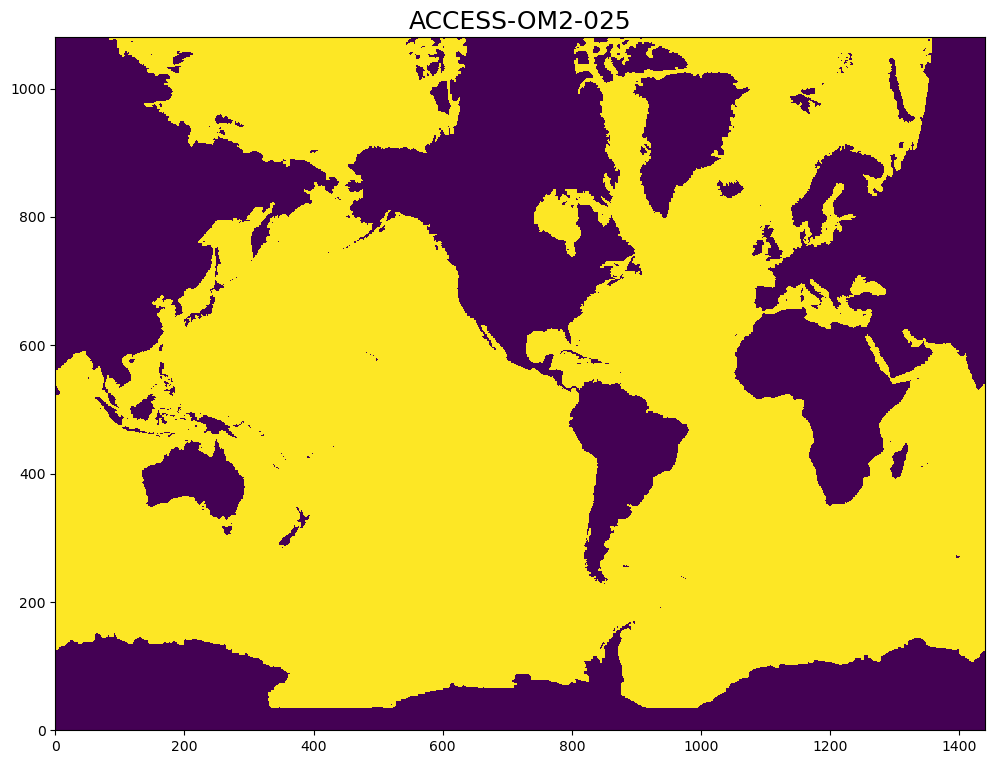

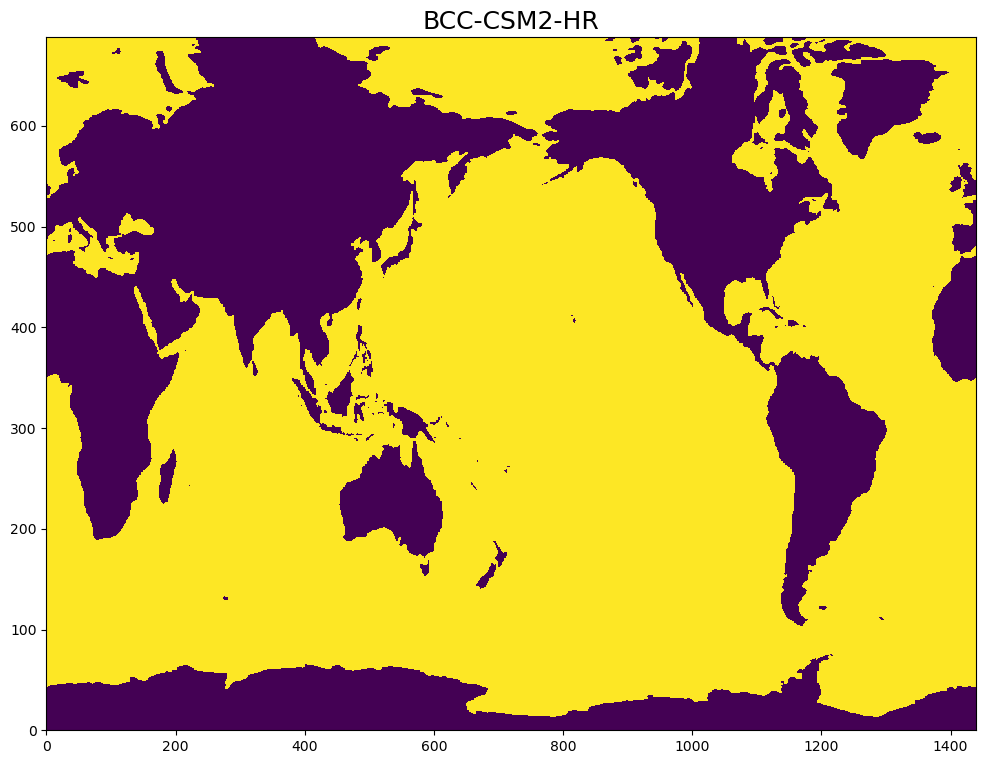

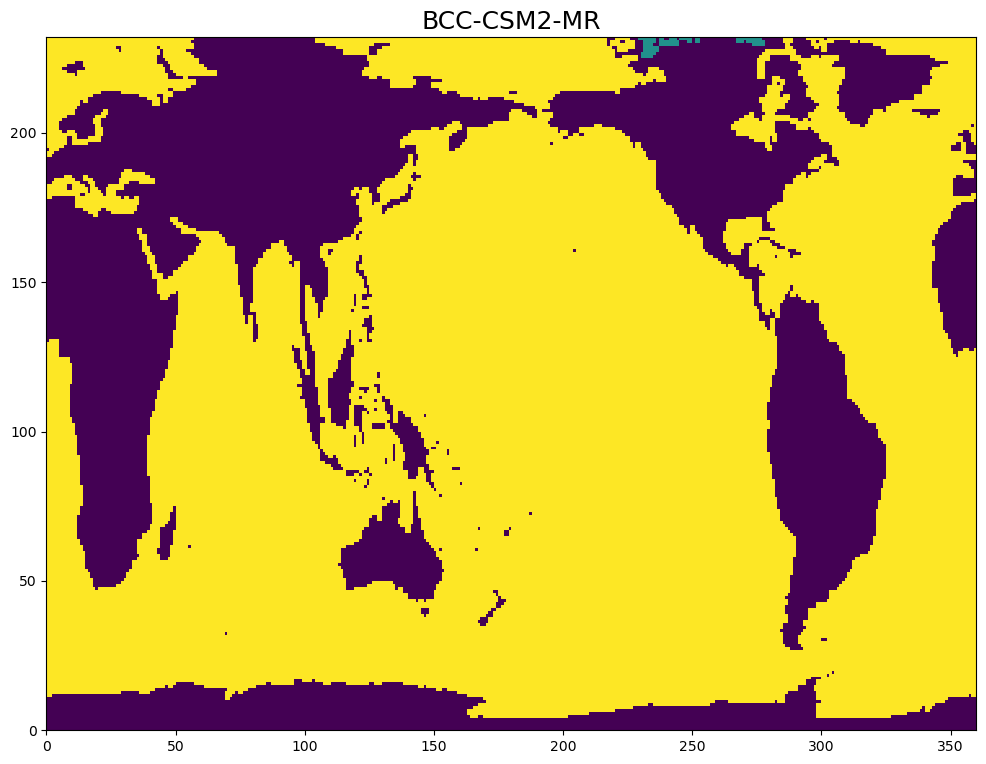

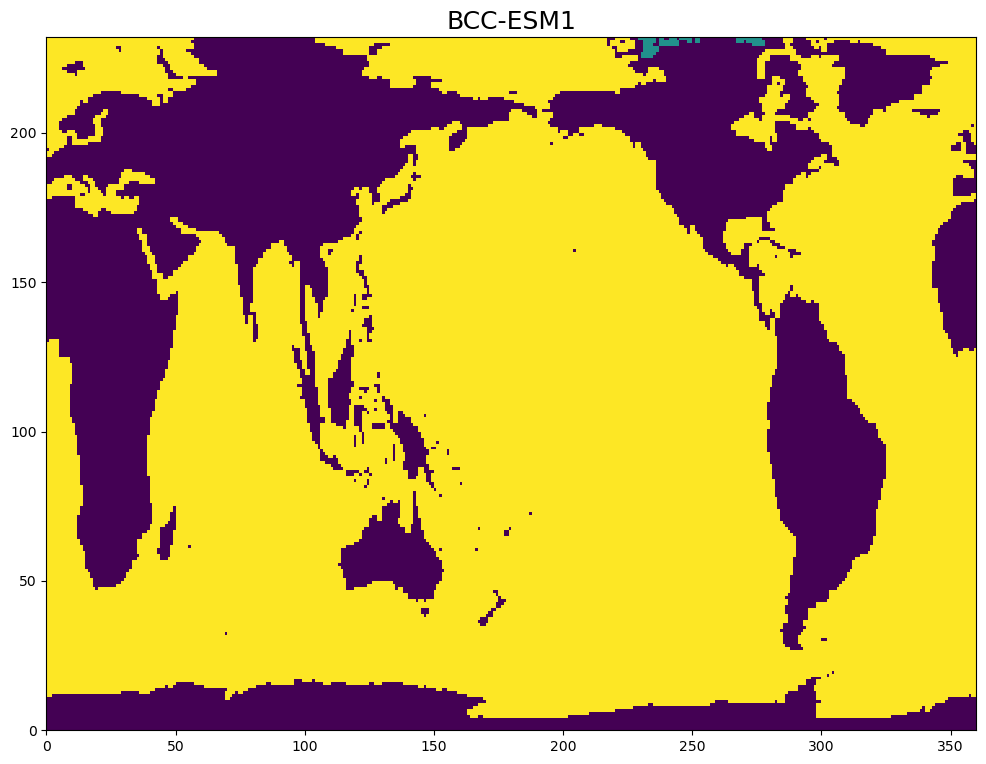

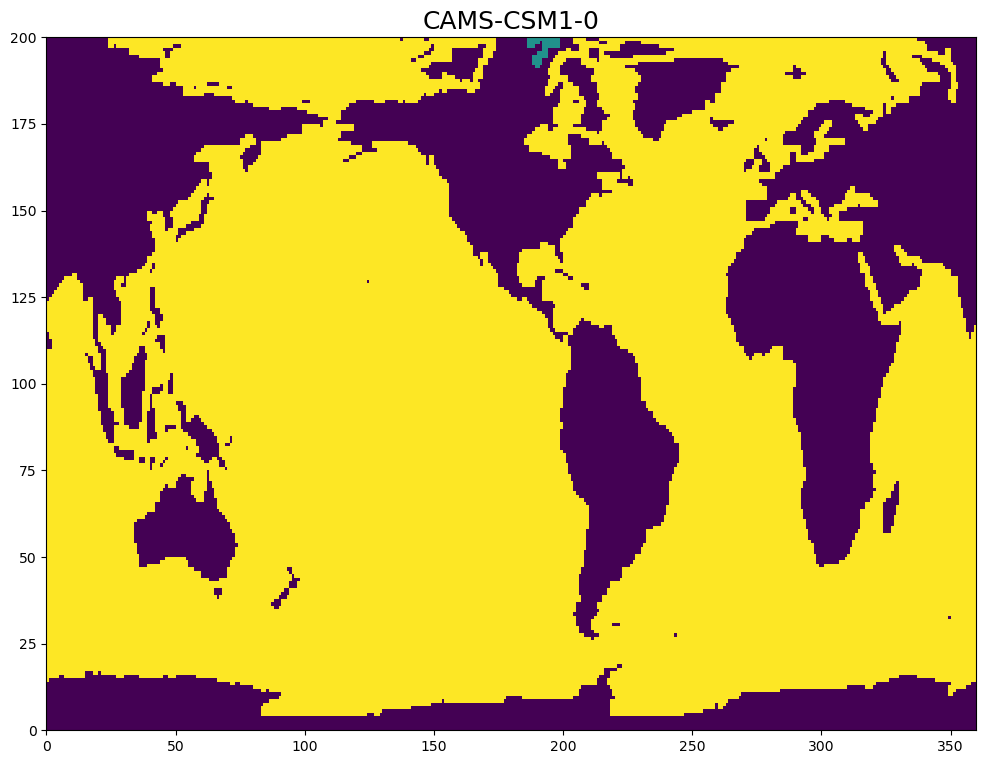

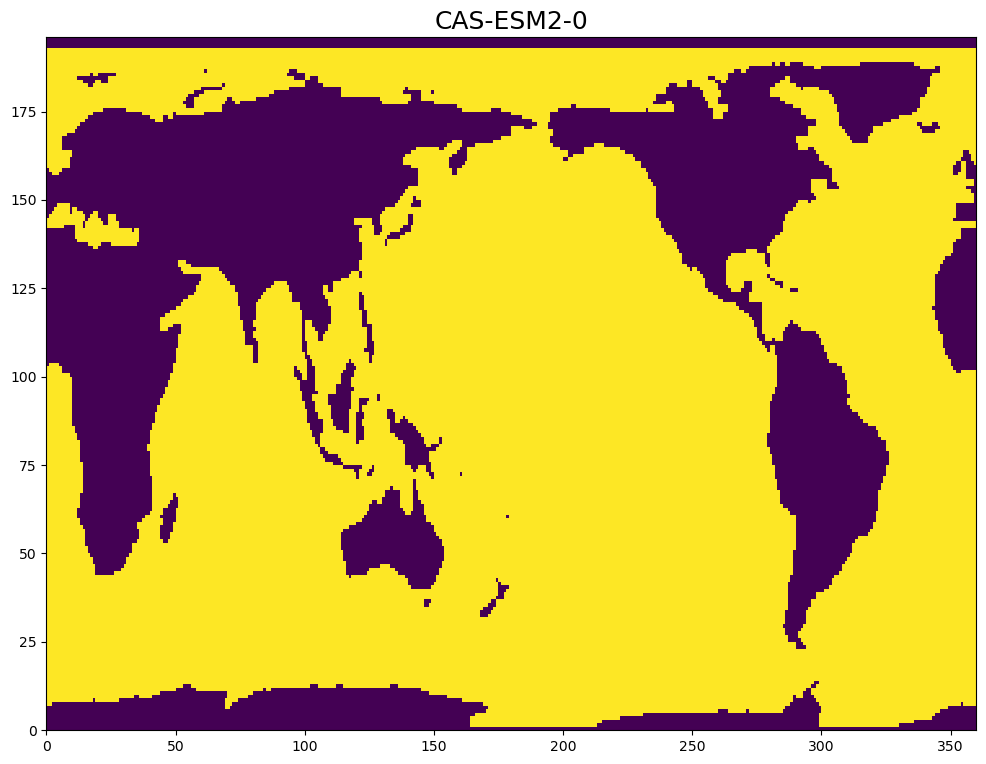

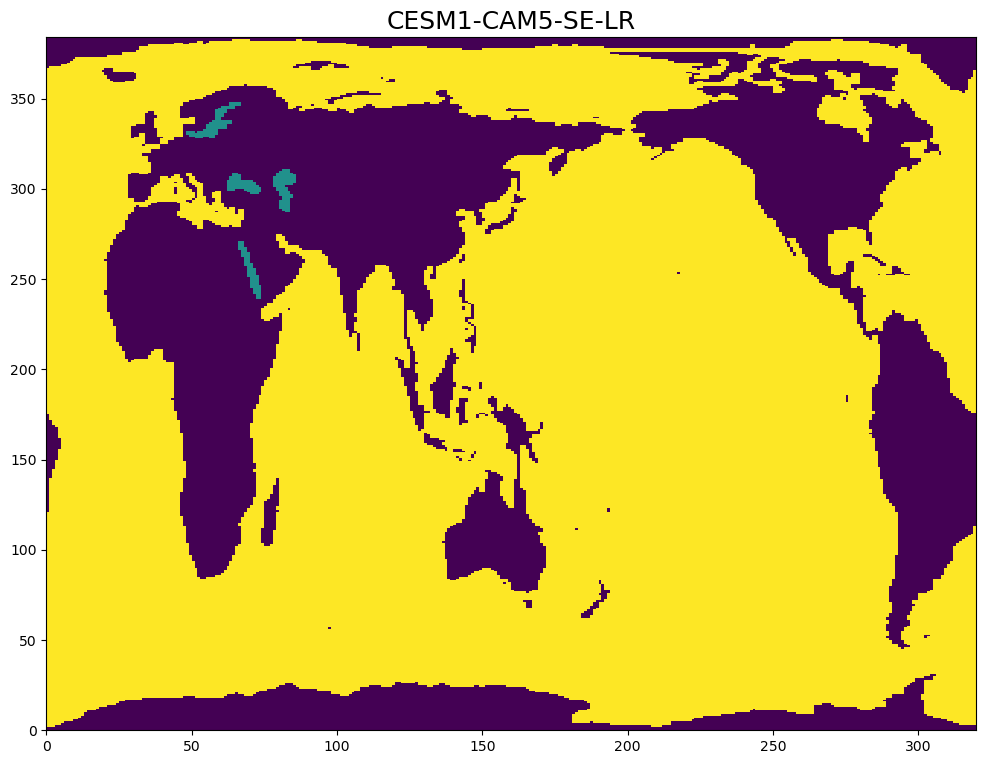

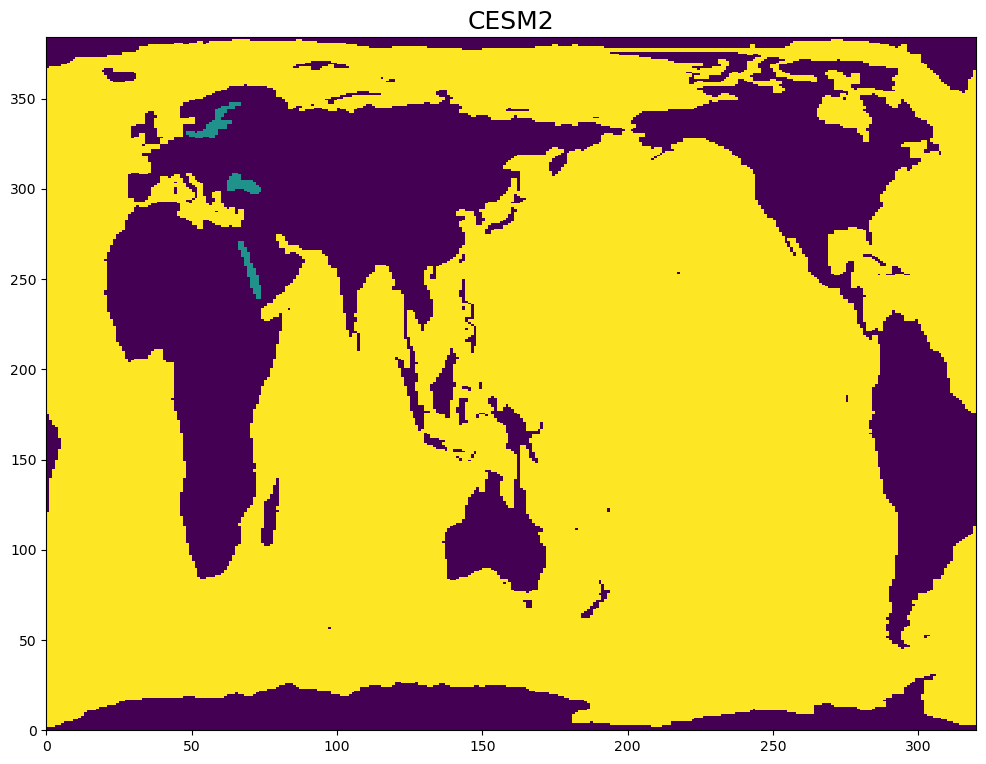

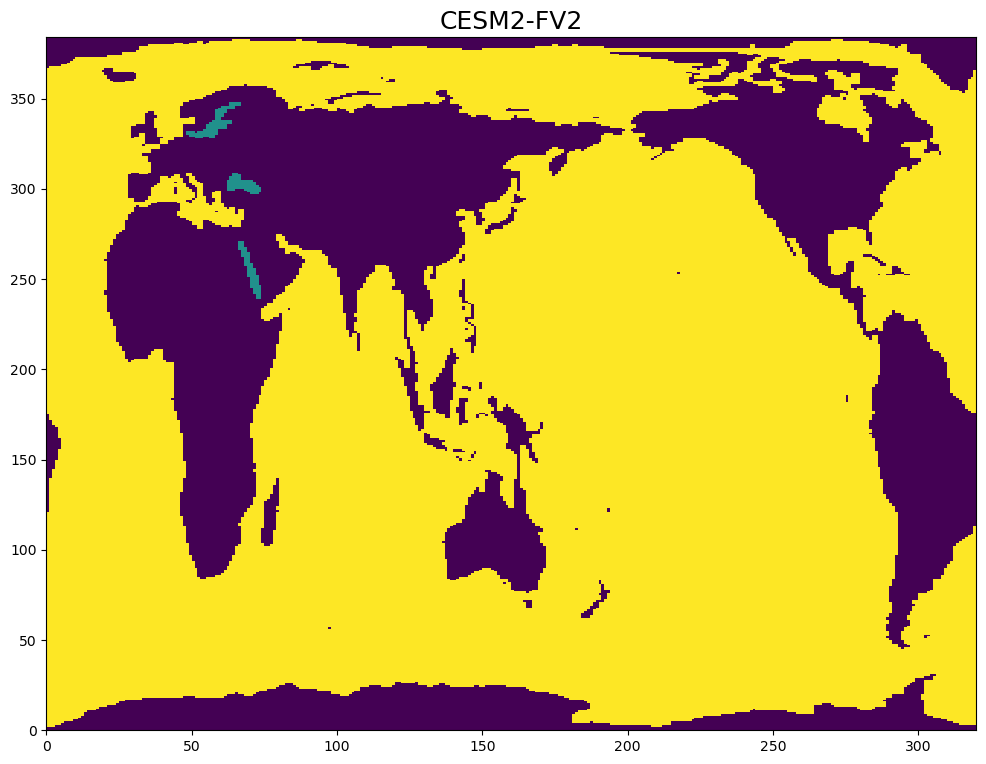

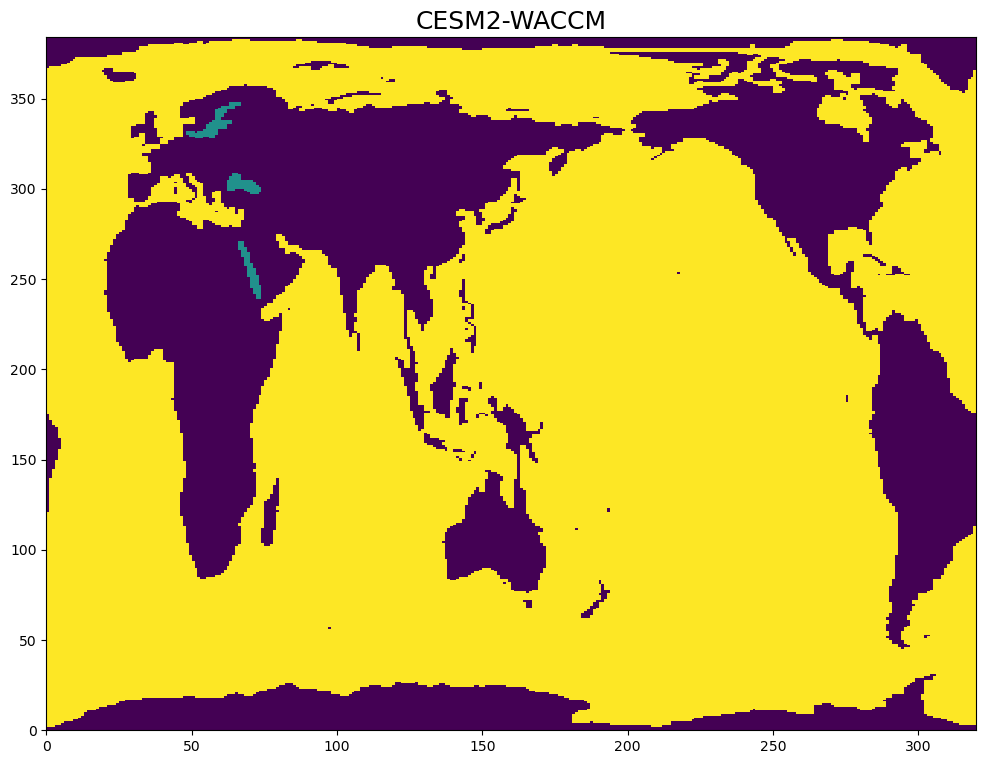

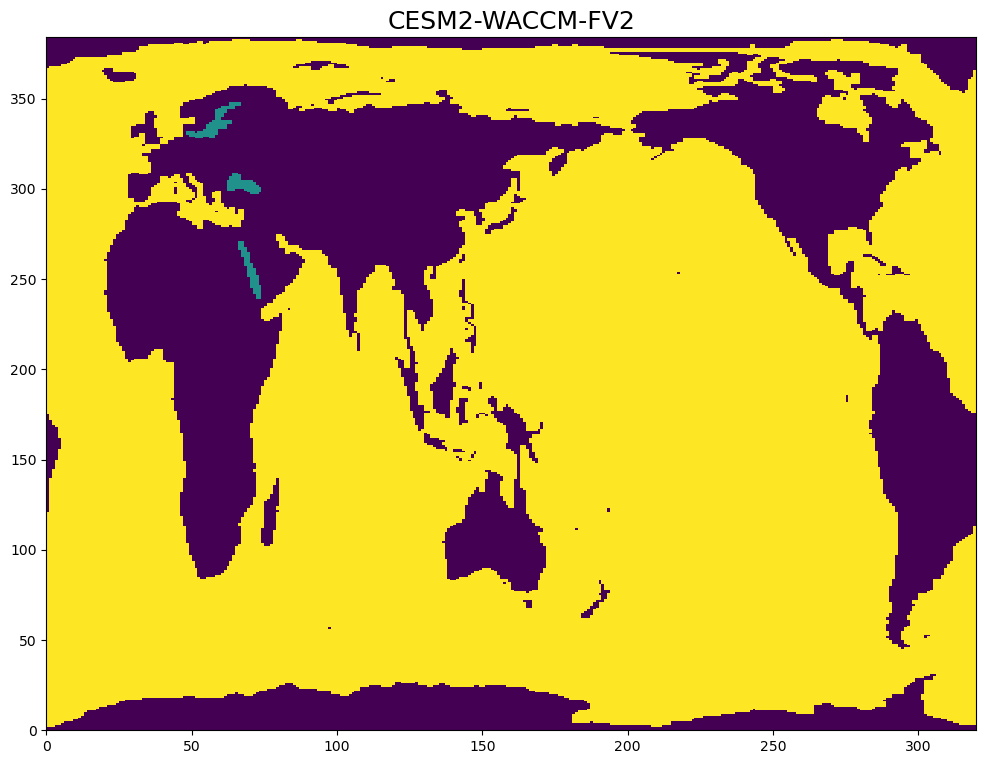

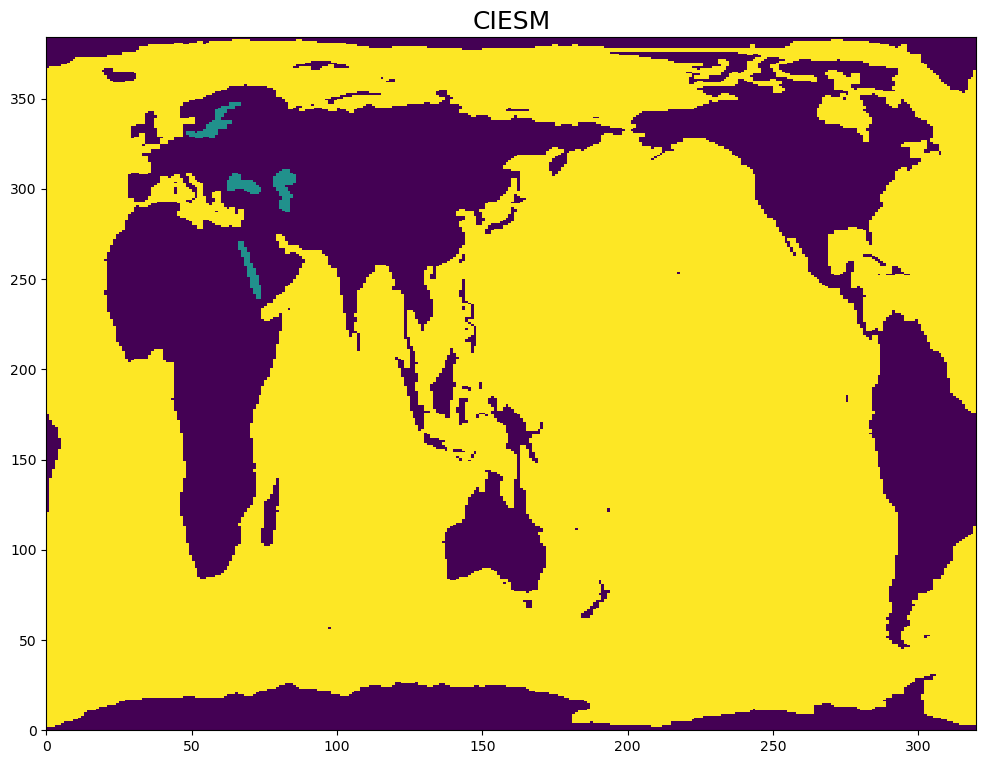

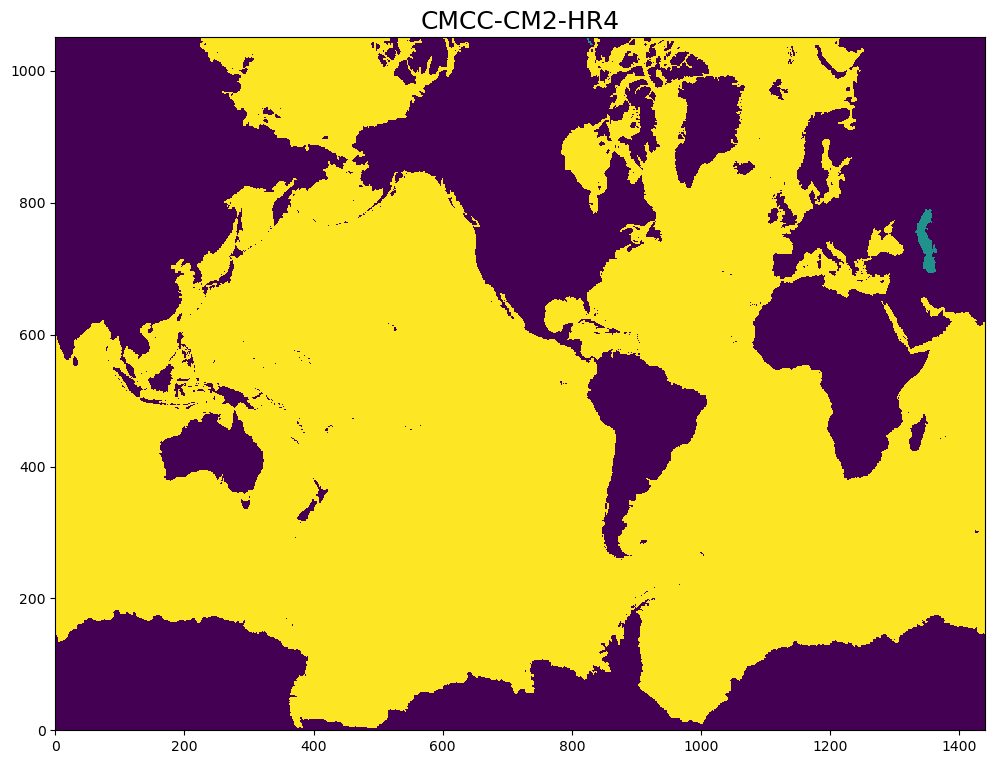

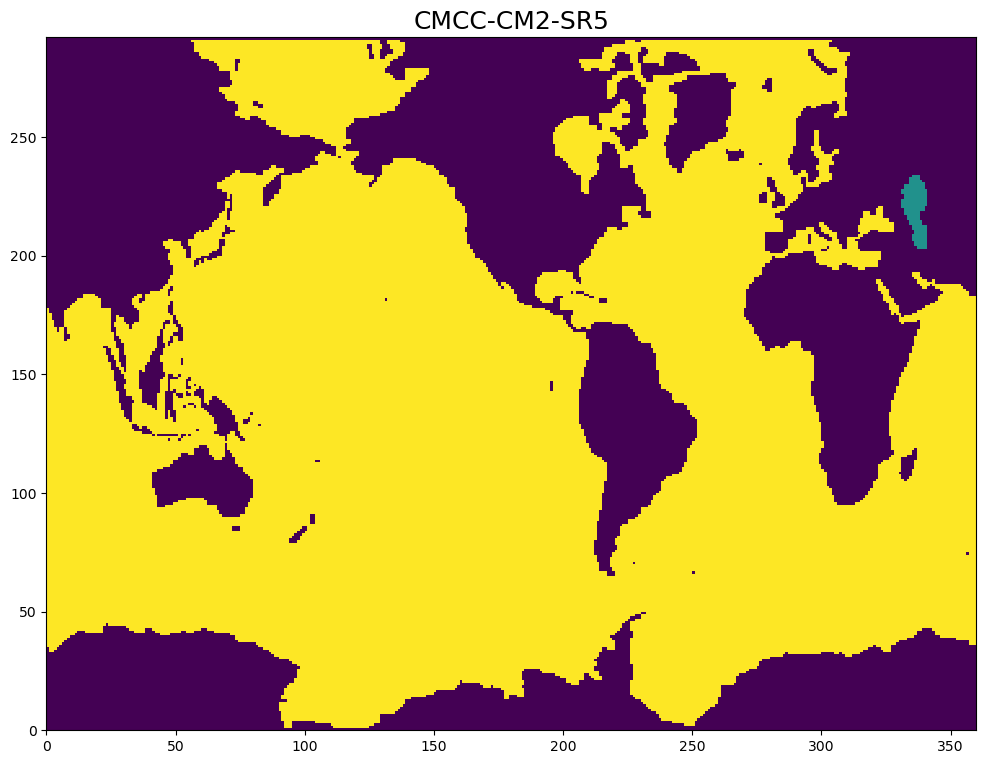

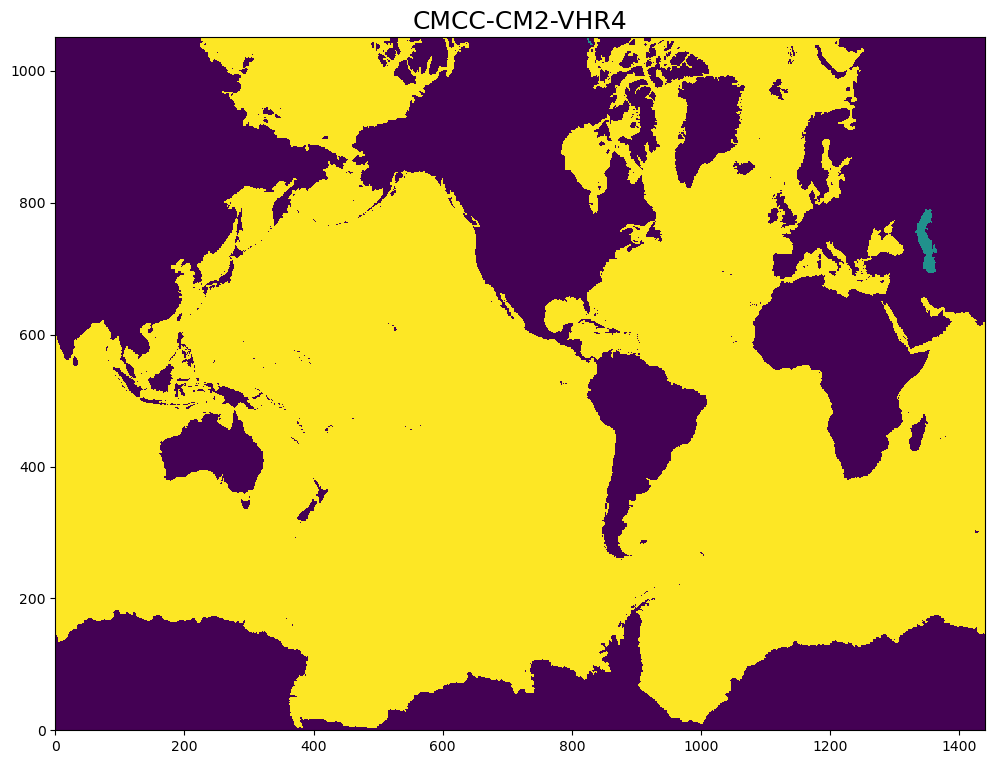

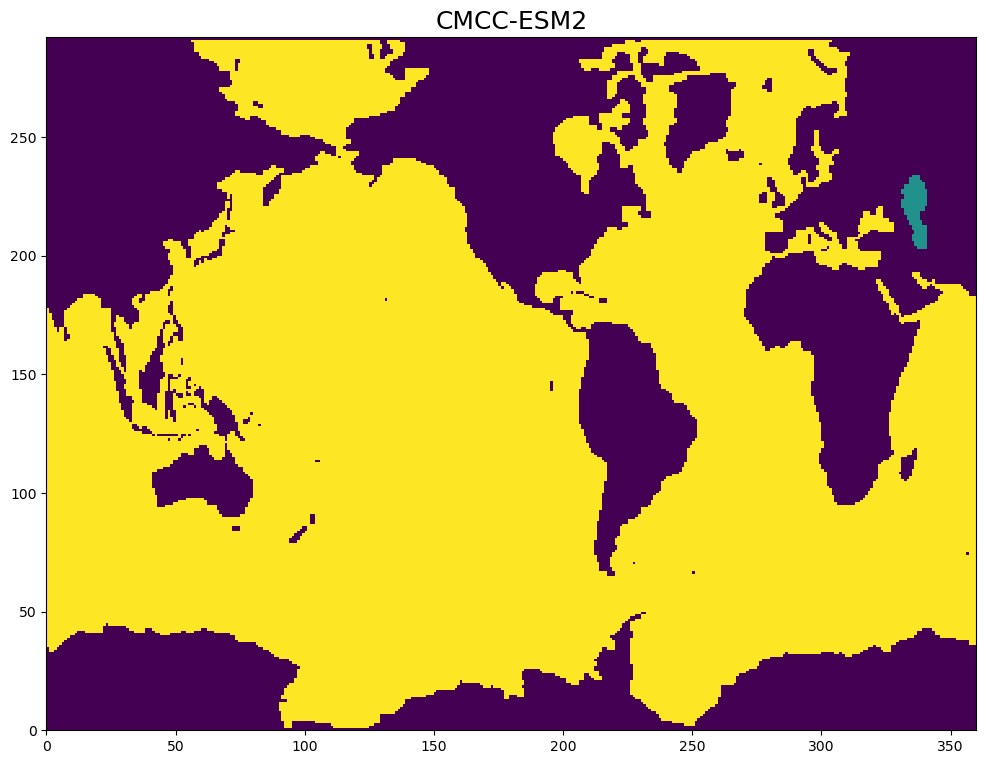

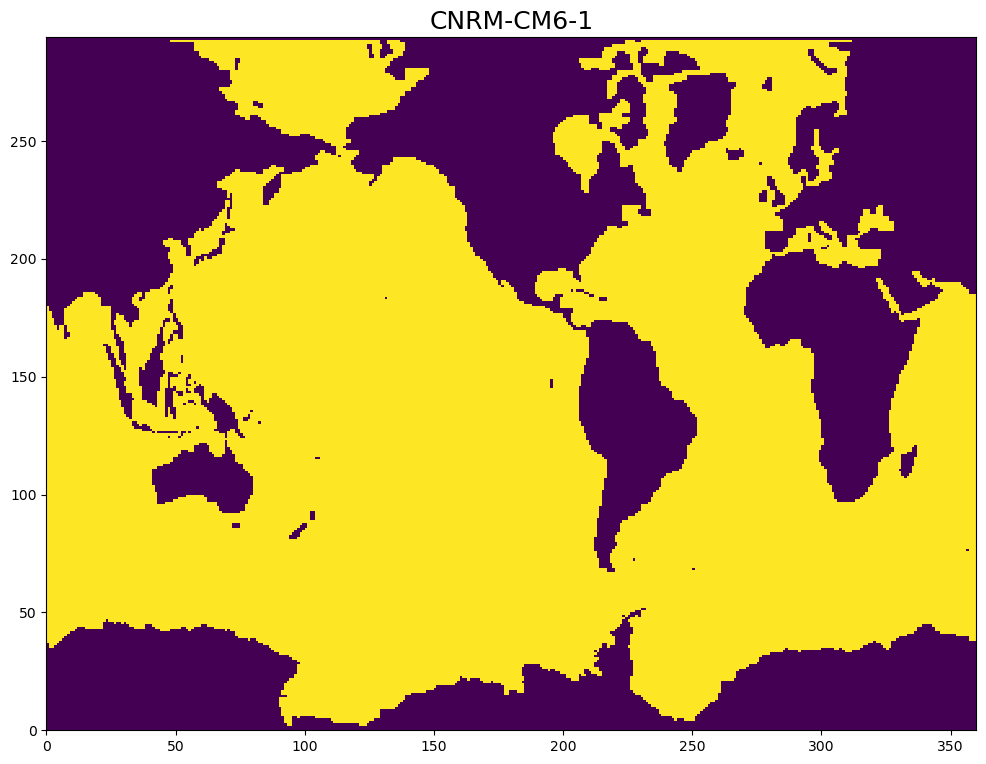

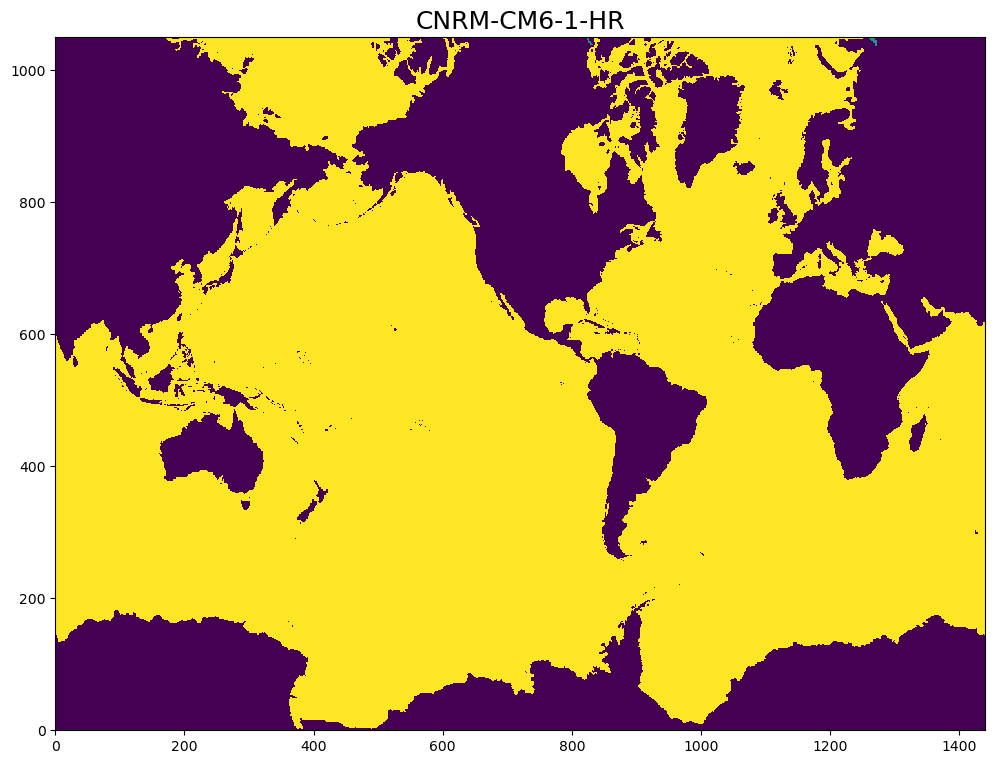

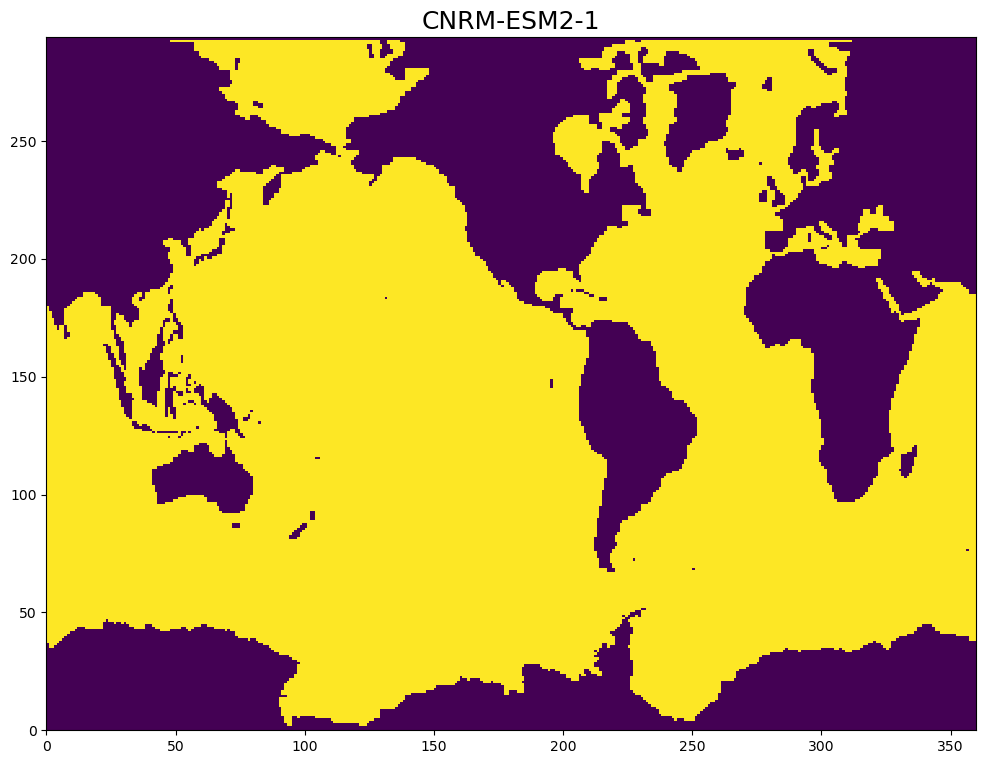

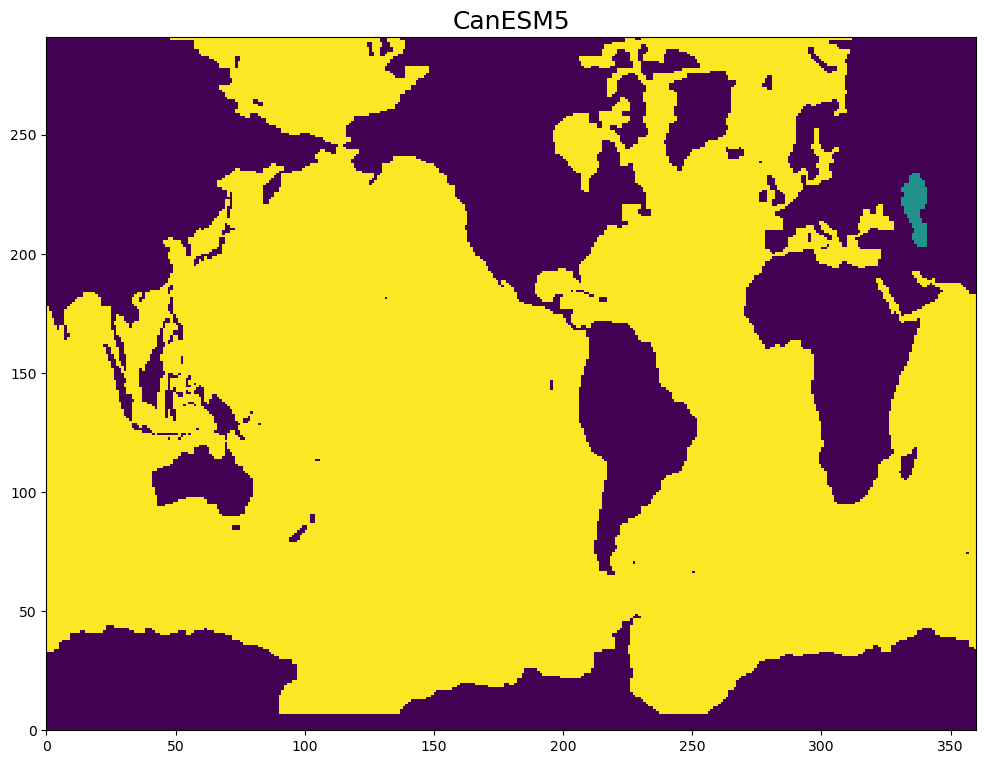

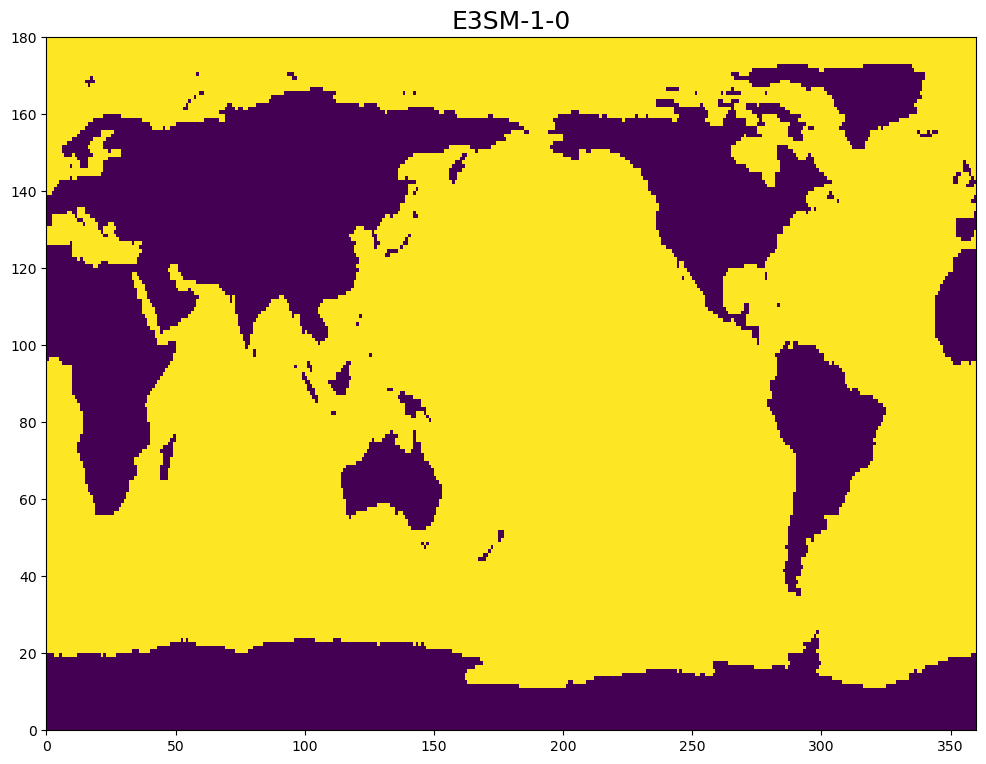

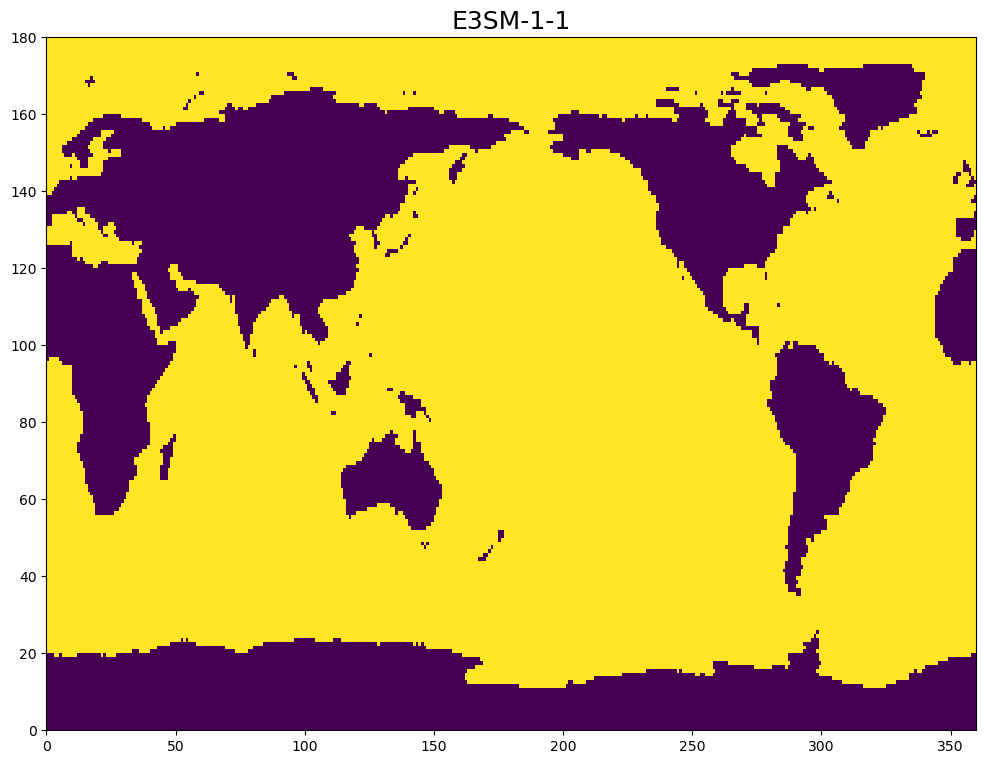

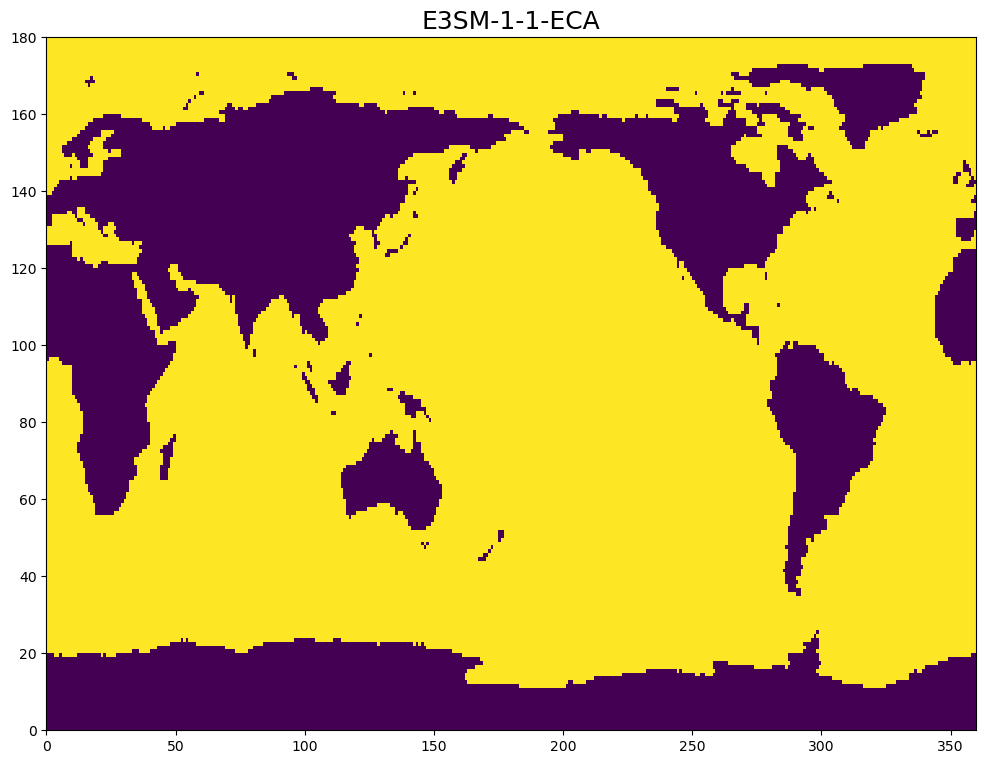

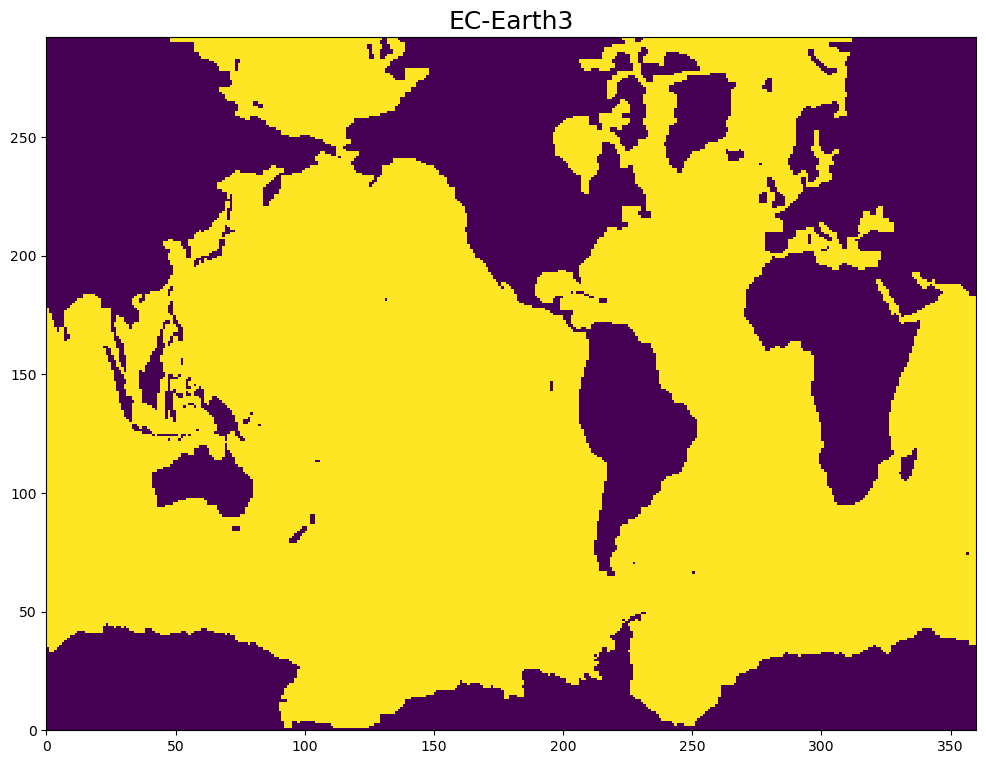

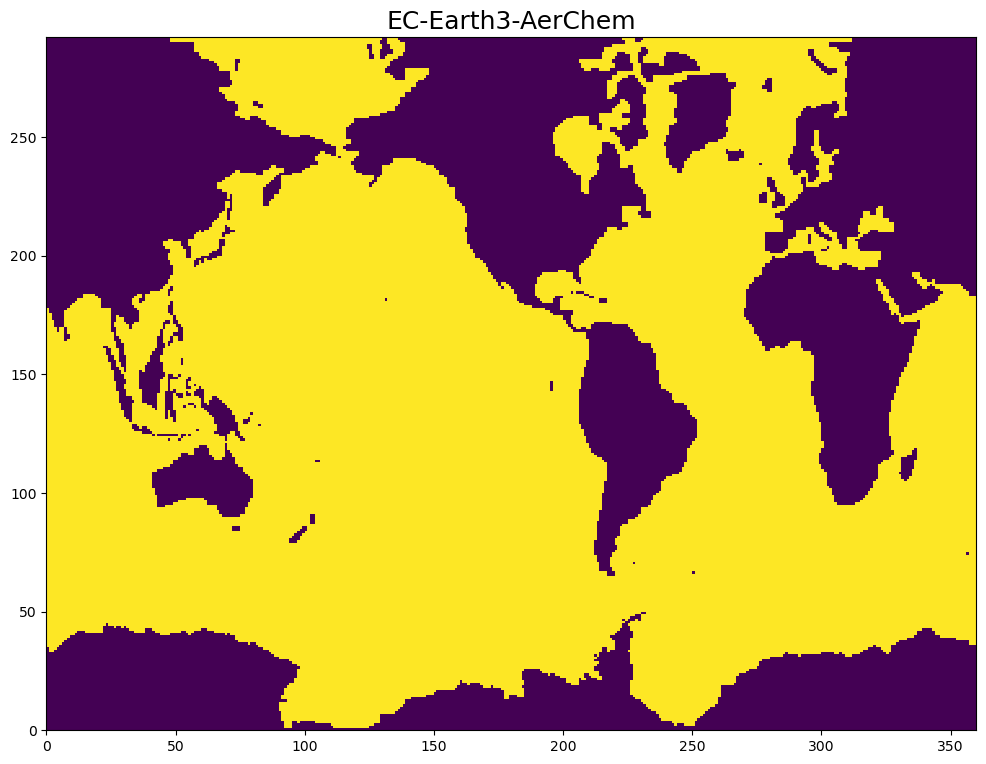

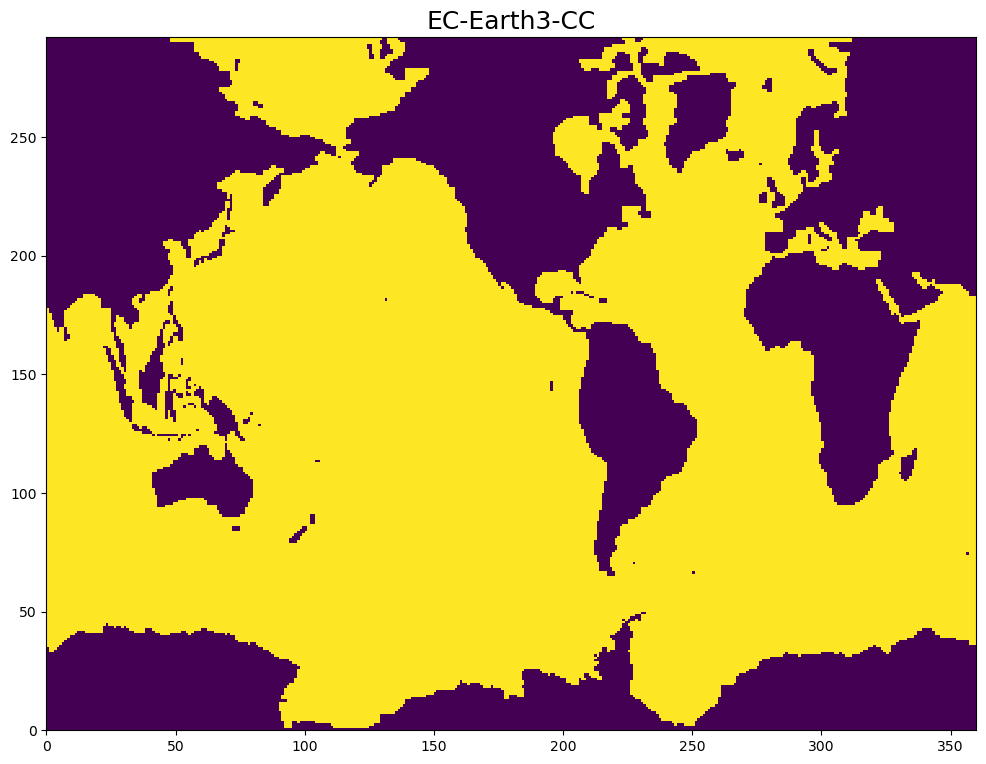

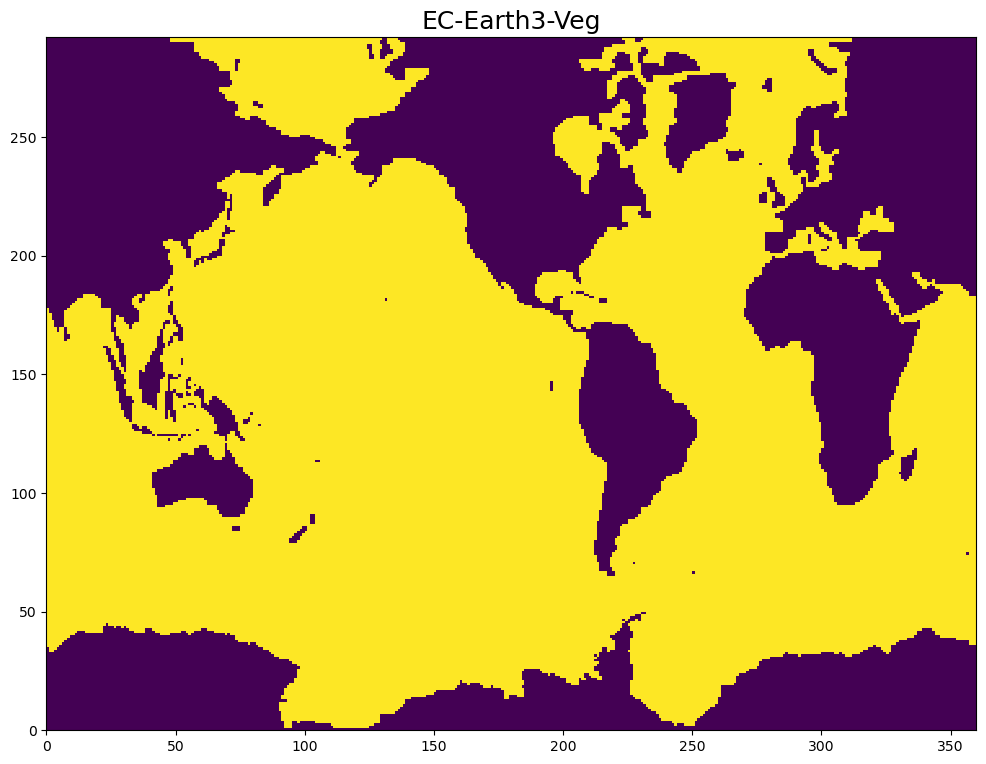

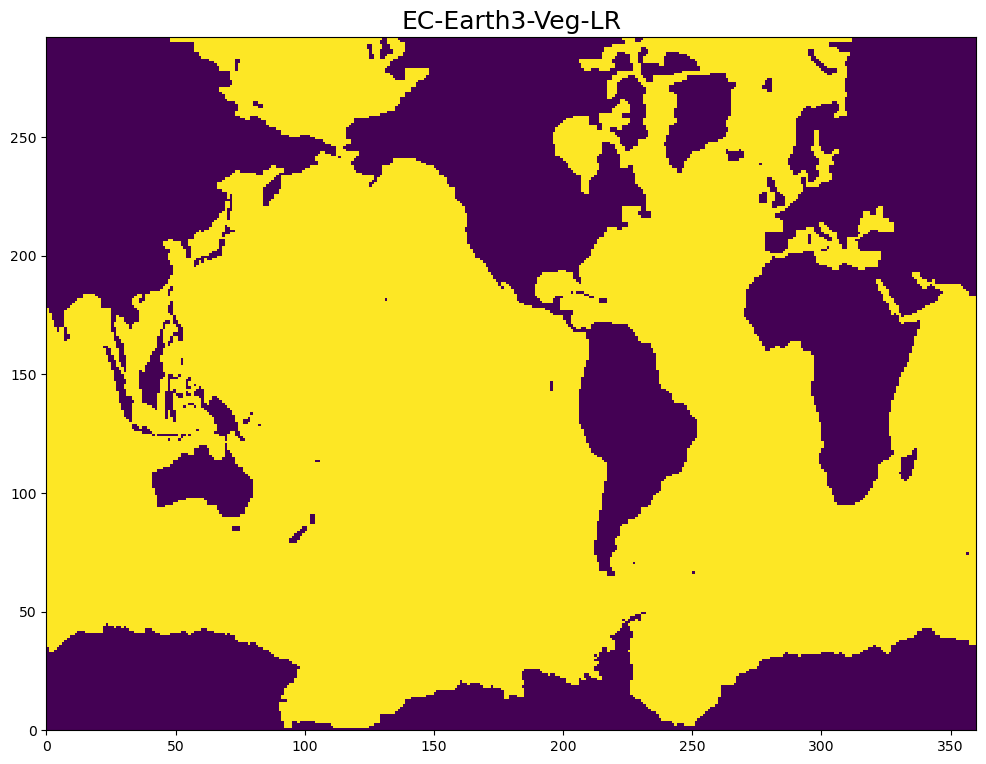

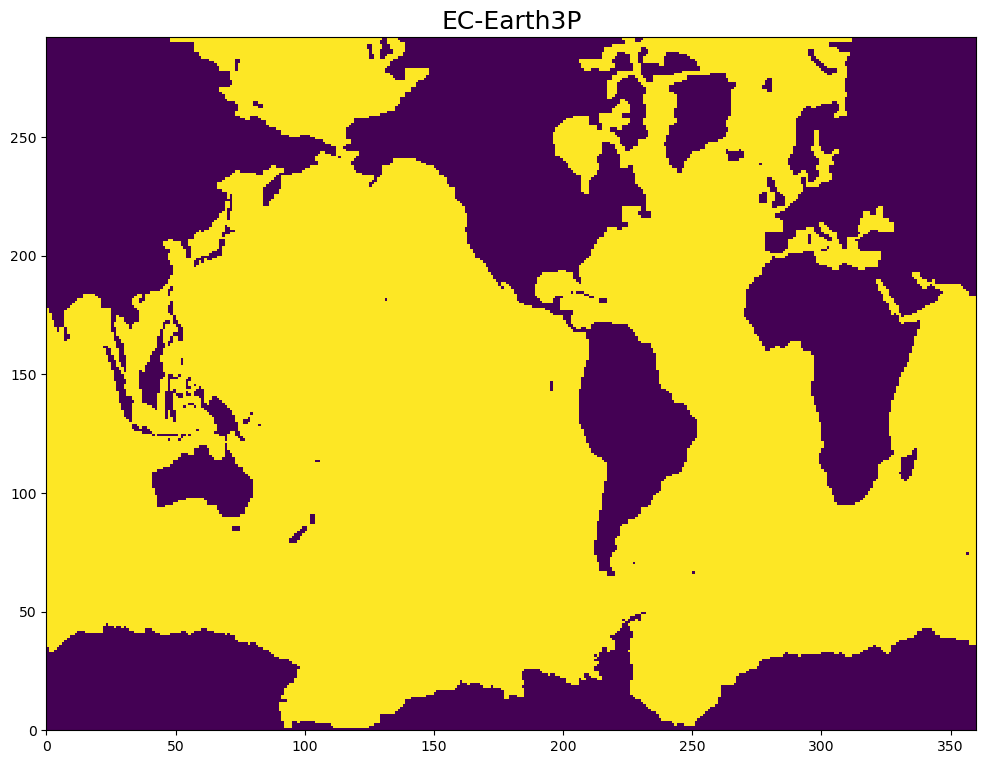

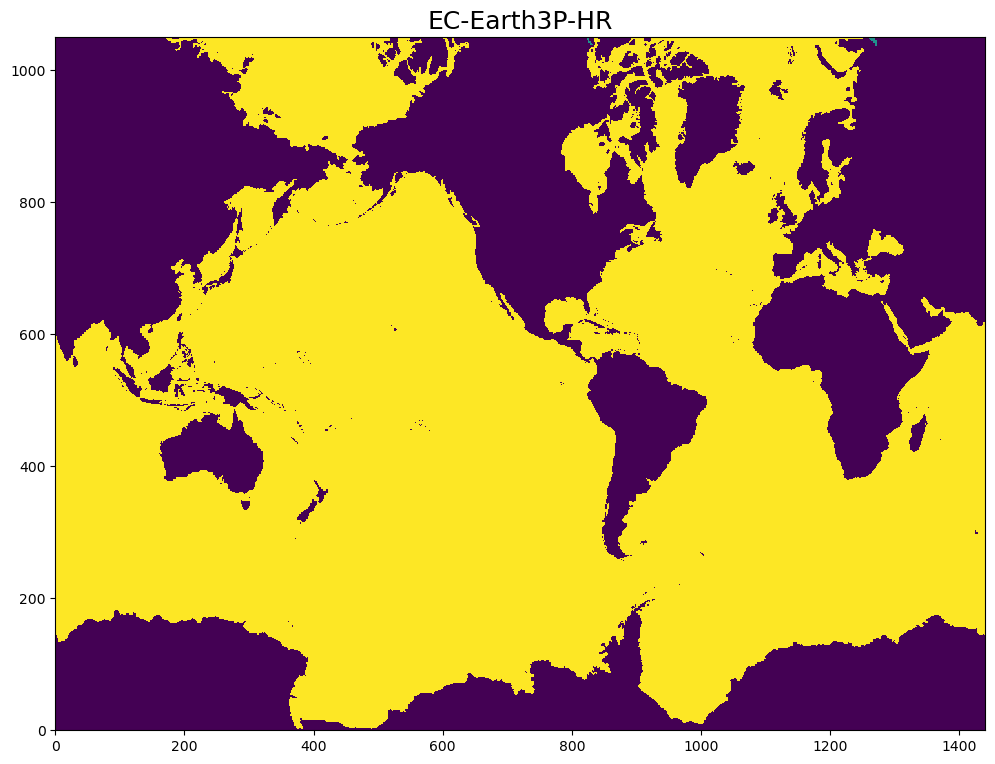

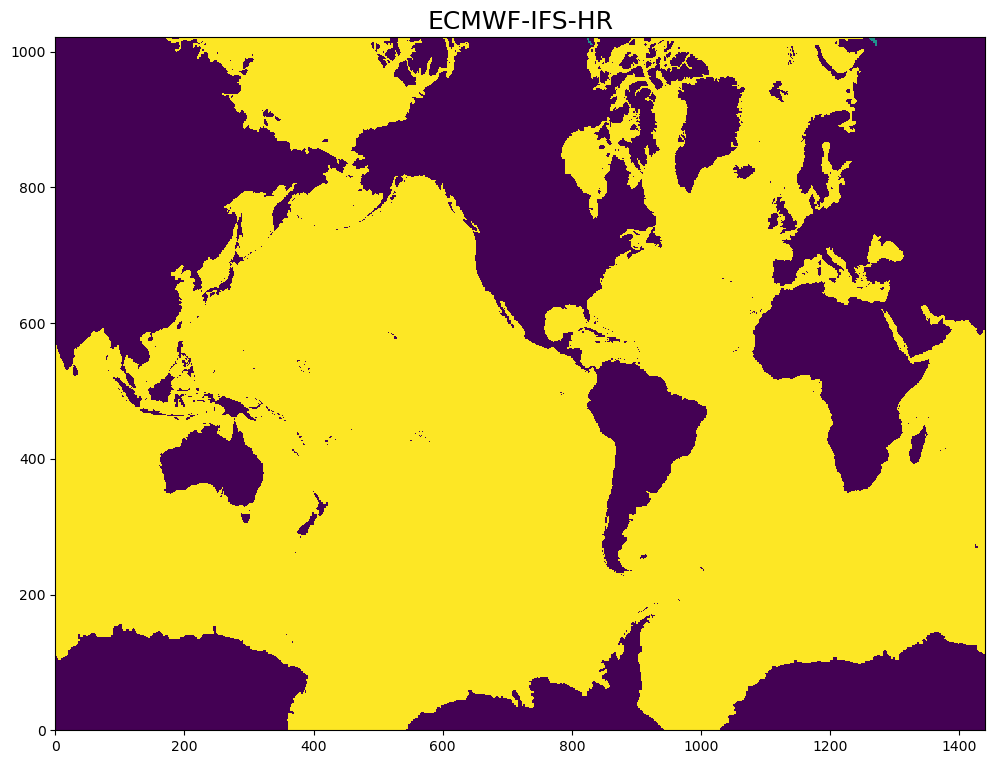

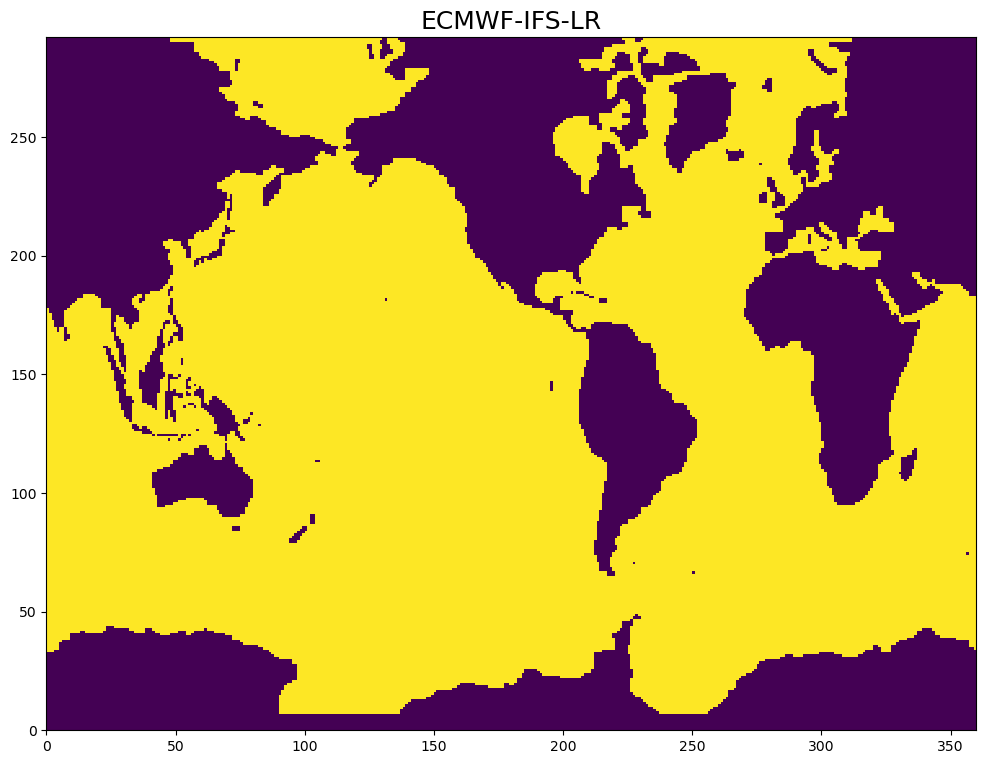

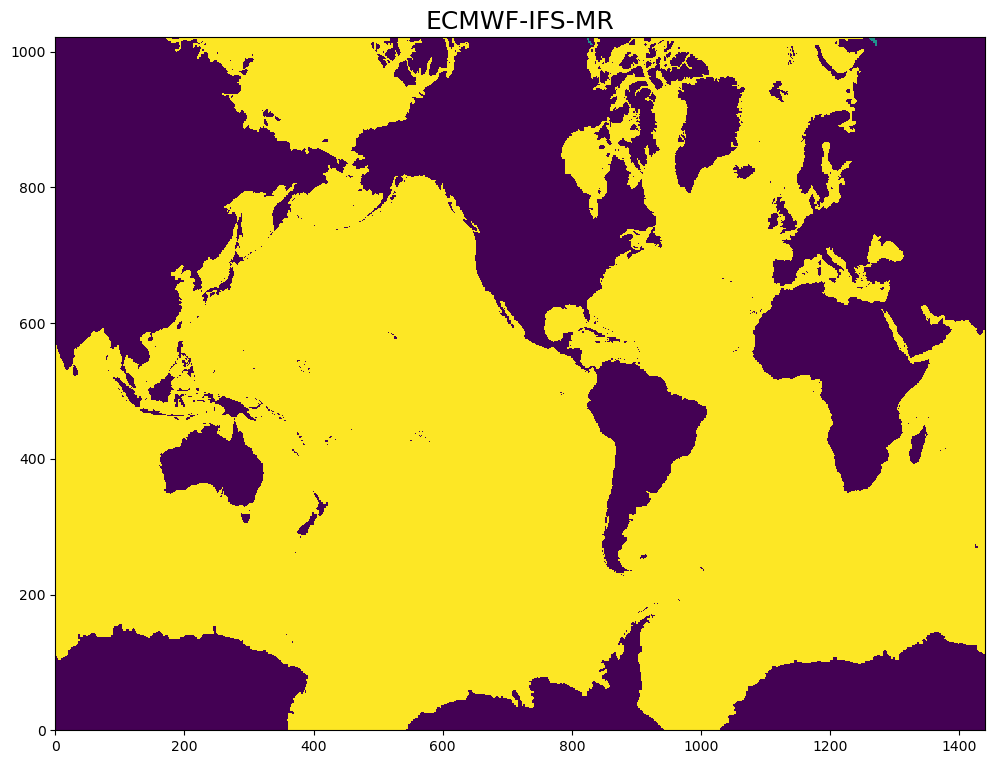

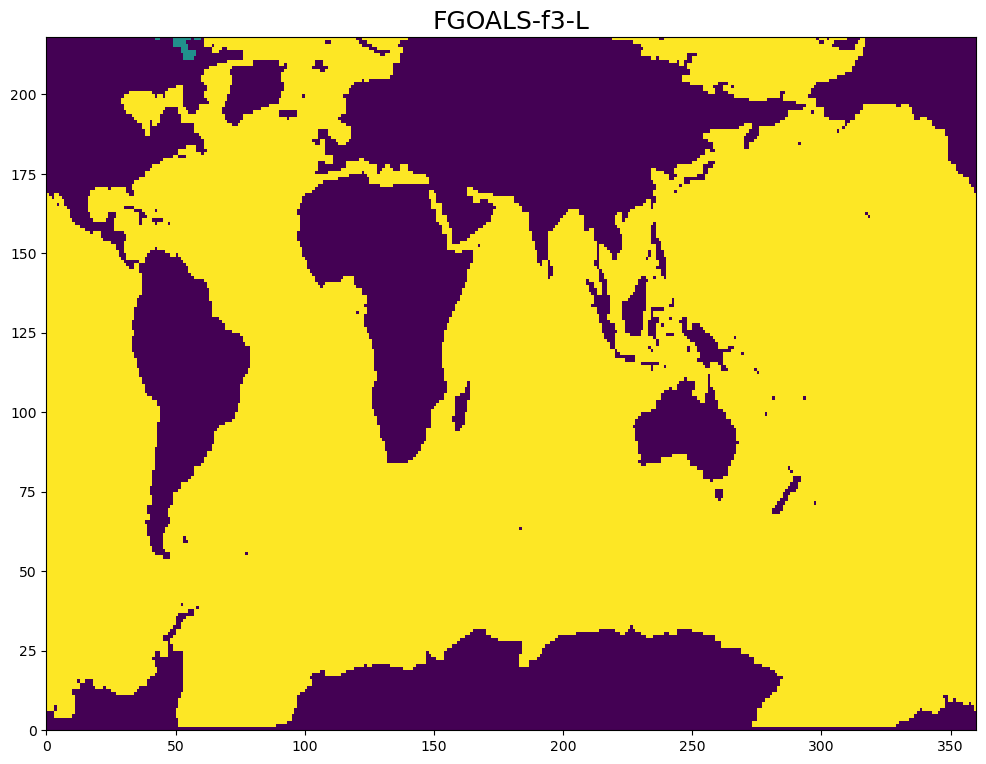

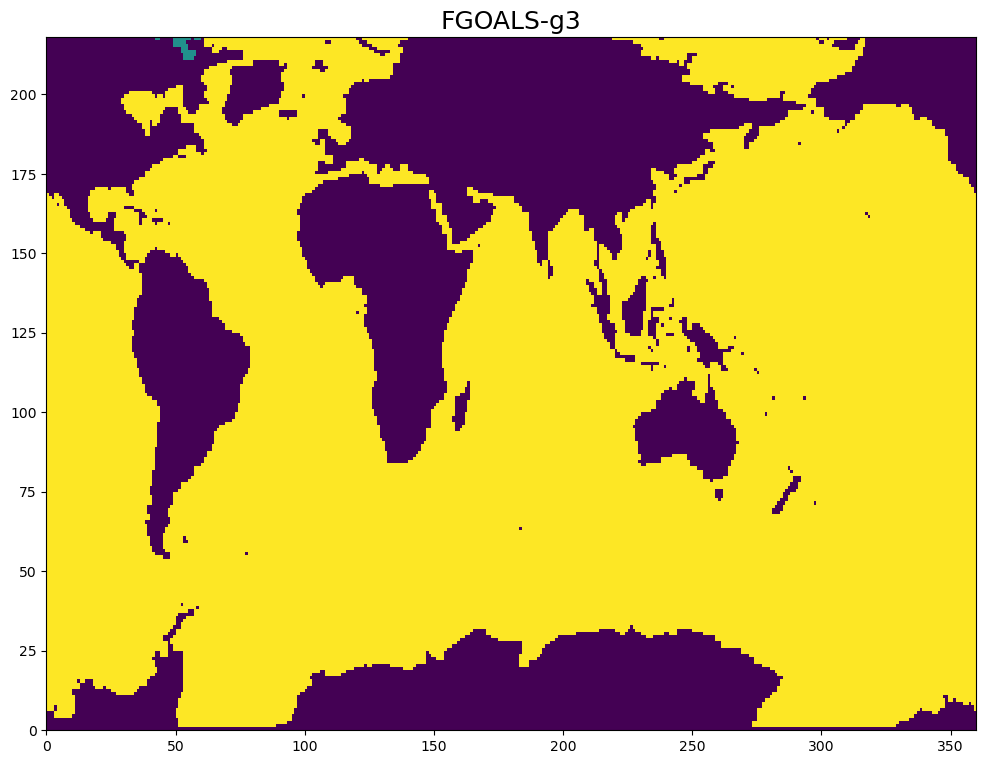

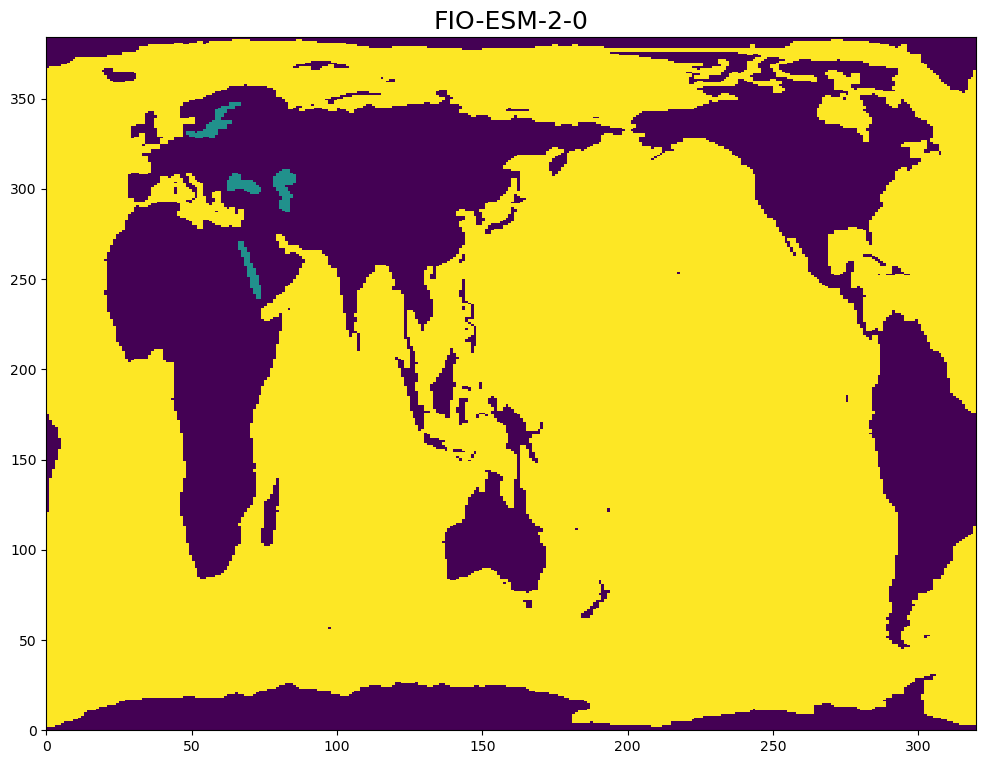

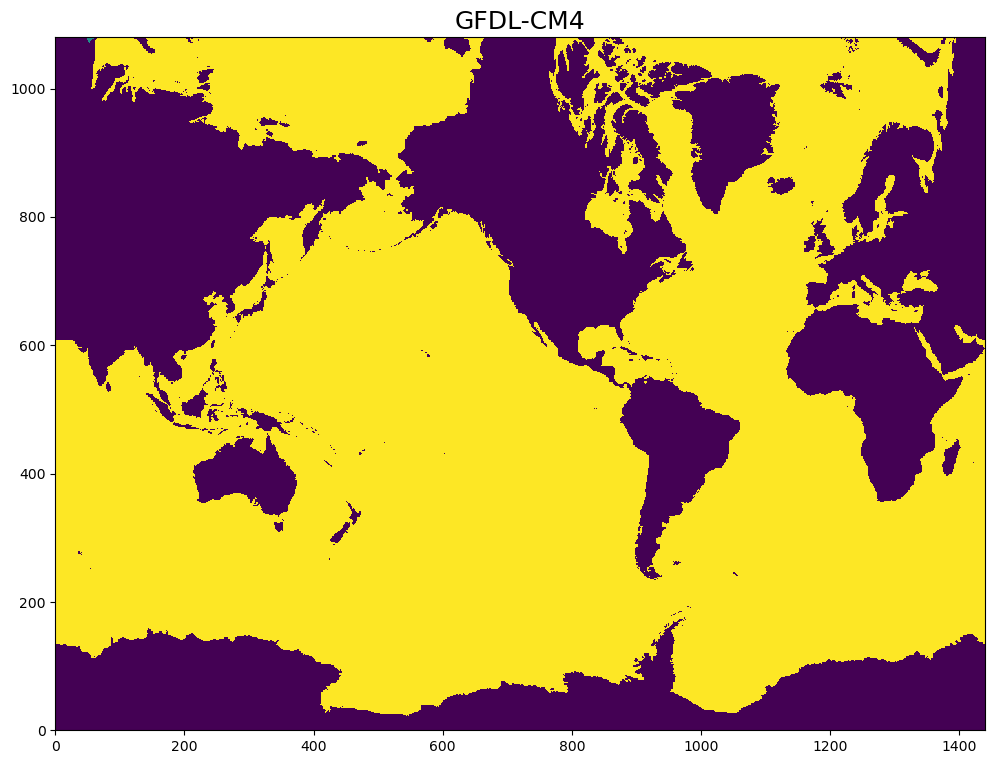

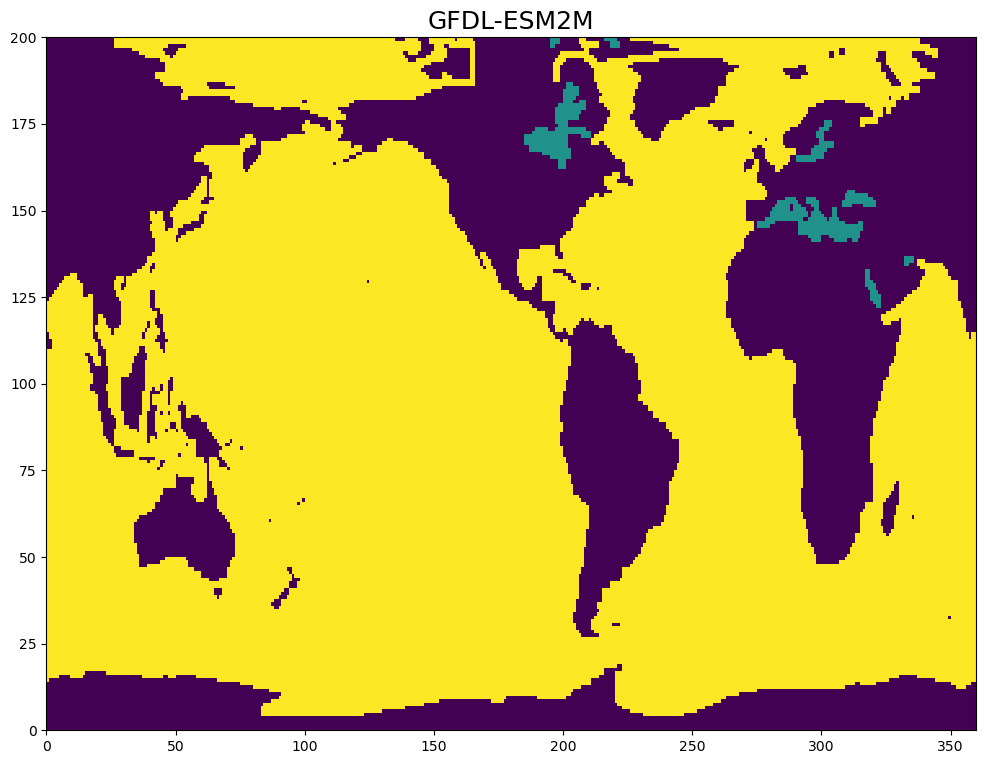

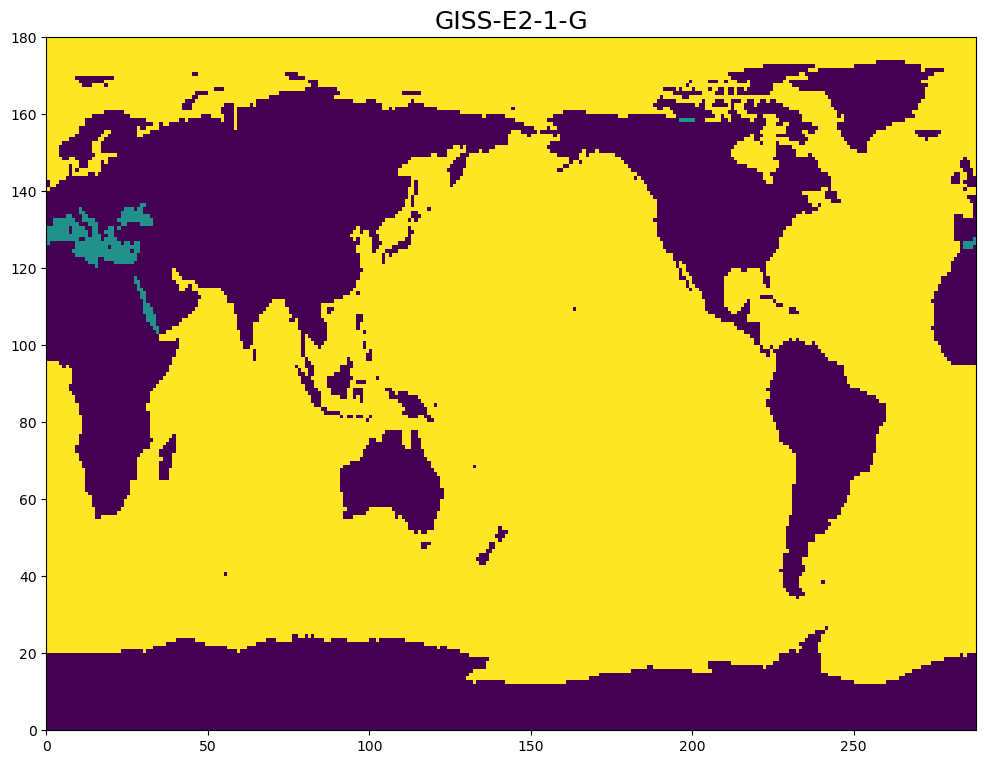

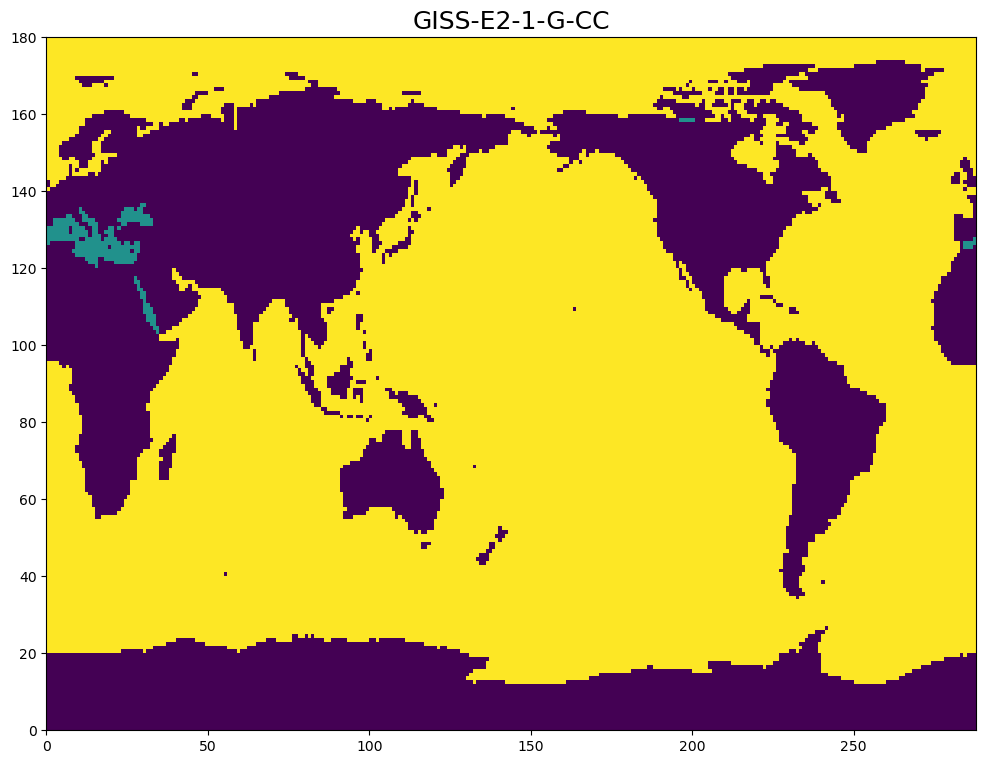

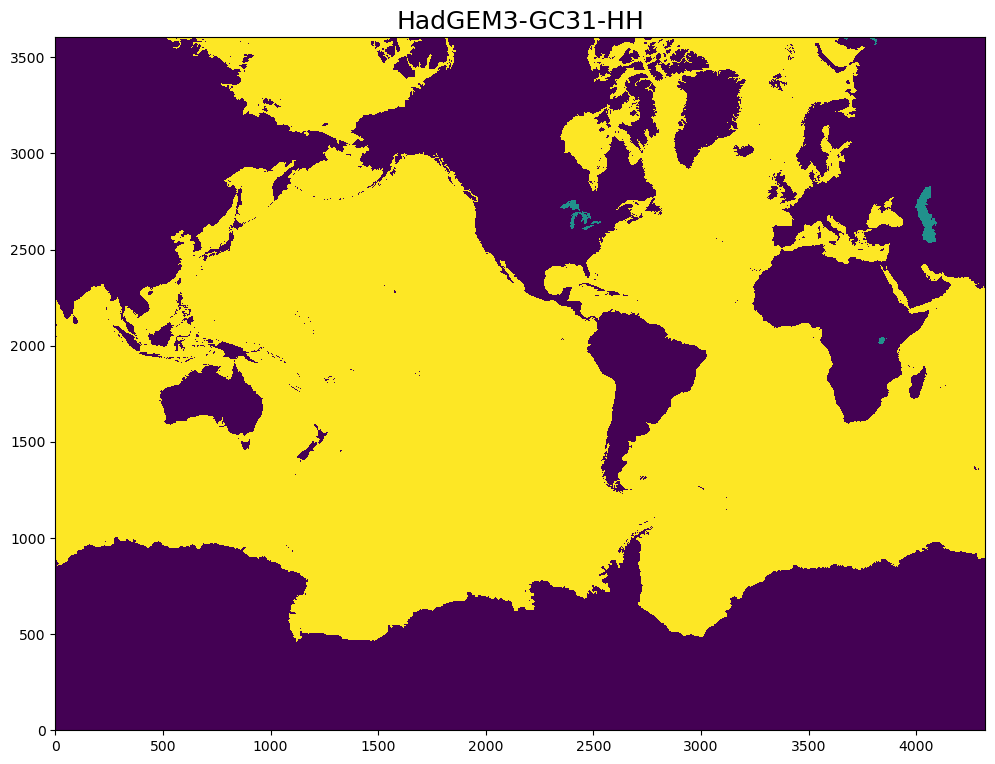

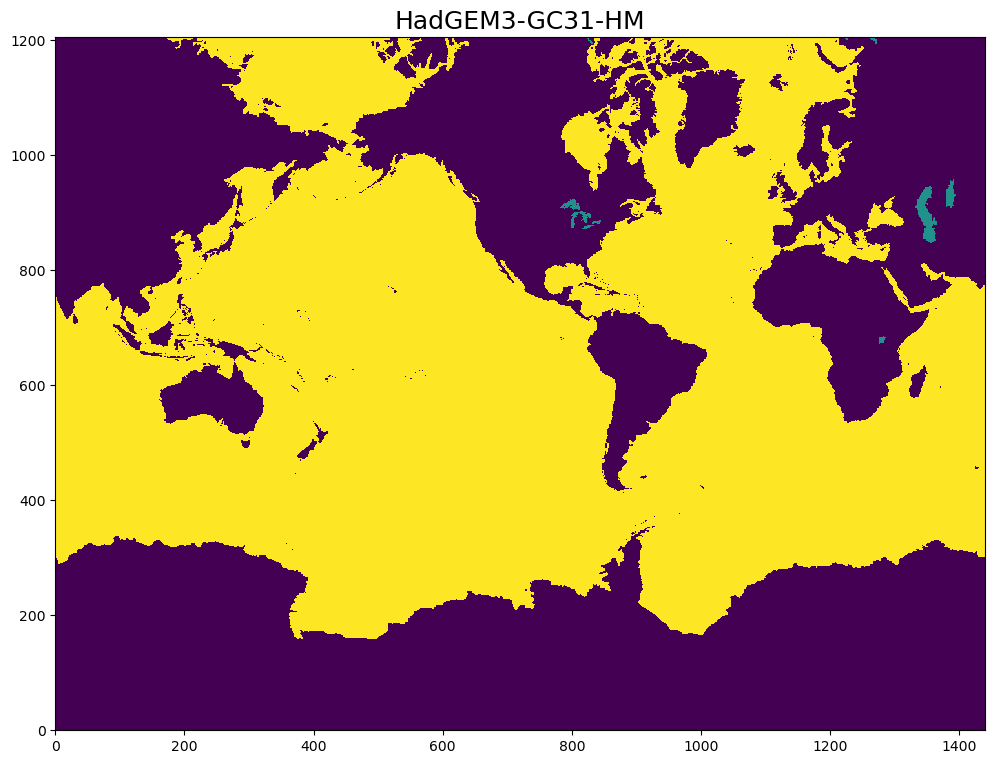

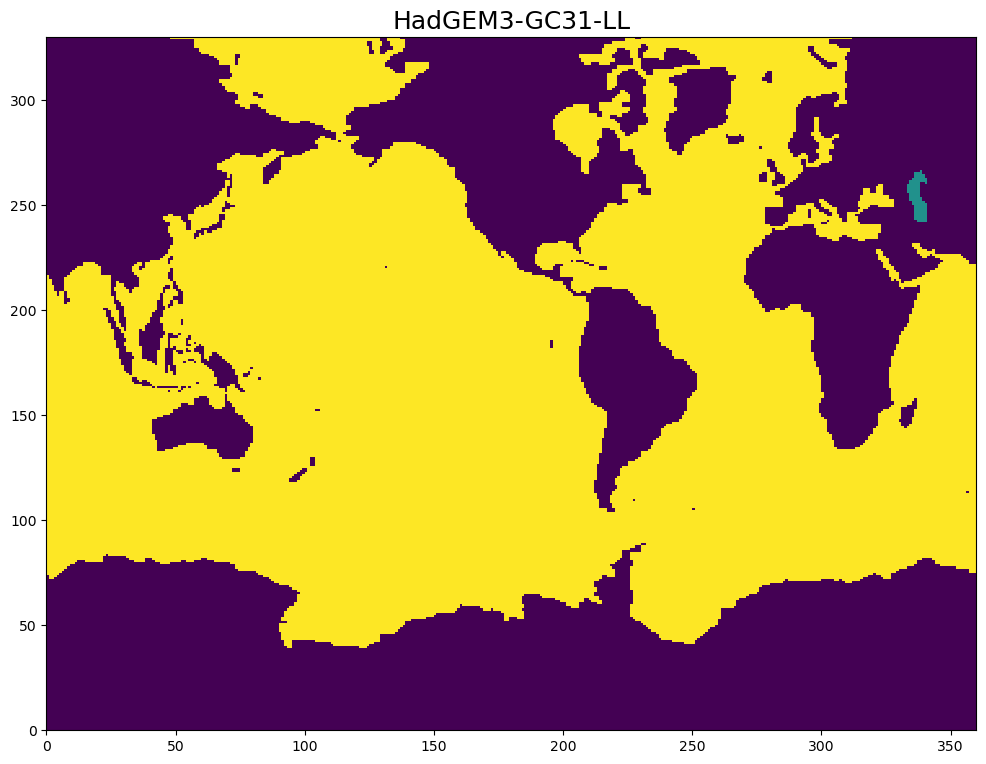

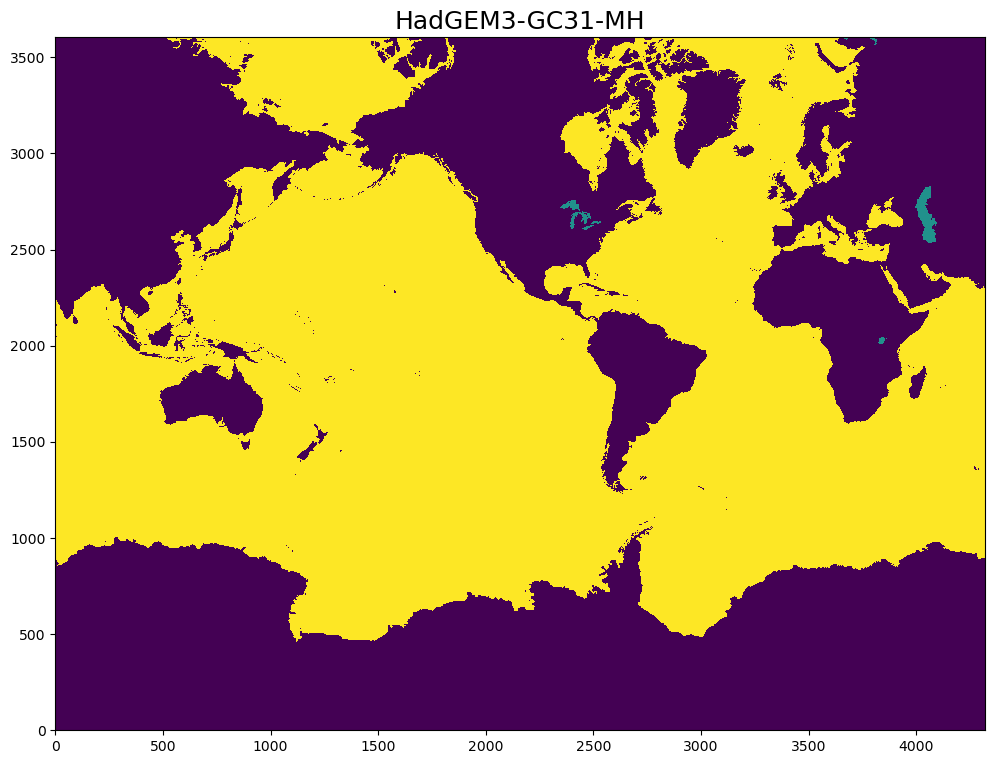

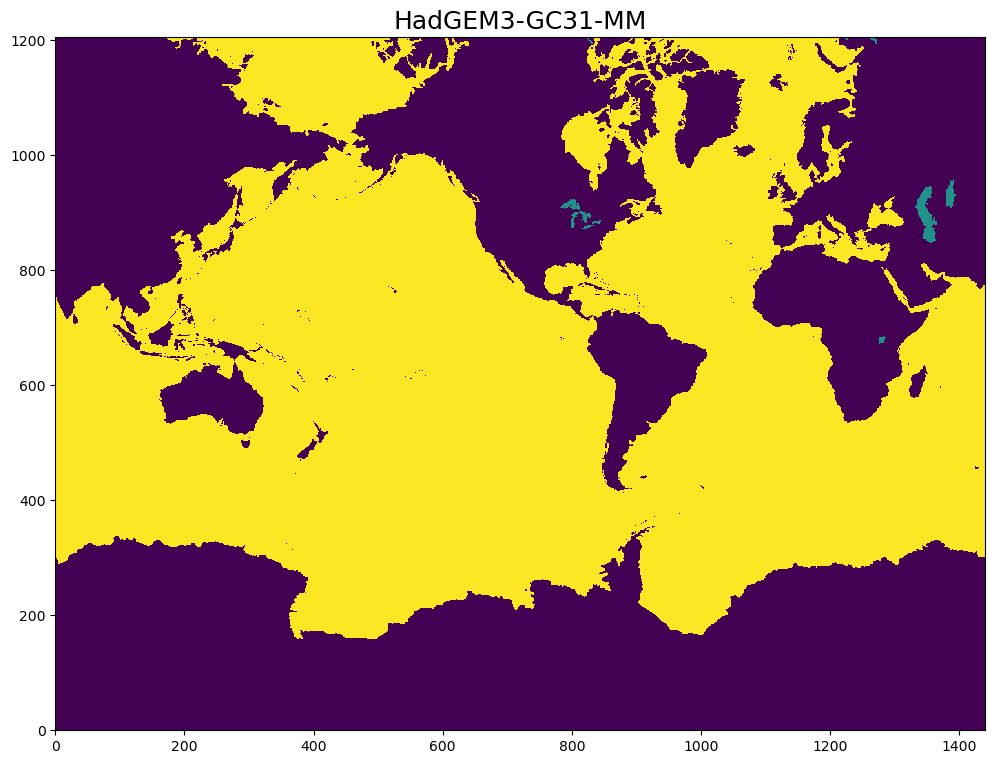

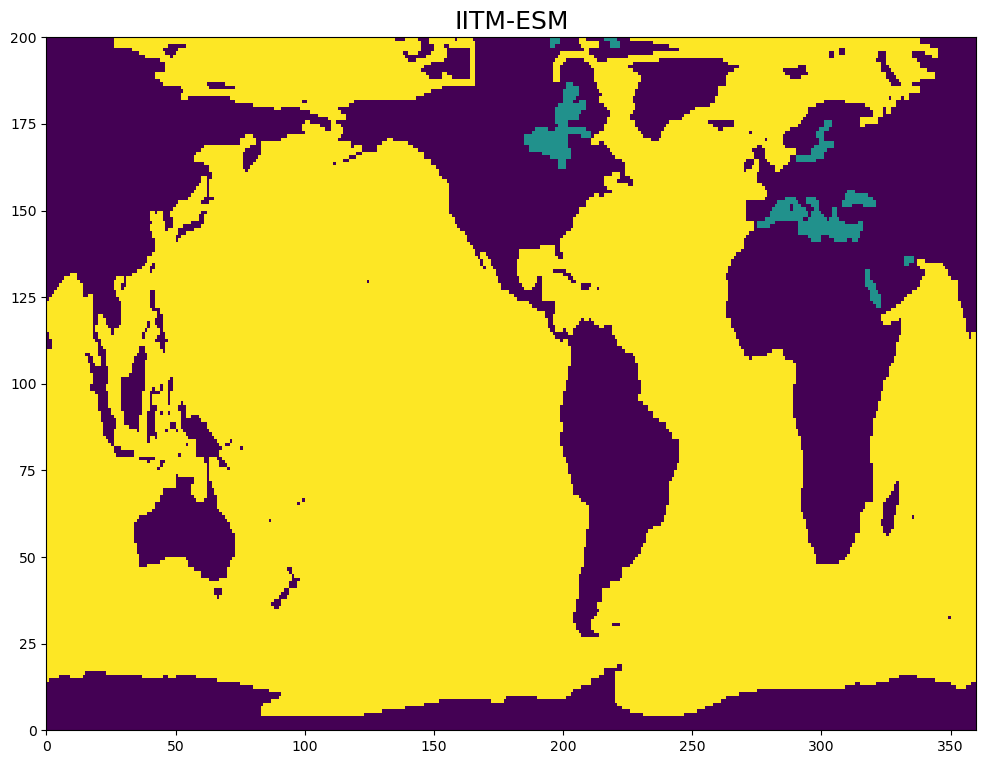

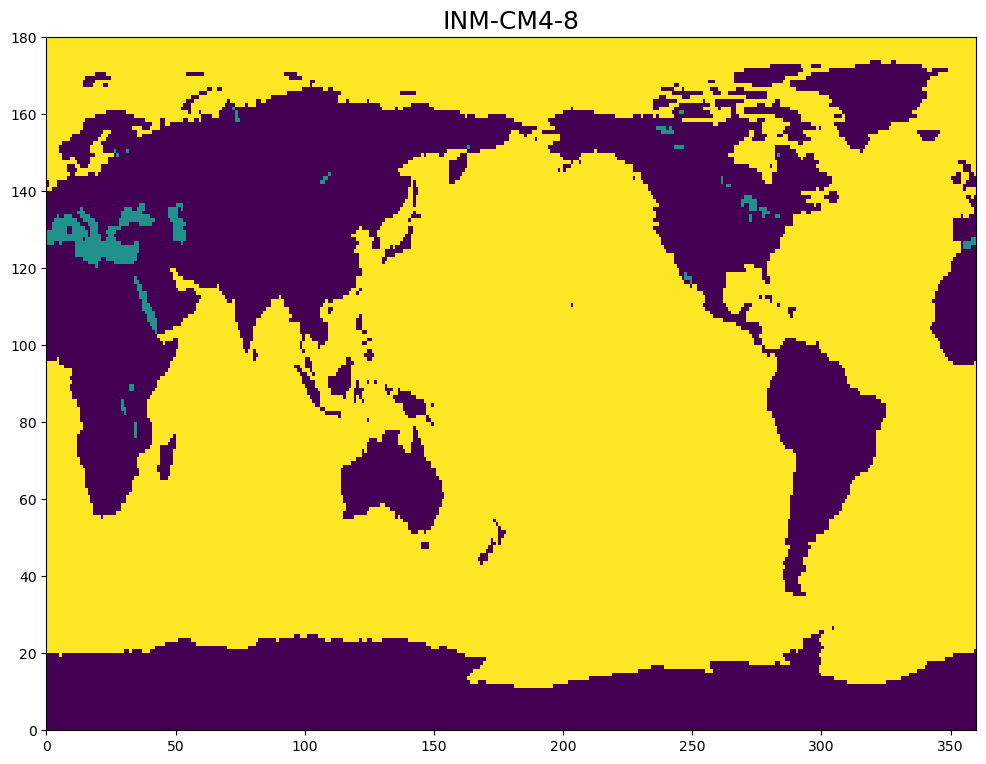

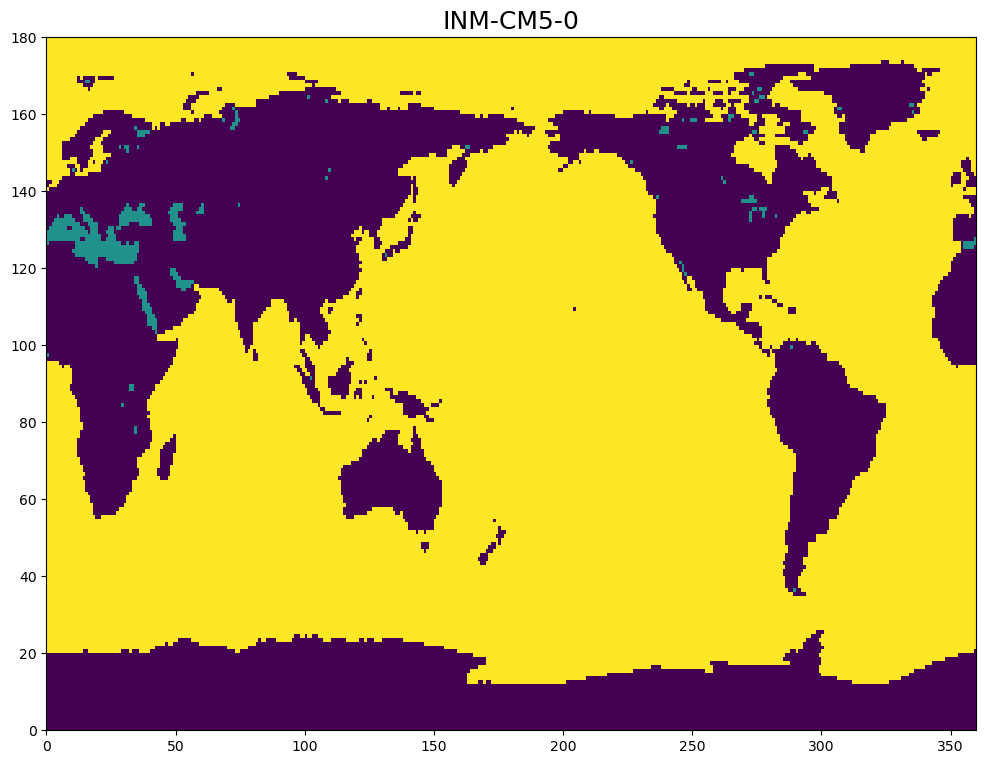

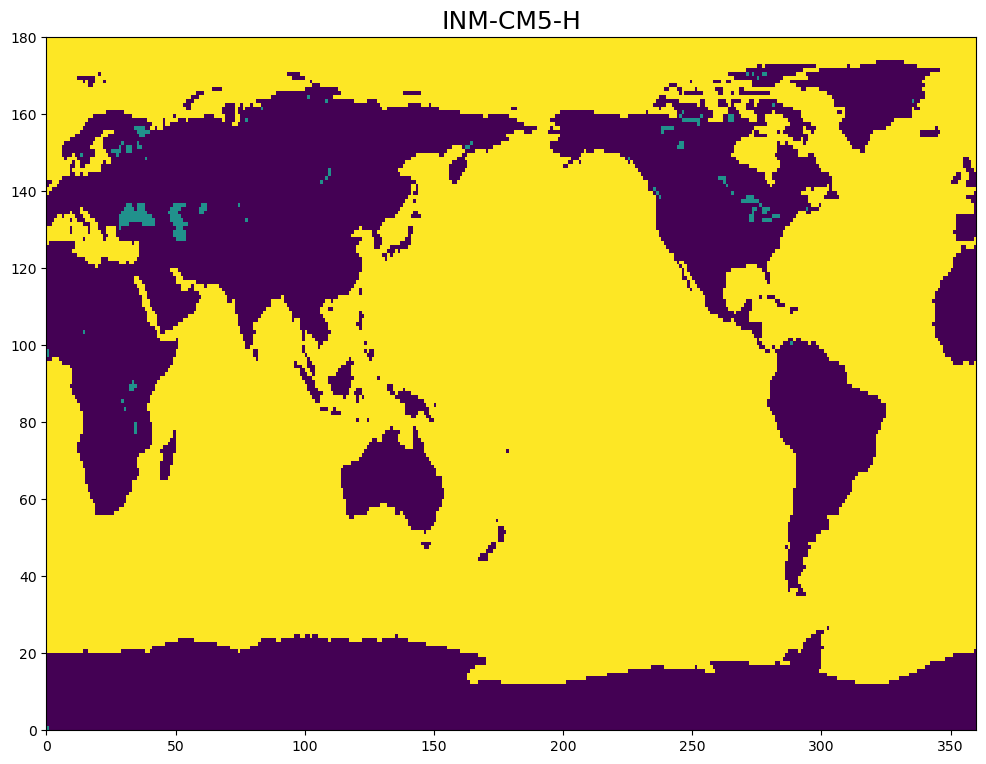

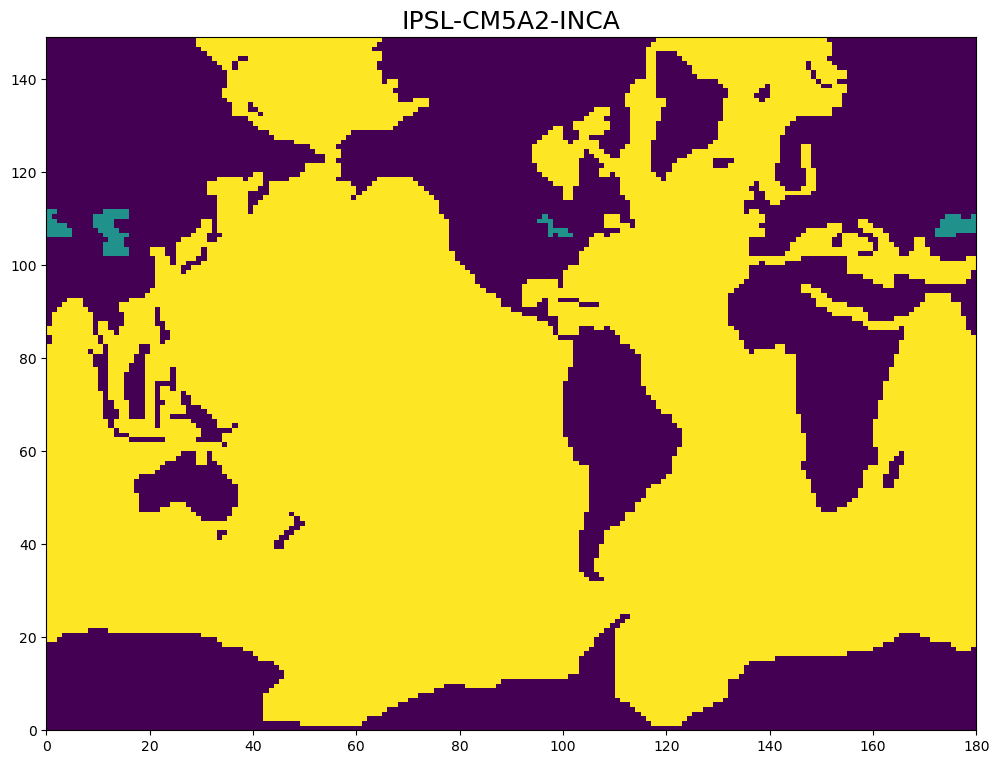

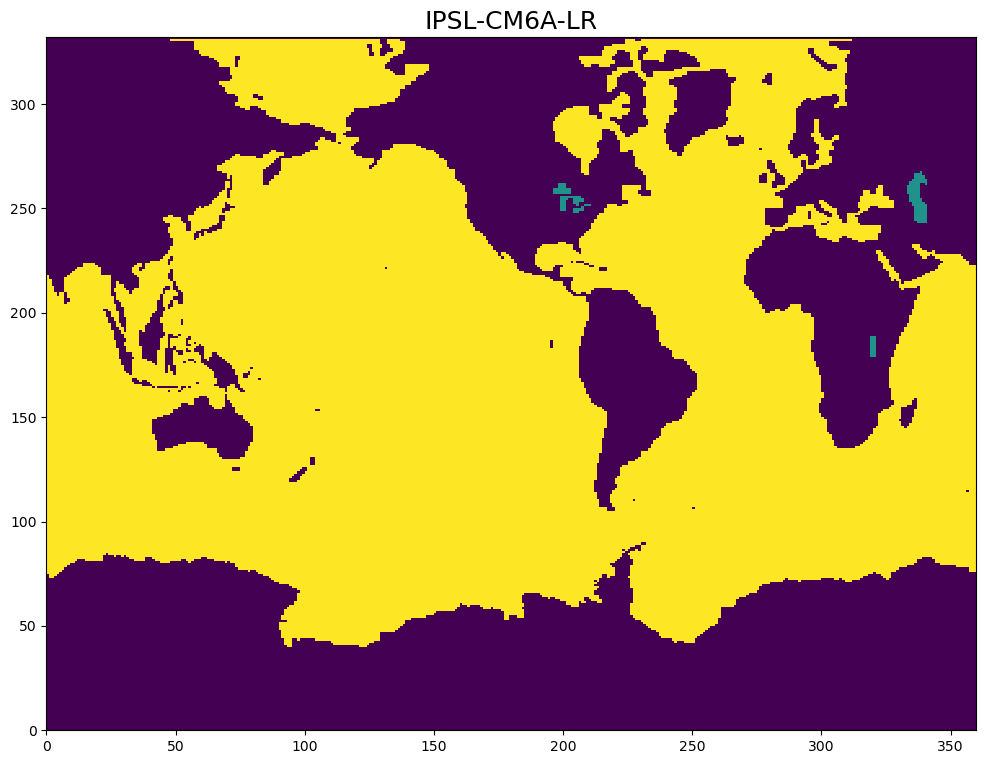

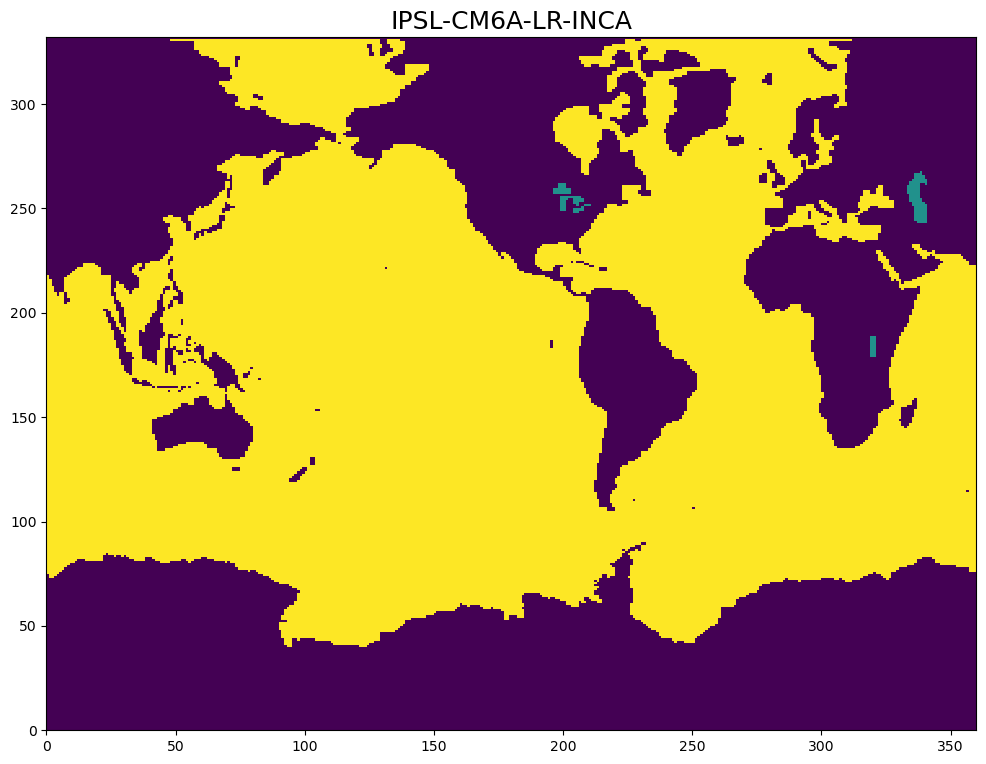

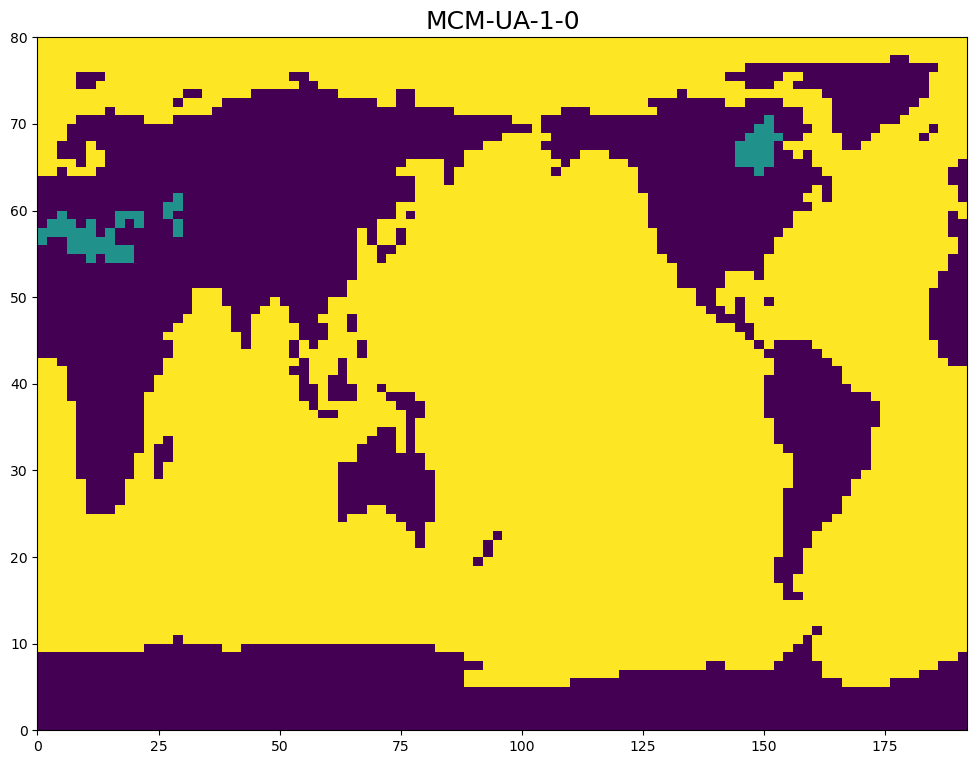

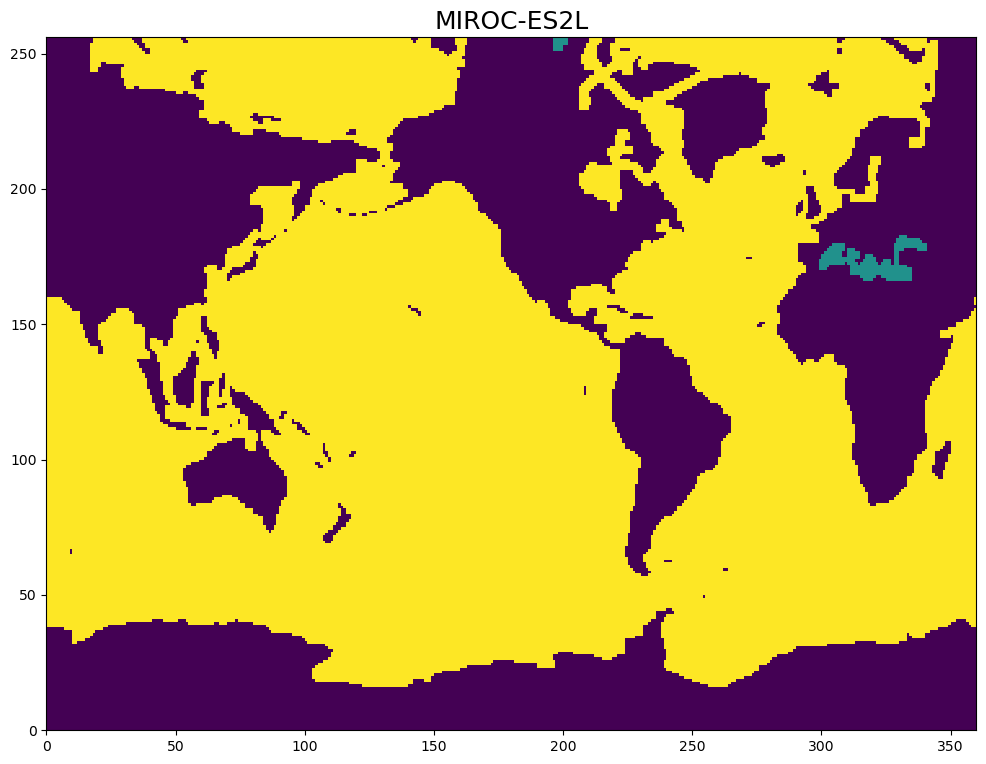

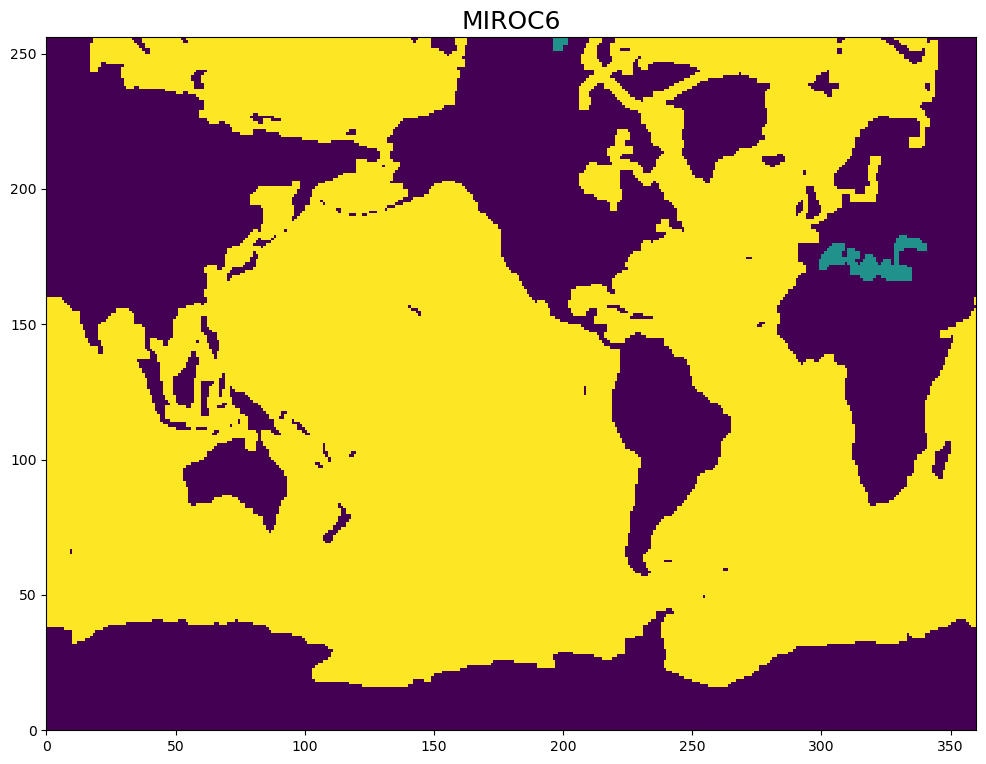

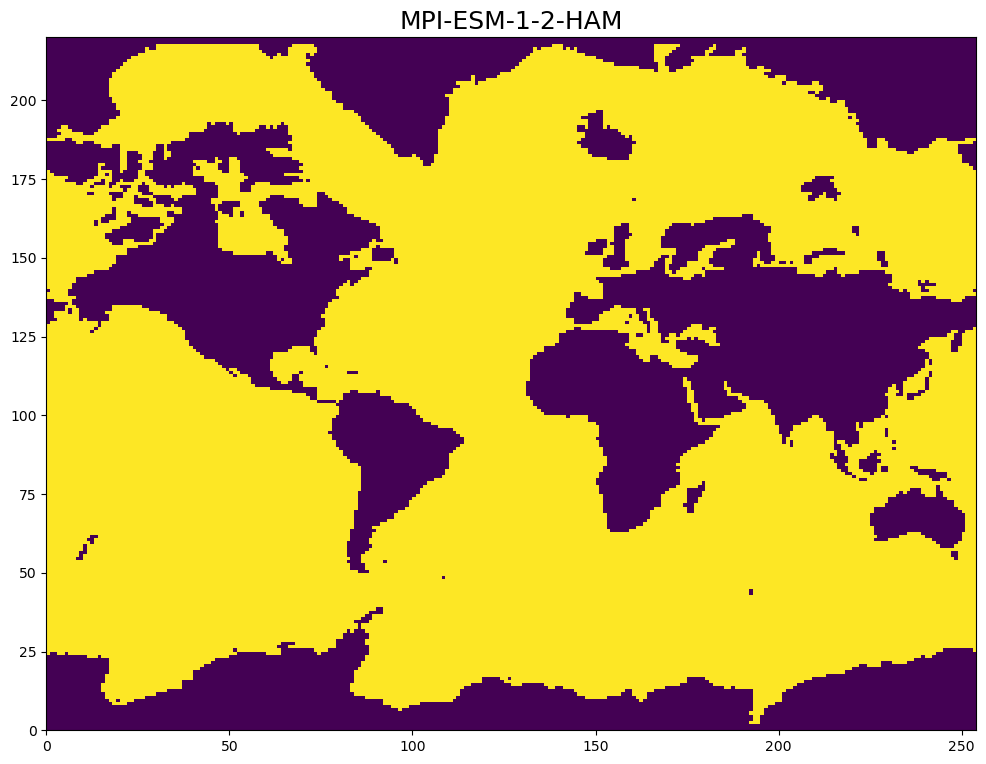

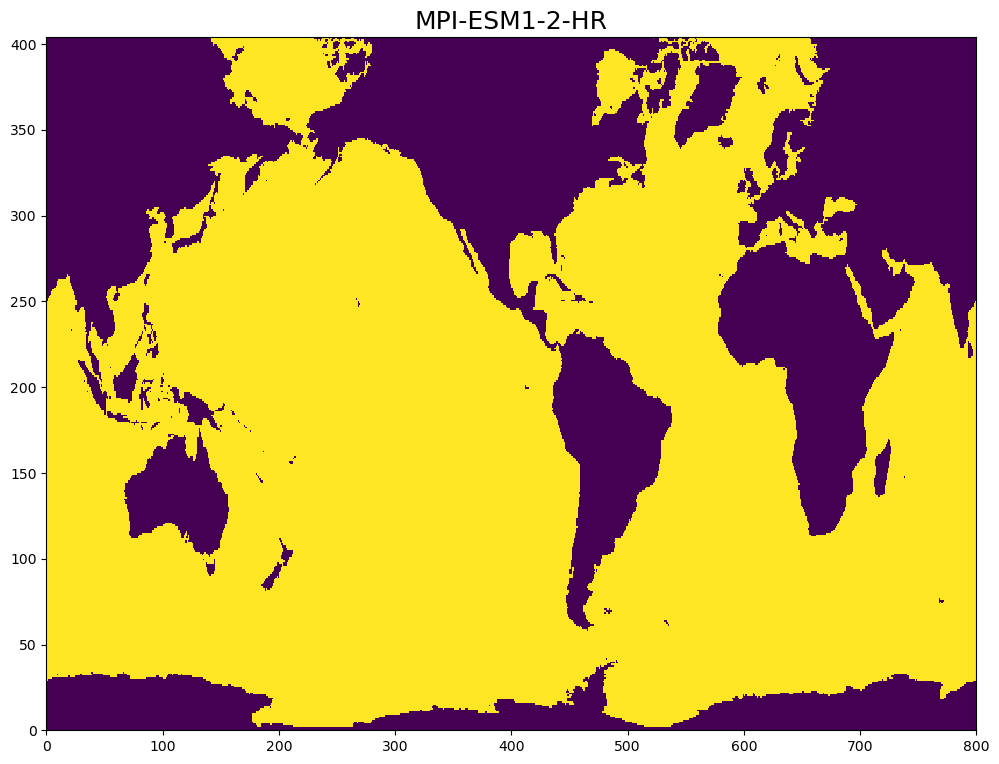

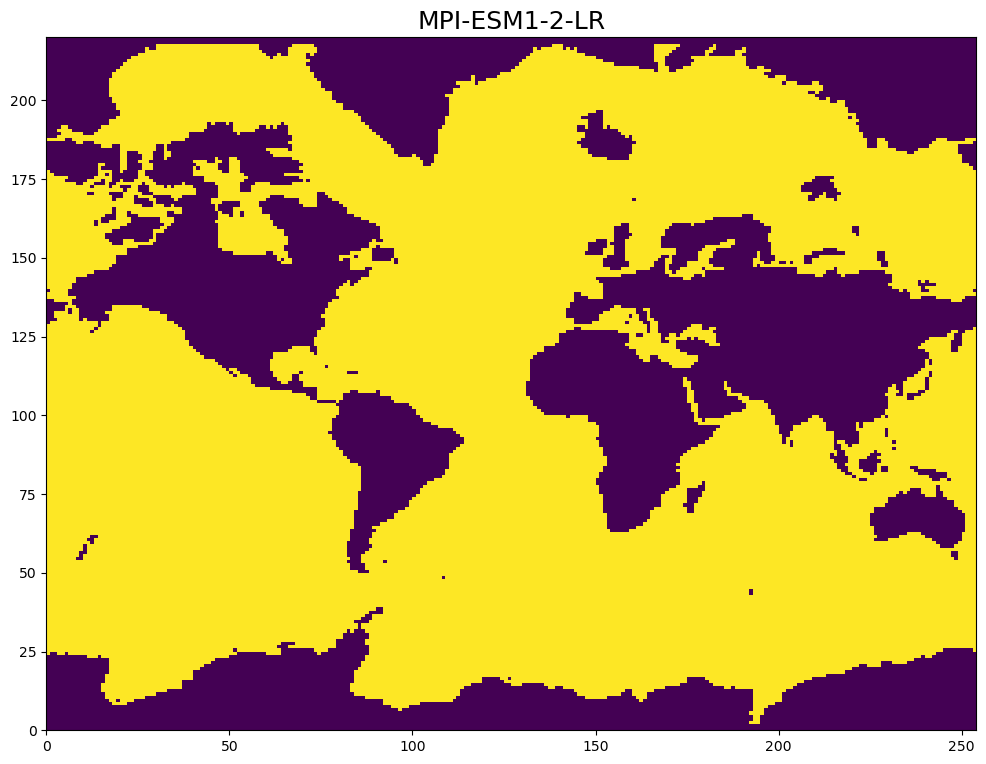

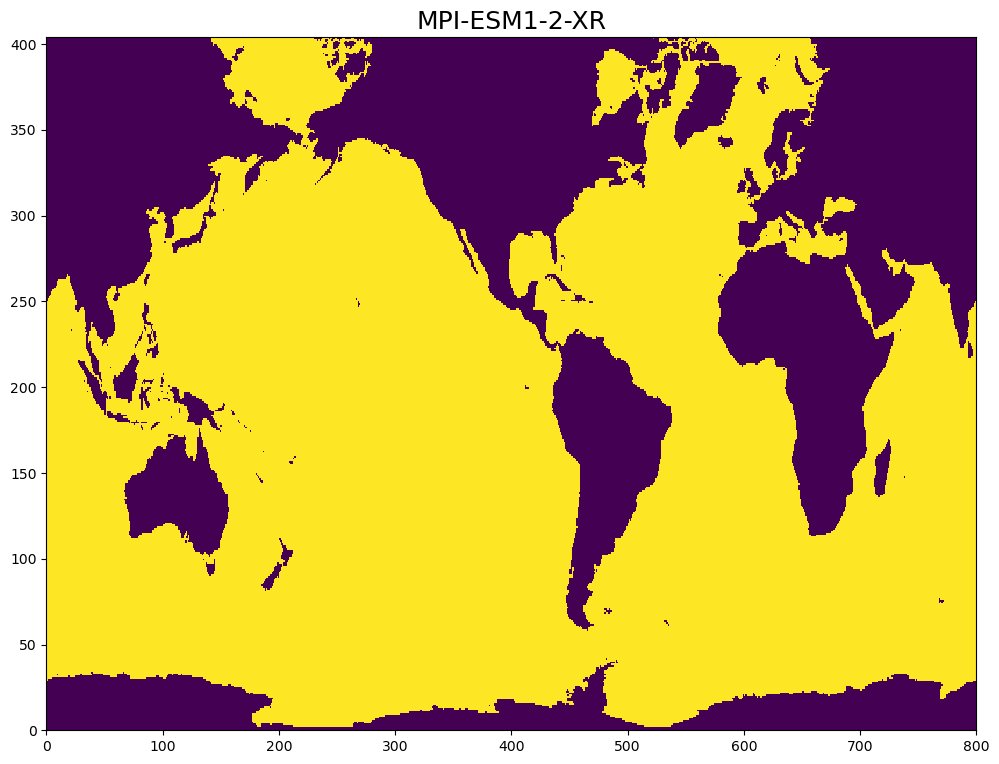

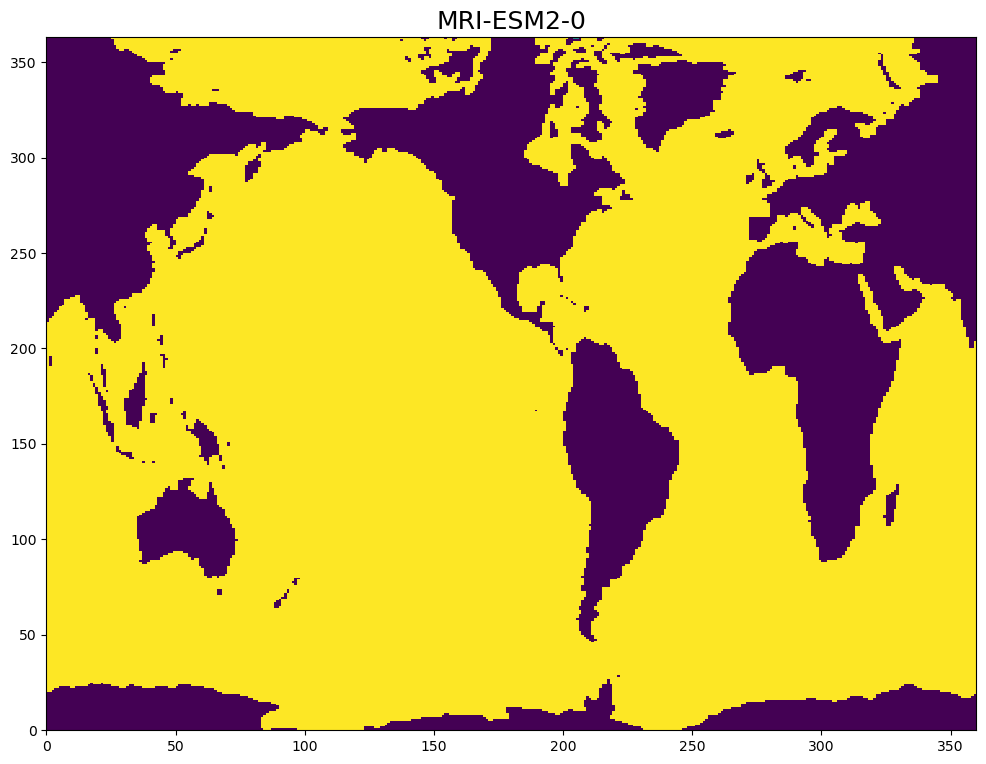

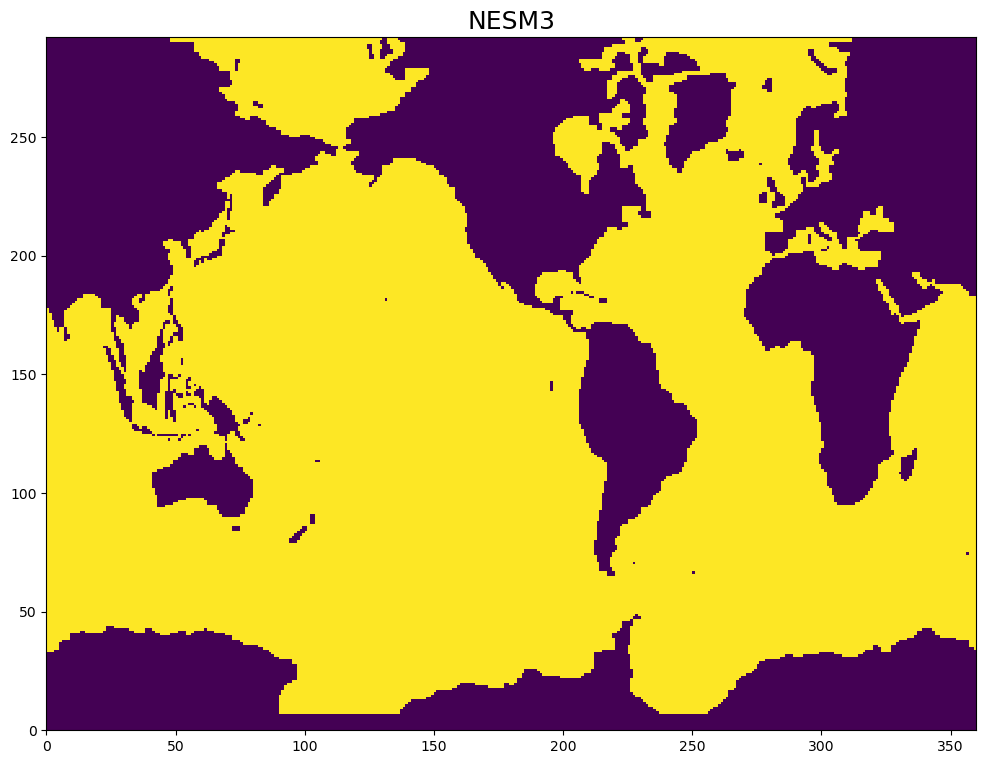

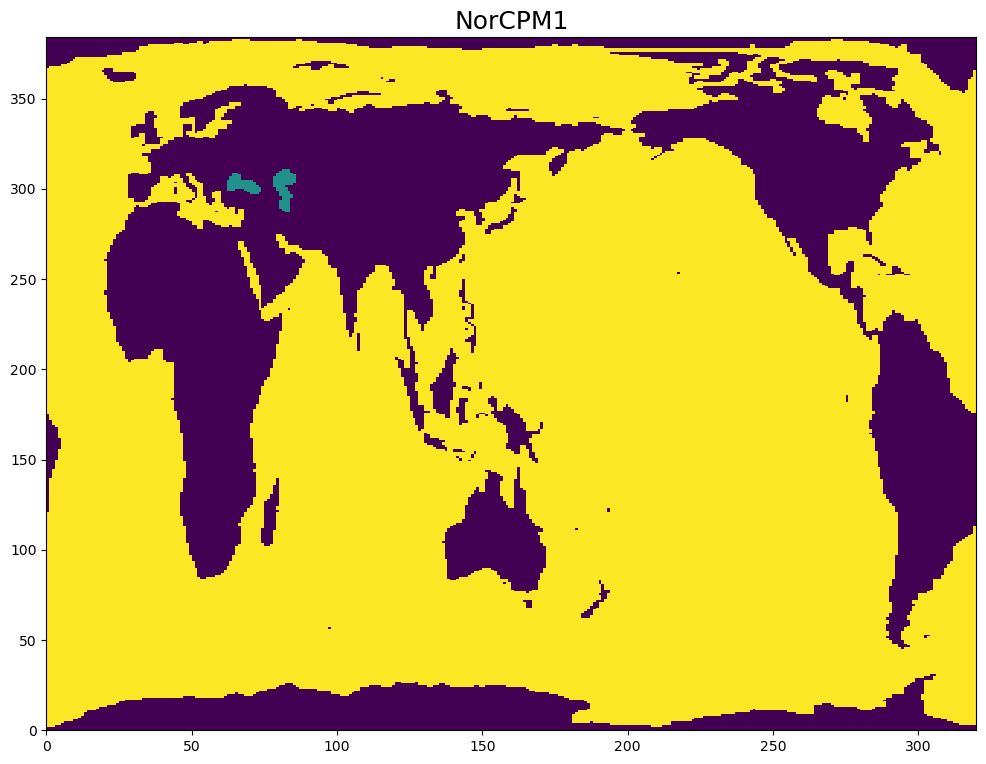

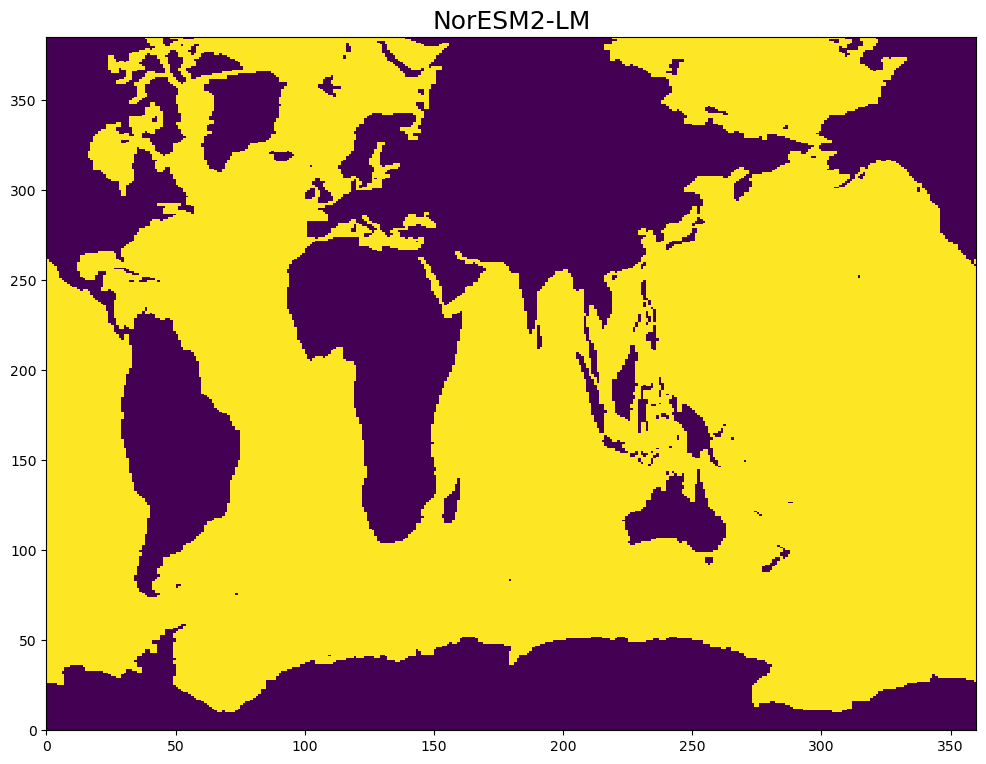

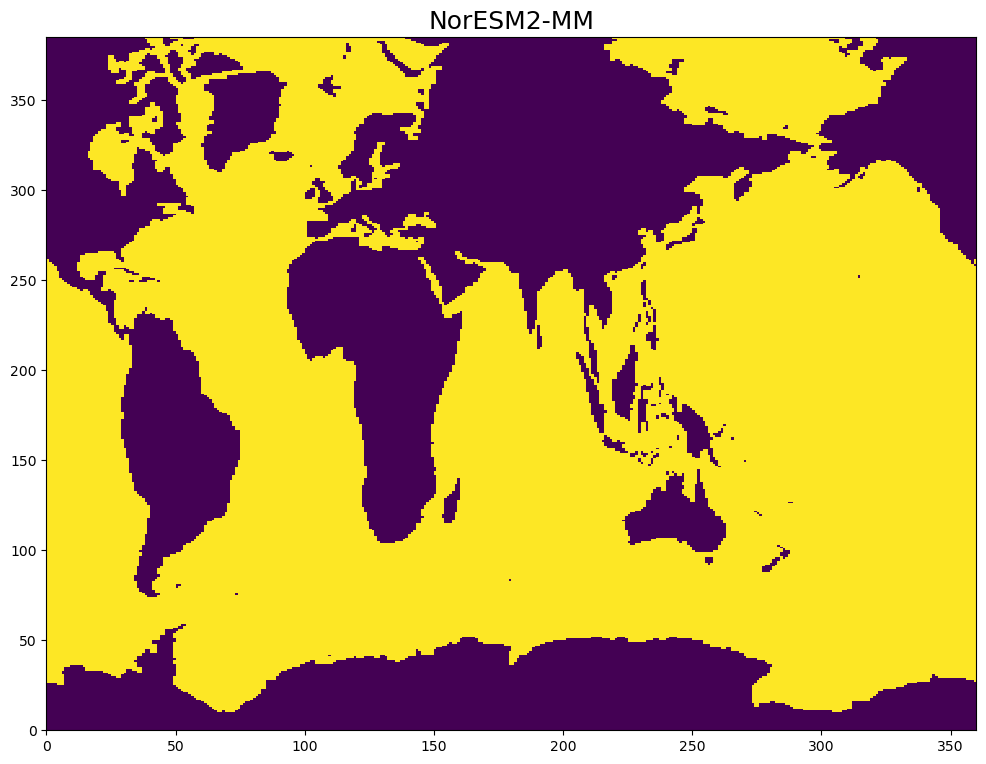

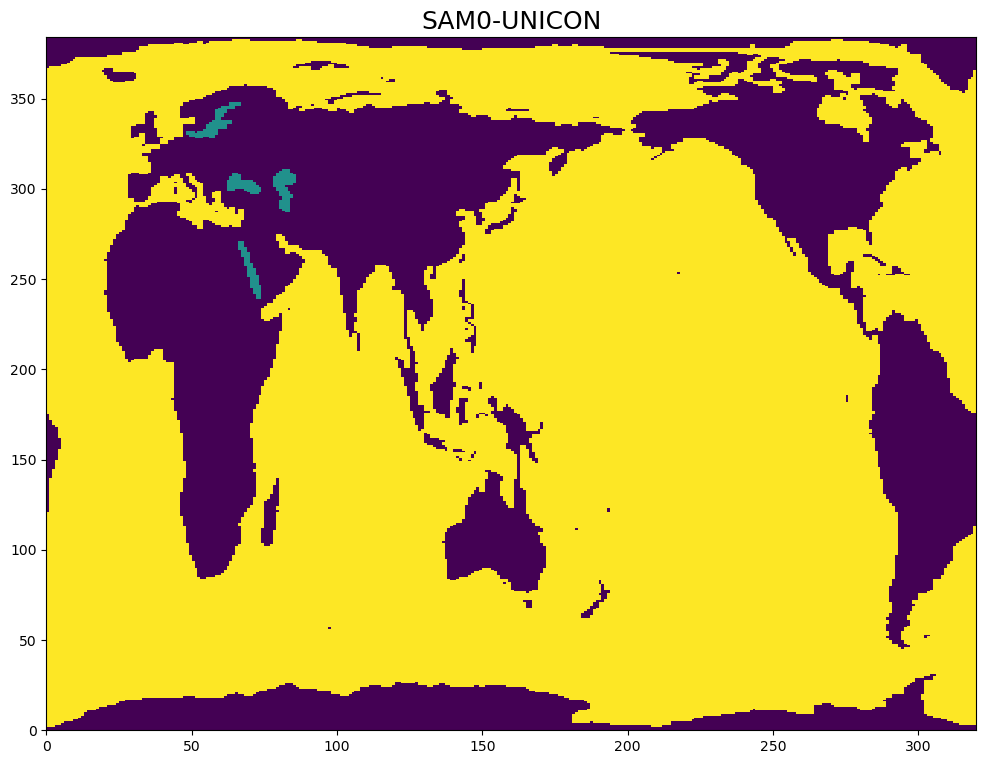

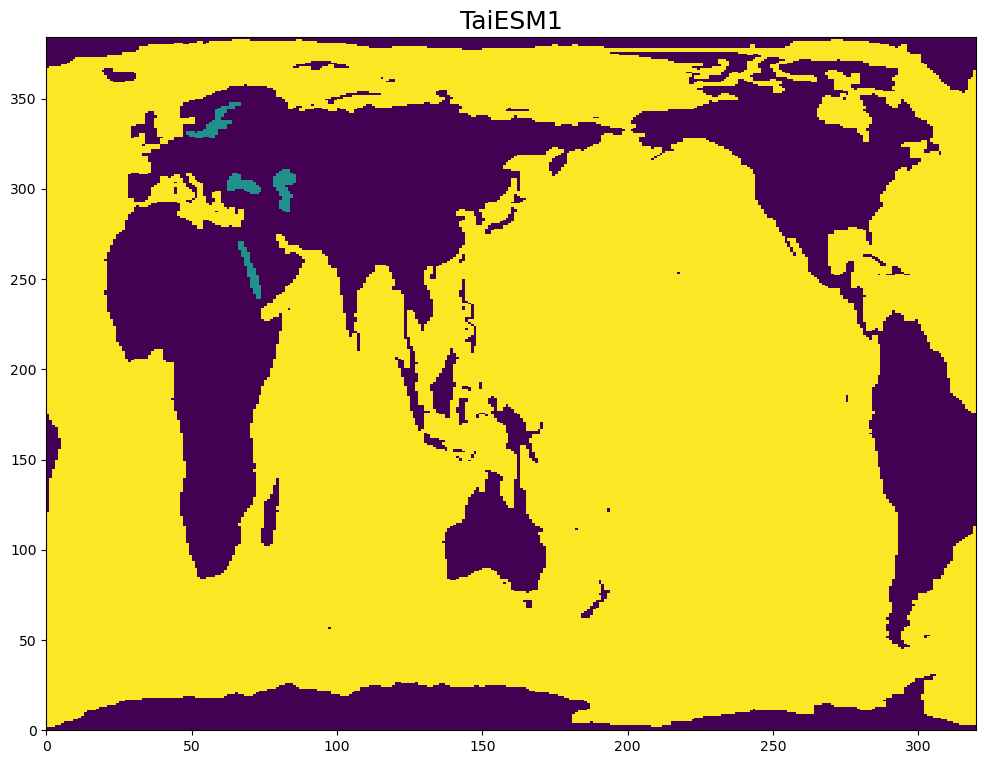

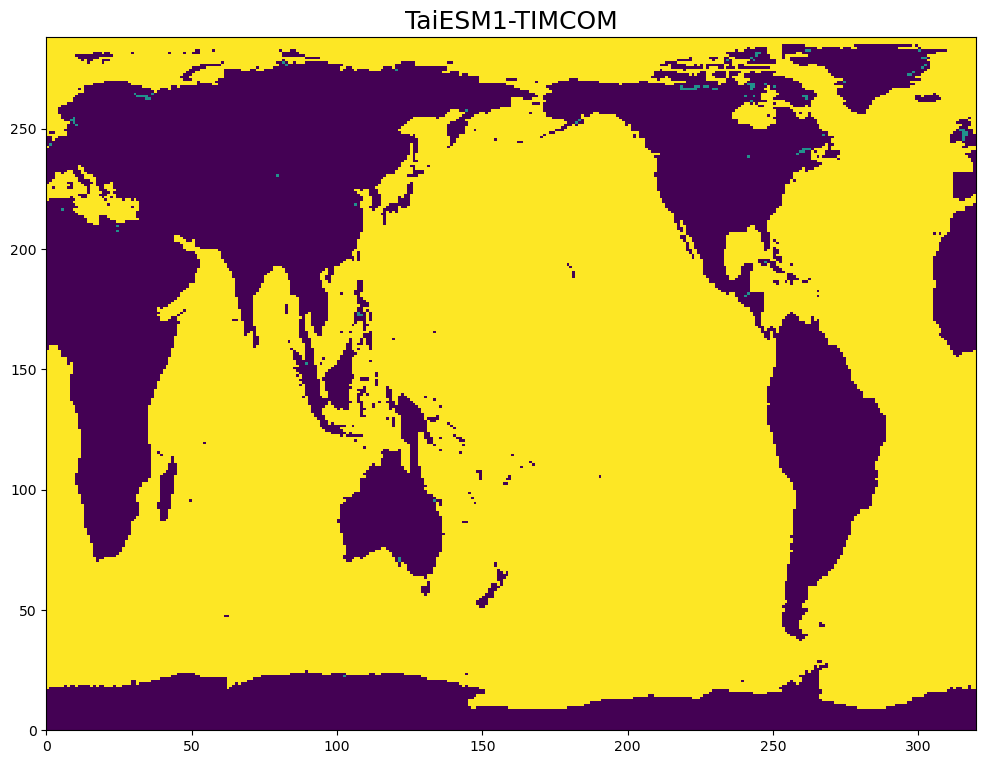

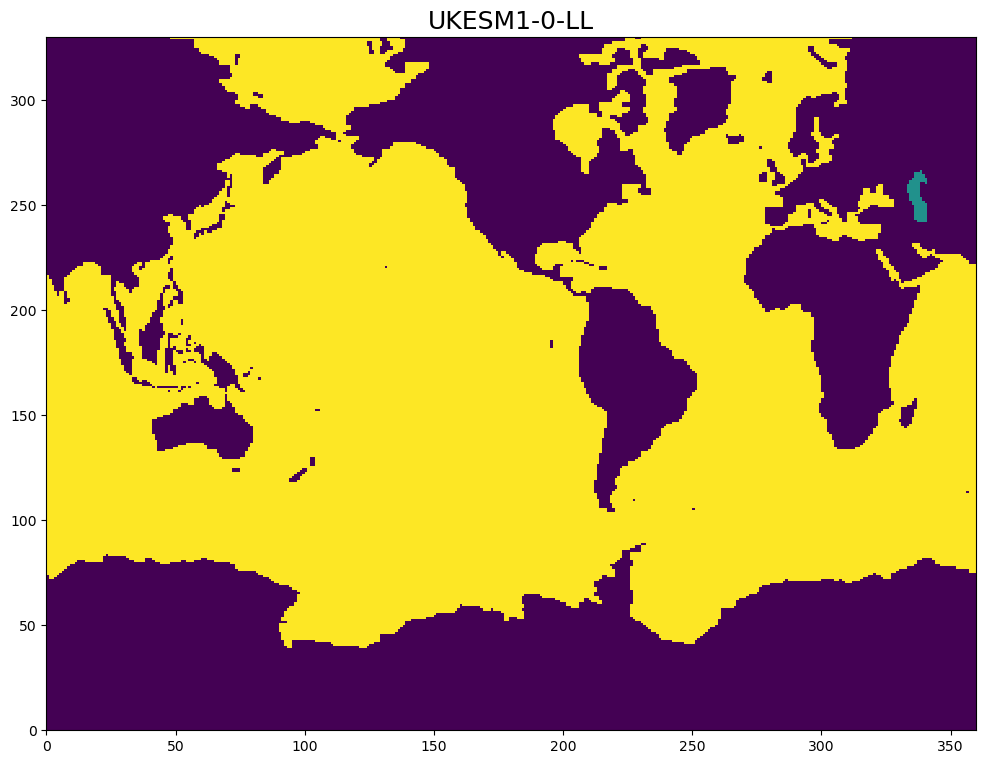

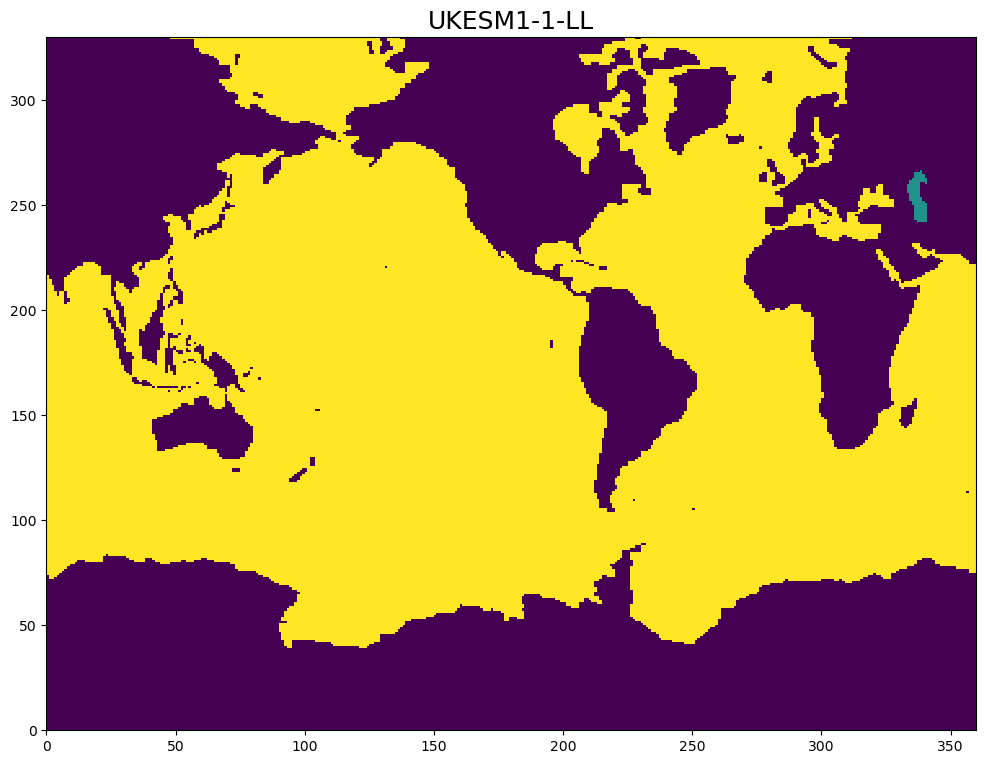

In [5]:
# Compute connected basins if not included:
for mm in range(0,nm):
    Model = Clist[Models[mm]]
    basins = ('/gws/pw/j07/wishbone/jmecki/CMIP' + str(cmip) + '/basins/' + Model.name + '_basins.nc')
    
    # Compute only if basins file already exists and connected not yet computed:
    if os.path.isfile(basins):
        if not check_var(basins,'Connected'):
            print('Computing Connected for ' + Model.name)

            ncid  = Dataset(basins,'r')
            dims  = ncid.variables['Tmask'].get_dims()
            lon   = ncid.variables['lon'][:,:]
            lat   = ncid.variables['lat'][:,:]
            tmask = ncid.variables['Tmask'][:,:]
            ncid.close()
    
            # Starting point in Atlantic:
            inds = np.unravel_index(np.argmin(np.abs(lat-50)+np.abs(lon+40)),np.shape(lon))
            sty = inds[0]
            stx = inds[1]

            connected = copy.deepcopy(tmask)
            find_points(connected,sty,stx)

            ncid = Dataset(basins,'a')
            ncid.createVariable('Connected','f8',(dims[0].name,dims[1].name,))
            ncid.variables['Connected'][:,:] = connected
            ncid.close()
            
            plt.figure(figsize=(12,9))
            plt.pcolormesh(tmask+connected)
            plt.plot(stx,sty,marker='o')
            plt.title(Model.name,fontsize=18)
        else:
            print('Connected already Computed for ' + Model.name)

            ncid = Dataset(basins,'r')
            tmask     = ncid.variables['Tmask'][:,:]
            connected = ncid.variables['Connected'][:,:]
            ncid.close()
            
            plt.figure(figsize=(12,9))
            plt.pcolormesh(tmask+connected)
            plt.title(Model.name,fontsize=18)

In [6]:
# Compute Black Sea if not Computed:
for mm in range(0,nm):
    Model = Clist[Models[mm]]
    basins = ('/gws/pw/j07/wishbone/jmecki/CMIP' + str(cmip) + '/basins/' + Model.name + '_basins.nc')
    
    # Compute only if basins file already exists and connected not yet computed:
    if os.path.isfile(basins):
        if not check_var(basins,'BlackSea'):
            print('Computing Black Sea for ' + Model.name)

            ncid  = Dataset(basins,'r')
            dims  = ncid.variables['Tmask'].get_dims()
            lon   = ncid.variables['lon'][:,:]
            lat   = ncid.variables['lat'][:,:]
            tmask = ncid.variables['Tmask'][:,:]
            ncid.close()
    
            blackSea = copy.deepcopy(tmask)

            # Define Black Sea Region:
            blackSea[np.where(((lat < 41) | (lat > 48)) | ((lon < 22) | (lon > 45)))] = 0

            ncid = Dataset(basins,'a')
            ncid.createVariable('BlackSea','f8',(dims[0].name,dims[1].name,))
            ncid.variables['BlackSea'][:,:] = blackSea
            ncid.close()
            
            plt.figure(figsize=(12,9))
            plt.pcolormesh(tmask+blackSea,vmin=0,vmax=2)
            plt.title(Model.name,fontsize=18)
        else:
            print('Black Sea already Computed for ' + Model.name)

            #ncid = Dataset(basins,'r')
            #tmask     = ncid.variables['Tmask'][:,:]
            #blackSea = ncid.variables['BlackSea'][:,:]
            #ncid.close()
            
            #plt.figure(figsize=(12,9))
            #plt.pcolormesh(tmask+blackSea,vmin=0,vmax=2)
            #plt.title(Model.name,fontsize=18)

Black Sea already Computed for ACCESS-CM2
Black Sea already Computed for ACCESS-ESM1-5
Black Sea already Computed for ACCESS-OM2
Black Sea already Computed for ACCESS-OM2-025
Black Sea already Computed for BCC-CSM2-HR
Black Sea already Computed for BCC-CSM2-MR
Black Sea already Computed for BCC-ESM1
Black Sea already Computed for CAMS-CSM1-0
Black Sea already Computed for CAS-ESM2-0
Black Sea already Computed for CESM1-CAM5-SE-LR
Black Sea already Computed for CESM2
Black Sea already Computed for CESM2-FV2
Black Sea already Computed for CESM2-WACCM
Black Sea already Computed for CESM2-WACCM-FV2
Black Sea already Computed for CIESM
Black Sea already Computed for CMCC-CM2-HR4
Black Sea already Computed for CMCC-CM2-SR5
Black Sea already Computed for CMCC-CM2-VHR4
Black Sea already Computed for CMCC-ESM2
Black Sea already Computed for CNRM-CM6-1
Black Sea already Computed for CNRM-CM6-1-HR
Black Sea already Computed for CNRM-ESM2-1
Black Sea already Computed for CanESM5
Black Sea already 

In [7]:
# Compute Mediterranean Sea if not Computed:
for mm in range(0,nm):
    Model = Clist[Models[mm]]
    basins = ('/gws/pw/j07/wishbone/jmecki/CMIP' + str(cmip) + '/basins/' + Model.name + '_basins.nc')
    
    # Compute only if basins file already exists and connected not yet computed:
    if os.path.isfile(basins):
        if not check_var(basins,'MediterraneanSea'):
            print('Computing Mediterranean Sea for ' + Model.name)

            ncid     = Dataset(basins,'r')
            dims     = ncid.variables['Tmask'].get_dims()
            lon      = ncid.variables['lon'][:,:]
            lat      = ncid.variables['lat'][:,:]
            tmask    = ncid.variables['Tmask'][:,:]
            BlackSea = ncid.variables['BlackSea'][:,:]
            ncid.close()
            
            MediterraneanSea = copy.deepcopy(tmask)
            # Remove Black Sea:
            MediterraneanSea = MediterraneanSea - BlackSea

            # Strait of Gilbraltar Boundary:
            ilon = np.argmin(np.abs(lon+5.3),axis=1)
            for kk in range(0,len(ilon)):
                MediterraneanSea[kk,ilon[kk]-1] = 0

            # Starting point in Mediterranean Sea:
            inds = np.unravel_index(np.argmin(np.abs(lat-40)+np.abs(lon-5)),np.shape(lon))
            sty = inds[0]
            stx = inds[1]

            find_points(MediterraneanSea,sty,stx)

            ncid = Dataset(basins,'a')
            ncid.createVariable('MediterraneanSea','f8',(dims[0].name,dims[1].name,))
            ncid.variables['MediterraneanSea'][:,:] = MediterraneanSea
            ncid.close()
            
            plt.figure(figsize=(12,9))
            plt.pcolormesh(tmask+MediterraneanSea,vmin=0,vmax=2)
            plt.plot(stx,sty,marker='o')
            plt.title(Model.name,fontsize=18)
        else:
            print('Mediterranean Sea already Computed for ' + Model.name)

            #ncid = Dataset(basins,'r')
            #tmask            = ncid.variables['Tmask'][:,:]
            #MediterraneanSea = ncid.variables['MediterraneanSea'][:,:]
            #ncid.close()
            
            #plt.figure(figsize=(12,9))
            #plt.pcolormesh(tmask+MediterraneanSea,vmin=0,vmax=2)
            #plt.title(Model.name,fontsize=18)

Mediterranean Sea already Computed for ACCESS-CM2
Mediterranean Sea already Computed for ACCESS-ESM1-5
Mediterranean Sea already Computed for ACCESS-OM2
Mediterranean Sea already Computed for ACCESS-OM2-025
Mediterranean Sea already Computed for BCC-CSM2-HR
Mediterranean Sea already Computed for BCC-CSM2-MR
Mediterranean Sea already Computed for BCC-ESM1
Mediterranean Sea already Computed for CAMS-CSM1-0
Mediterranean Sea already Computed for CAS-ESM2-0
Mediterranean Sea already Computed for CESM1-CAM5-SE-LR
Mediterranean Sea already Computed for CESM2
Mediterranean Sea already Computed for CESM2-FV2
Mediterranean Sea already Computed for CESM2-WACCM
Mediterranean Sea already Computed for CESM2-WACCM-FV2
Mediterranean Sea already Computed for CIESM
Mediterranean Sea already Computed for CMCC-CM2-HR4
Mediterranean Sea already Computed for CMCC-CM2-SR5
Mediterranean Sea already Computed for CMCC-CM2-VHR4
Mediterranean Sea already Computed for CMCC-ESM2
Mediterranean Sea already Computed 

In [8]:
# Compute Baltic Sea if not Computed:
for mm in range(0,nm):
    Model = Clist[Models[mm]]
    basins = ('/gws/pw/j07/wishbone/jmecki/CMIP' + str(cmip) + '/basins/' + Model.name + '_basins.nc')
    
    # Compute only if basins file already exists and connected not yet computed:
    if os.path.isfile(basins):
        if not check_var(basins,'BalticSea'):
            print('Computing Baltic Sea for ' + Model.name)

            ncid     = Dataset(basins,'r')
            dims     = ncid.variables['Tmask'].get_dims()
            lon      = ncid.variables['lon'][:,:]
            lat      = ncid.variables['lat'][:,:]
            tmask    = ncid.variables['Tmask'][:,:]
            ncid.close()
            
            BalticSea = copy.deepcopy(tmask)
            
            # Starting point in Baltic Sea:
            inds = np.unravel_index(np.argmin(np.abs(lat-58.6)+np.abs(lon-19.8)),np.shape(lon))
            sty = inds[0]
            stx = inds[1]

            # Don't compute for models that don't have Baltic Sea:
            if ((Model.name == 'BCC-CSM2-HR') | (Model.name == 'CAS-ESM2-0')     | (Model.name == 'FGOALS-f3-L') |
                (Model.name == 'FGOALS-g3')   | (Model.name == 'TaiESM1-TIMCOM') | (Model.name == 'CanCM4')      |
                (Model.name == 'CanESM2')     | (Model.name == 'FGOALS-g2')      | (Model.name == 'FGOALS-gl')   |
                (Model.name == 'FGOALS-s2')):
                BalticSea = 0*BalticSea
            else:
                # Skagerrak Boundary:
                ilon = np.argmin(np.abs(lon-10),axis=1)
                for kk in range(0,len(ilon)):
                    BalticSea[kk,ilon[kk]-1] = 0

                find_points(BalticSea,sty,stx)

            ncid = Dataset(basins,'a')
            ncid.createVariable('BalticSea','f8',(dims[0].name,dims[1].name,))
            ncid.variables['BalticSea'][:,:] = BalticSea
            ncid.close()
            
            plt.figure(figsize=(12,9))
            plt.pcolormesh(tmask+BalticSea,vmin=0,vmax=2)
            plt.plot(stx,sty,marker='o')
            plt.title(Model.name,fontsize=18)
        else:
            print('Baltic Sea already Computed for ' + Model.name)

            #ncid = Dataset(basins,'r')
            #tmask            = ncid.variables['Tmask'][:,:]
            #BalticSea        = ncid.variables['BalticSea'][:,:]
            #ncid.close()
            
            #plt.figure(figsize=(12,9))
            #plt.pcolormesh(tmask+BalticSea,vmin=0,vmax=2)
            #plt.title(Model.name,fontsize=18)

Baltic Sea already Computed for ACCESS-CM2
Baltic Sea already Computed for ACCESS-ESM1-5
Baltic Sea already Computed for ACCESS-OM2
Baltic Sea already Computed for ACCESS-OM2-025
Baltic Sea already Computed for BCC-CSM2-HR
Baltic Sea already Computed for BCC-CSM2-MR
Baltic Sea already Computed for BCC-ESM1
Baltic Sea already Computed for CAMS-CSM1-0
Baltic Sea already Computed for CAS-ESM2-0
Baltic Sea already Computed for CESM1-CAM5-SE-LR
Baltic Sea already Computed for CESM2
Baltic Sea already Computed for CESM2-FV2
Baltic Sea already Computed for CESM2-WACCM
Baltic Sea already Computed for CESM2-WACCM-FV2
Baltic Sea already Computed for CIESM
Baltic Sea already Computed for CMCC-CM2-HR4
Baltic Sea already Computed for CMCC-CM2-SR5
Baltic Sea already Computed for CMCC-CM2-VHR4
Baltic Sea already Computed for CMCC-ESM2
Baltic Sea already Computed for CNRM-CM6-1
Baltic Sea already Computed for CNRM-CM6-1-HR
Baltic Sea already Computed for CNRM-ESM2-1
Baltic Sea already Computed for Can

In [9]:
# Compute Hudson Bay if not Computed:
for mm in range(0,nm):
    Model = Clist[Models[mm]]
    basins = ('/gws/pw/j07/wishbone/jmecki/CMIP' + str(cmip) + '/basins/' + Model.name + '_basins.nc')
    
    # Compute only if basins file already exists and connected not yet computed:
    if os.path.isfile(basins):
        if not check_var(basins,'HudsonBay'):
            print('Computing HudsonBay for ' + Model.name)

            ncid     = Dataset(basins,'r')
            dims     = ncid.variables['Tmask'].get_dims()
            lon      = ncid.variables['lon'][:,:]
            lat      = ncid.variables['lat'][:,:]
            tmask    = ncid.variables['Tmask'][:,:]
            ncid.close()
            
            HudsonBay = copy.deepcopy(tmask)
            
            # Starting point in Hudson Bay:
            inds = np.unravel_index(np.argmin(np.abs(lat-60)+np.abs(lon+85)),np.shape(lon))
            sty = inds[0]
            stx = inds[1]

            # Don't compute for models that don't have Hudson Bay:
            if ((Model.name == 'CAS-ESM2-0') | (Model.name == 'FGOALS-g2') | (Model.name == 'FGOALS-s2')):
                HudsonBay = 0*HudsonBay
            else:
                
                if ((Model.name == 'MPI-ESM-1-2-HAM') | (Model.name == 'MPI-ESM1-2-LR') | (Model.name == 'MPI-ESM-LR') |
                    (Model.name == 'MPI-ESM-P')):
                    lon[:,150:] = -99
                elif ((Model.name == 'MPI-ESM1-2-HR') | (Model.name == 'MPI-ESM1-2-XR') | (Model.name == 'MPI-ESM-MR')):
                    HudsonBay[361,512] = 0
                    HudsonBay[363,515] = 0

                # Hudson Strait Boundary:
                ilon = np.argmin(np.abs(lon+70),axis=1)
                for kk in range(0,len(ilon)):
                    HudsonBay[kk,ilon[kk]-1] = 0
                        
                    
                # Close off Northwest Passage:
                ilon = np.argmin(np.abs(lon+84),axis=1)
                for kk in range(0,len(ilon)):
                    if ((lat[kk,ilon[kk]] > 69) | (lat[kk,ilon[kk]] > 70.5)):
                        HudsonBay[kk,ilon[kk]-1] = 0
                if((Model.name == 'GISS-E2-H') | (Model.name == 'GISS-E2-H-CC')):
                    HudsonBay[157,270:275] = 0
                    HudsonBay[158:,276] = 0

                find_points(HudsonBay,sty,stx)

            ncid = Dataset(basins,'a')
            ncid.createVariable('HudsonBay','f8',(dims[0].name,dims[1].name,))
            ncid.variables['HudsonBay'][:,:] = HudsonBay
            ncid.close()
            
            plt.figure(figsize=(12,9))
            plt.pcolormesh(tmask+HudsonBay,vmin=0,vmax=2)
            plt.plot(stx,sty,marker='o')
            plt.title(Model.name,fontsize=18)
            #plt.xlim([260,300])
            #plt.ylim([150,170])
            plt.colorbar()
        else:
            print('HudsonBay already Computed for ' + Model.name)

            #ncid = Dataset(basins,'r')
            #tmask            = ncid.variables['Tmask'][:,:]
            #HudsonBay        = ncid.variables['HudsonBay'][:,:]
            #ncid.close()
            
            #plt.figure(figsize=(12,9))
            #plt.pcolormesh(tmask+HudsonBay,vmin=0,vmax=2)
            #plt.title(Model.name,fontsize=18)

HudsonBay already Computed for ACCESS-CM2
HudsonBay already Computed for ACCESS-ESM1-5
HudsonBay already Computed for ACCESS-OM2
HudsonBay already Computed for ACCESS-OM2-025
HudsonBay already Computed for BCC-CSM2-HR
HudsonBay already Computed for BCC-CSM2-MR
HudsonBay already Computed for BCC-ESM1
HudsonBay already Computed for CAMS-CSM1-0
HudsonBay already Computed for CAS-ESM2-0
HudsonBay already Computed for CESM1-CAM5-SE-LR
HudsonBay already Computed for CESM2
HudsonBay already Computed for CESM2-FV2
HudsonBay already Computed for CESM2-WACCM
HudsonBay already Computed for CESM2-WACCM-FV2
HudsonBay already Computed for CIESM
HudsonBay already Computed for CMCC-CM2-HR4
HudsonBay already Computed for CMCC-CM2-SR5
HudsonBay already Computed for CMCC-CM2-VHR4
HudsonBay already Computed for CMCC-ESM2
HudsonBay already Computed for CNRM-CM6-1
HudsonBay already Computed for CNRM-CM6-1-HR
HudsonBay already Computed for CNRM-ESM2-1
HudsonBay already Computed for CanESM5
HudsonBay already 

In [10]:
# Compute Atlantic if not Computed:
for mm in range(0,nm):
    Model = Clist[Models[mm]]
    basins = ('/gws/pw/j07/wishbone/jmecki/CMIP' + str(cmip) + '/basins/' + Model.name + '_basins.nc')
    
    # Compute only if basins file already exists and connected not yet computed:
    if os.path.isfile(basins):
        if not check_var(basins,'Atlantic'):
            print('Computing Atlantic for ' + Model.name)

            ncid             = Dataset(basins,'r')
            dims             = ncid.variables['Tmask'].get_dims()
            lon              = ncid.variables['lon'][:,:]
            lat              = ncid.variables['lat'][:,:]
            tmask            = ncid.variables['Tmask'][:,:]
            MediterraneanSea = ncid.variables['MediterraneanSea'][:,:]
            BalticSea        = ncid.variables['BalticSea'][:,:]
            HudsonBay        = ncid.variables['HudsonBay'][:,:]
            ncid.close()
            
            Atlantic = copy.deepcopy(tmask)
            Atlantic = Atlantic - MediterraneanSea - BalticSea - HudsonBay
            
            # Starting point in Atlantic:
            inds = np.unravel_index(np.argmin(np.abs(lat-50)+np.abs(lon+40)),np.shape(lon))
            sty = inds[0]
            stx = inds[1] 
            
            # Drake Passage Boundary:
            ilon = np.argmin(np.abs(lon+71),axis=1)
            for kk in range(0,len(ilon)):
                if lat[kk,ilon[kk]] < -30:
                    Atlantic[kk,ilon[kk]-1] = 0
            
            # South Africa Boundary:
            ilon = np.argmin(np.abs(lon-20.5),axis=1)
            for kk in range(0,len(ilon)):
                if lat[kk,ilon[kk]] < -30:
                    Atlantic[kk,ilon[kk]-1] = 0
                    
            if ((Model.name == 'MRI-ESM2-0')):
                # Close Panema:
                Atlantic[201,196] = 0
                Atlantic[198,200] = 0
                Atlantic[198,201] = 0
                Atlantic[197,202] = 0
            elif ((Model.name == 'MRI-ESM1') | (Model.name == 'MRI-CGCM3')):
                # Close Panema:
                Atlantic[174:178,196] = 0
                Atlantic[174,196:205] = 0

            find_points(Atlantic,sty,stx)
            
            if (np.sum(Atlantic) > 0.85*np.sum(tmask)):
                
                Atlantic = copy.deepcopy(tmask)
                Atlantic = Atlantic - MediterraneanSea - BalticSea - HudsonBay

                # Drake Passage Boundary:
                ilon = np.argmin(np.abs(lon+71),axis=1)
                for kk in range(0,len(ilon)):
                    if lat[kk,ilon[kk]] < -30:
                        Atlantic[kk,ilon[kk]-1] = 0

                # South Africa Boundary:
                ilon = np.argmin(np.abs(lon-20.5),axis=1)
                for kk in range(0,len(ilon)):
                    if lat[kk,ilon[kk]] < -30:
                        Atlantic[kk,ilon[kk]-1] = 0
                        
                if ((Model.name == 'INM-CM5-H')):
                    # Close Panema:
                    Atlantic[98,280] = 0
                elif ((Model.name == 'GEOS-5')):
                    Atlantic[99,260:290] = 0
                elif ((Model.name == 'GISS-E2-H') | (Model.name == 'GISS-E2-H-CC')):
                    Atlantic[99,260:290] = 0
                elif((Model.name == 'E3SM-1-0') | (Model.name == 'E3SM-1-1') | (Model.name == 'E3SM-1-1-ECA')):
                    Atlantic[99,260:285] = 0

                # Arctic:
                Atlantic[np.where((lat > 67) & ((lon > 105) | (lon < -90)))] = 0                
                find_points(Atlantic,sty,stx)

            ncid = Dataset(basins,'r+')
            ncid.createVariable('Atlantic','f8',(dims[0].name,dims[1].name,))
            ncid.variables['Atlantic'][:,:] = Atlantic
            ncid.close()
            
            plt.figure(figsize=(12,9))
            plt.pcolormesh(tmask+Atlantic,vmin=0,vmax=2)
            plt.plot(stx,sty,marker='o')
            plt.title(Model.name,fontsize=18)
            #plt.xlim([250,350])
            #plt.ylim([80,120])
            plt.colorbar()

        else:
            print('Atlantic already Computed for ' + Model.name)

            #ncid = Dataset(basins,'r')
            #tmask            = ncid.variables['Tmask'][:,:]
            #Atlantic         = ncid.variables['Atlantic'][:,:]
            #ncid.close()
           
            #plt.figure(figsize=(12,9))
            #plt.pcolormesh(tmask+Atlantic,vmin=0,vmax=2)
            #plt.title(Model.name,fontsize=18)

Atlantic already Computed for ACCESS-CM2
Atlantic already Computed for ACCESS-ESM1-5
Atlantic already Computed for ACCESS-OM2
Atlantic already Computed for ACCESS-OM2-025
Atlantic already Computed for BCC-CSM2-HR
Atlantic already Computed for BCC-CSM2-MR
Atlantic already Computed for BCC-ESM1
Atlantic already Computed for CAMS-CSM1-0
Atlantic already Computed for CAS-ESM2-0
Atlantic already Computed for CESM1-CAM5-SE-LR
Atlantic already Computed for CESM2
Atlantic already Computed for CESM2-FV2
Atlantic already Computed for CESM2-WACCM
Atlantic already Computed for CESM2-WACCM-FV2
Atlantic already Computed for CIESM
Atlantic already Computed for CMCC-CM2-HR4
Atlantic already Computed for CMCC-CM2-SR5
Atlantic already Computed for CMCC-CM2-VHR4
Atlantic already Computed for CMCC-ESM2
Atlantic already Computed for CNRM-CM6-1
Atlantic already Computed for CNRM-CM6-1-HR
Atlantic already Computed for CNRM-ESM2-1
Atlantic already Computed for CanESM5
Atlantic already Computed for E3SM-1-0
At

Red Sea already Computed for ACCESS-CM2
Red Sea already Computed for ACCESS-ESM1-5
Red Sea already Computed for ACCESS-OM2
Red Sea already Computed for ACCESS-OM2-025
Red Sea already Computed for BCC-CSM2-HR
Red Sea already Computed for BCC-CSM2-MR
Red Sea already Computed for BCC-ESM1
Red Sea already Computed for CAMS-CSM1-0
Red Sea already Computed for CAS-ESM2-0
Red Sea already Computed for CESM1-CAM5-SE-LR
Red Sea already Computed for CESM2
Red Sea already Computed for CESM2-FV2
Red Sea already Computed for CESM2-WACCM
Red Sea already Computed for CESM2-WACCM-FV2
Red Sea already Computed for CIESM
Red Sea already Computed for CMCC-CM2-HR4
Red Sea already Computed for CMCC-CM2-SR5
Red Sea already Computed for CMCC-CM2-VHR4
Red Sea already Computed for CMCC-ESM2
Red Sea already Computed for CNRM-CM6-1
Red Sea already Computed for CNRM-CM6-1-HR
Red Sea already Computed for CNRM-ESM2-1
Red Sea already Computed for CanESM5
Red Sea already Computed for E3SM-1-0
Red Sea already Computed f

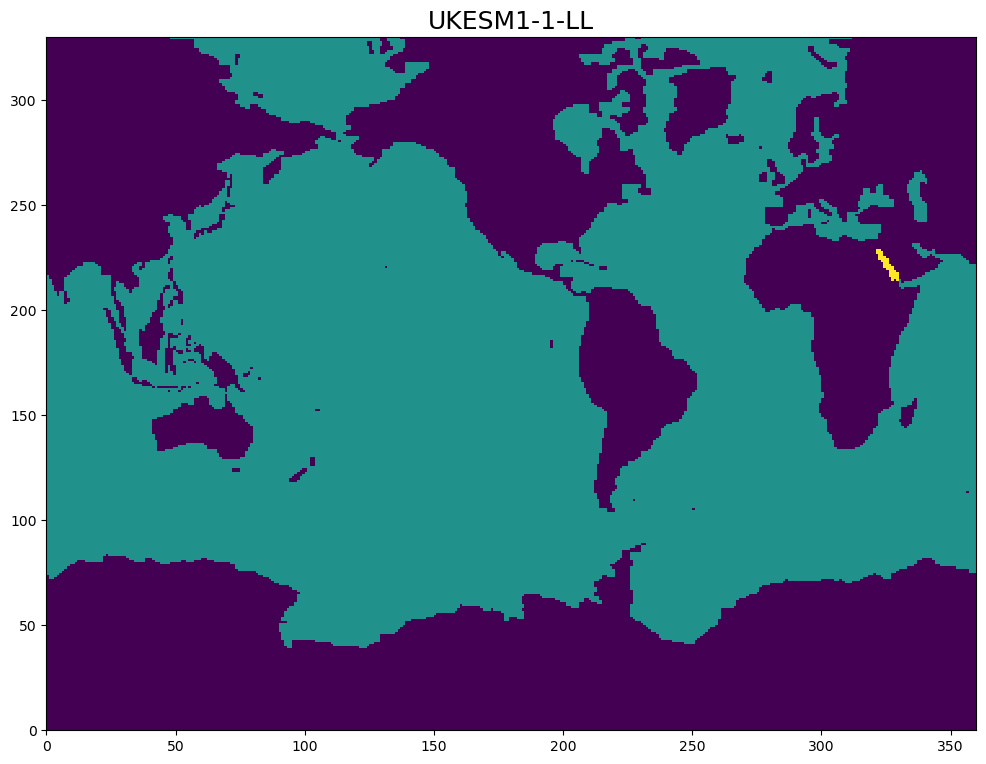

In [11]:
# Compute Red Sea if not Computed:
for mm in range(0,nm):
    Model = Clist[Models[mm]]
    basins = ('/gws/pw/j07/wishbone/jmecki/CMIP' + str(cmip) + '/basins/' + Model.name + '_basins.nc')
    
    # Compute only if basins file already exists and connected not yet computed:
    if os.path.isfile(basins):
        if not check_var(basins,'RedSea'):
            print('Computing Red Sea for ' + Model.name)

            ncid  = Dataset(basins,'r')
            dims  = ncid.variables['Tmask'].get_dims()
            lon   = ncid.variables['lon'][:,:]
            lat   = ncid.variables['lat'][:,:]
            tmask = ncid.variables['Tmask'][:,:]
            ncid.close()
    
            RedSea = copy.deepcopy(tmask)

            # Define Red Sea Region:
            RedSea[np.where(((lat < 12.5) | (lat > 30)) | ((lon < 32) | (lon > 43.25)))] = 0

            ncid = Dataset(basins,'a')
            ncid.createVariable('RedSea','f8',(dims[0].name,dims[1].name,))
            ncid.variables['RedSea'][:,:] = RedSea
            ncid.close()
            
            plt.figure(figsize=(12,9))
            plt.pcolormesh(tmask+RedSea,vmin=0,vmax=2)
            plt.title(Model.name,fontsize=18)
        else:
            print('Red Sea already Computed for ' + Model.name)

            #ncid = Dataset(basins,'r')
            #tmask     = ncid.variables['Tmask'][:,:]
            #RedSea = ncid.variables['RedSea'][:,:]
            #ncid.close()
            
            #plt.figure(figsize=(12,9))
            #plt.pcolormesh(tmask+RedSea,vmin=0,vmax=2)
            #plt.title(Model.name,fontsize=18)

Indo-Pacific already Computed for ACCESS-CM2
Indo-Pacific already Computed for ACCESS-ESM1-5
Indo-Pacific already Computed for ACCESS-OM2
Indo-Pacific already Computed for ACCESS-OM2-025
Indo-Pacific already Computed for BCC-CSM2-HR
Indo-Pacific already Computed for BCC-CSM2-MR
Indo-Pacific already Computed for BCC-ESM1
Indo-Pacific already Computed for CAMS-CSM1-0
Indo-Pacific already Computed for CAS-ESM2-0
Indo-Pacific already Computed for CESM1-CAM5-SE-LR
Indo-Pacific already Computed for CESM2
Indo-Pacific already Computed for CESM2-FV2
Indo-Pacific already Computed for CESM2-WACCM
Indo-Pacific already Computed for CESM2-WACCM-FV2
Indo-Pacific already Computed for CIESM
Indo-Pacific already Computed for CMCC-CM2-HR4
Indo-Pacific already Computed for CMCC-CM2-SR5
Indo-Pacific already Computed for CMCC-CM2-VHR4
Indo-Pacific already Computed for CMCC-ESM2
Indo-Pacific already Computed for CNRM-CM6-1
Indo-Pacific already Computed for CNRM-CM6-1-HR
Indo-Pacific already Computed for CNR

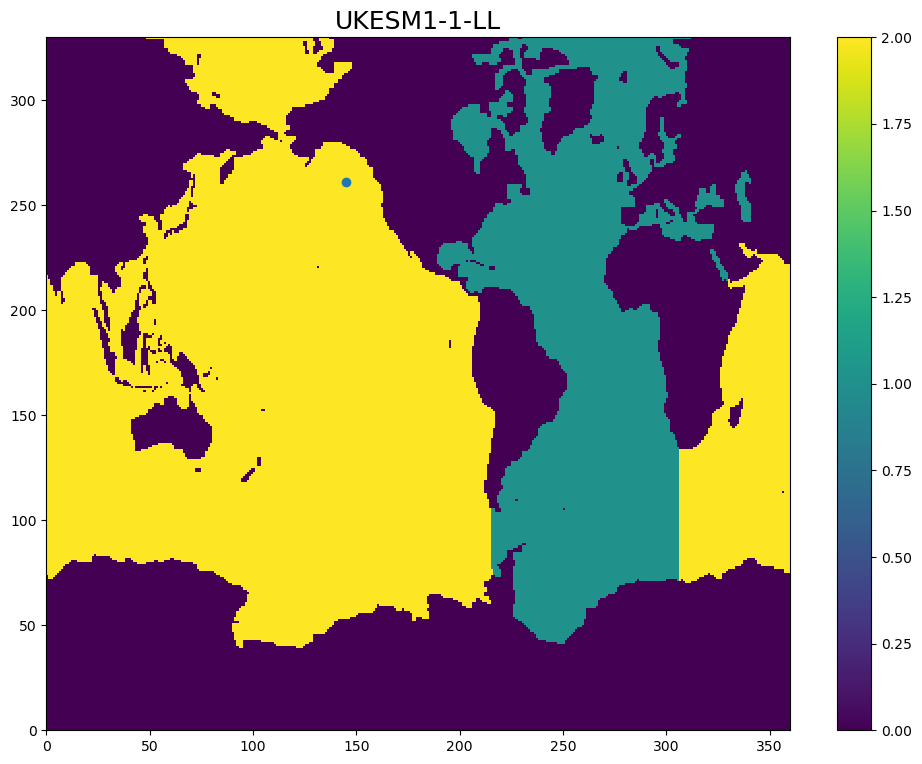

In [12]:
# Compute Indo-Pacific if not Computed:
for mm in range(0,nm):
    Model = Clist[Models[mm]]
    basins = ('/gws/pw/j07/wishbone/jmecki/CMIP' + str(cmip) + '/basins/' + Model.name + '_basins.nc')
    
    # Compute only if basins file already exists and connected not yet computed:
    if os.path.isfile(basins):
        if not check_var(basins,'IndoPacific'):
            print('Computing IndoPacific for ' + Model.name)

            ncid             = Dataset(basins,'r')
            dims             = ncid.variables['Tmask'].get_dims()
            lon              = ncid.variables['lon'][:,:]
            lat              = ncid.variables['lat'][:,:]
            tmask            = ncid.variables['Tmask'][:,:]
            RedSea           = ncid.variables['RedSea'][:,:]
            Atlantic         = ncid.variables['Atlantic'][:,:]
            ncid.close()
            
            IndoPacific = copy.deepcopy(tmask)
            IndoPacific = IndoPacific - Atlantic - RedSea
            
            # Starting point in Pacific:
            inds = np.unravel_index(np.argmin(np.abs(lat-50)+np.abs(lon+140)),np.shape(lon))
            sty = inds[0]
            stx = inds[1] 

            find_points(IndoPacific,sty,stx)

            ncid = Dataset(basins,'a')
            ncid.createVariable('IndoPacific','f8',(dims[0].name,dims[1].name,))
            ncid.variables['IndoPacific'][:,:] = IndoPacific
            ncid.close()
            
            plt.figure(figsize=(12,9))
            plt.pcolormesh(tmask+IndoPacific,vmin=0,vmax=2)
            plt.plot(stx,sty,marker='o')
            plt.title(Model.name,fontsize=18)
            plt.colorbar()
        else:
            print('Indo-Pacific already Computed for ' + Model.name)

            #ncid = Dataset(basins,'r')
            #tmask            = ncid.variables['Tmask'][:,:]
            #IndoPacific      = ncid.variables['IndoPacific'][:,:]
            #ncid.close()
           
            #plt.figure(figsize=(12,9))
            #plt.pcolormesh(tmask+IndoPacific,vmin=0,vmax=2)
            #plt.title(Model.name,fontsize=18)

Bay of Bengal already Computed for ACCESS-CM2
Bay of Bengal already Computed for ACCESS-ESM1-5
Bay of Bengal already Computed for ACCESS-OM2
Bay of Bengal already Computed for ACCESS-OM2-025
Bay of Bengal already Computed for BCC-CSM2-HR
Bay of Bengal already Computed for BCC-CSM2-MR
Bay of Bengal already Computed for BCC-ESM1
Bay of Bengal already Computed for CAMS-CSM1-0
Bay of Bengal already Computed for CAS-ESM2-0
Bay of Bengal already Computed for CESM1-CAM5-SE-LR
Bay of Bengal already Computed for CESM2
Bay of Bengal already Computed for CESM2-FV2
Bay of Bengal already Computed for CESM2-WACCM
Bay of Bengal already Computed for CESM2-WACCM-FV2
Bay of Bengal already Computed for CIESM
Bay of Bengal already Computed for CMCC-CM2-HR4
Bay of Bengal already Computed for CMCC-CM2-SR5
Bay of Bengal already Computed for CMCC-CM2-VHR4
Bay of Bengal already Computed for CMCC-ESM2
Bay of Bengal already Computed for CNRM-CM6-1
Bay of Bengal already Computed for CNRM-CM6-1-HR
Bay of Bengal al

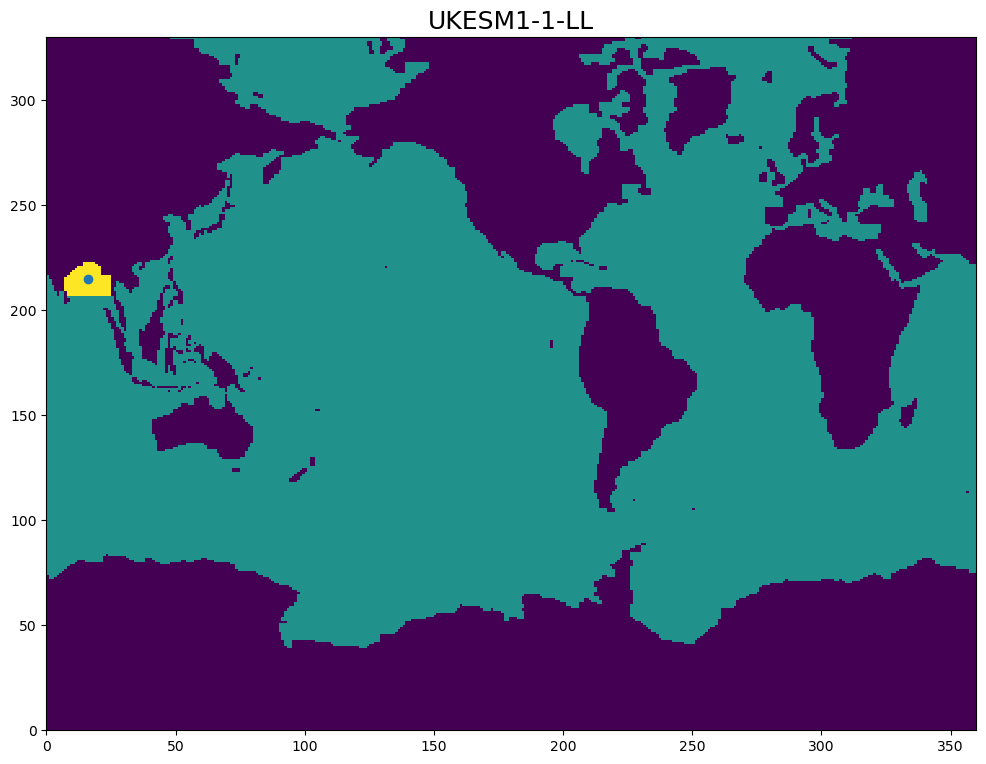

In [13]:
# Compute BayOfBengal if not Computed:
for mm in range(0,nm):
    Model = Clist[Models[mm]]
    basins = ('/gws/pw/j07/wishbone/jmecki/CMIP' + str(cmip) + '/basins/' + Model.name + '_basins.nc')
    
    # Compute only if basins file already exists and connected not yet computed:
    if os.path.isfile(basins):
        if not check_var(basins,'BayOfBengal'):
            print('Computing Bay of Bengal for ' + Model.name)

            ncid  = Dataset(basins,'r')
            dims  = ncid.variables['Tmask'].get_dims()
            lon   = ncid.variables['lon'][:,:]
            lat   = ncid.variables['lat'][:,:]
            tmask            = ncid.variables['Tmask'][:,:]
            IndoPacific = ncid.variables['IndoPacific'][:,:]
            ncid.close()
    
            BayOfBengal = copy.deepcopy(IndoPacific)

            # Define Bay of Bengal Region:
            BayOfBengal[np.where(((lat < 8) | (lat > 25)) | ((lon < 77) | (lon > 99)))] = 0
    
            # Starting point in Bay of Bengal:
            inds = np.unravel_index(np.argmin(np.abs(lat-15)+np.abs(lon-90)),np.shape(lon))
            sty = inds[0]
            stx = inds[1]

            find_points(BayOfBengal,sty,stx)

            ncid = Dataset(basins,'a')
            ncid.createVariable('BayOfBengal','f8',(dims[0].name,dims[1].name,))
            ncid.variables['BayOfBengal'][:,:] = BayOfBengal
            ncid.close()
            
            plt.figure(figsize=(12,9))
            plt.pcolormesh(tmask+BayOfBengal,vmin=0,vmax=2)
            plt.plot(stx,sty,marker='o')
            plt.title(Model.name,fontsize=18)
        else:
            print('Bay of Bengal already Computed for ' + Model.name)

            #ncid = Dataset(basins,'r')
            #tmask     = ncid.variables['Tmask'][:,:]
            #BayOfBengal = ncid.variables['BayOfBengal'][:,:]
            #ncid.close()
            
            #plt.figure(figsize=(12,9))
            #plt.pcolormesh(tmask+BayOfBengal,vmin=0,vmax=2)
            #plt.title(Model.name,fontsize=18)

# Potential fixes:
# Reducing box size to cut off Indonesian through flow (~99E)
# Look at depths to define Indonesian through flow (define eastern cut off longitude)

Arabian Sea already Computed for ACCESS-CM2
Arabian Sea already Computed for ACCESS-ESM1-5
Arabian Sea already Computed for ACCESS-OM2
Arabian Sea already Computed for ACCESS-OM2-025
Arabian Sea already Computed for BCC-CSM2-HR
Arabian Sea already Computed for BCC-CSM2-MR
Arabian Sea already Computed for BCC-ESM1
Arabian Sea already Computed for CAMS-CSM1-0
Arabian Sea already Computed for CAS-ESM2-0
Arabian Sea already Computed for CESM1-CAM5-SE-LR
Arabian Sea already Computed for CESM2
Arabian Sea already Computed for CESM2-FV2
Arabian Sea already Computed for CESM2-WACCM
Arabian Sea already Computed for CESM2-WACCM-FV2
Arabian Sea already Computed for CIESM
Arabian Sea already Computed for CMCC-CM2-HR4
Arabian Sea already Computed for CMCC-CM2-SR5
Arabian Sea already Computed for CMCC-CM2-VHR4
Arabian Sea already Computed for CMCC-ESM2
Arabian Sea already Computed for CNRM-CM6-1
Arabian Sea already Computed for CNRM-CM6-1-HR
Arabian Sea already Computed for CNRM-ESM2-1
Arabian Sea a

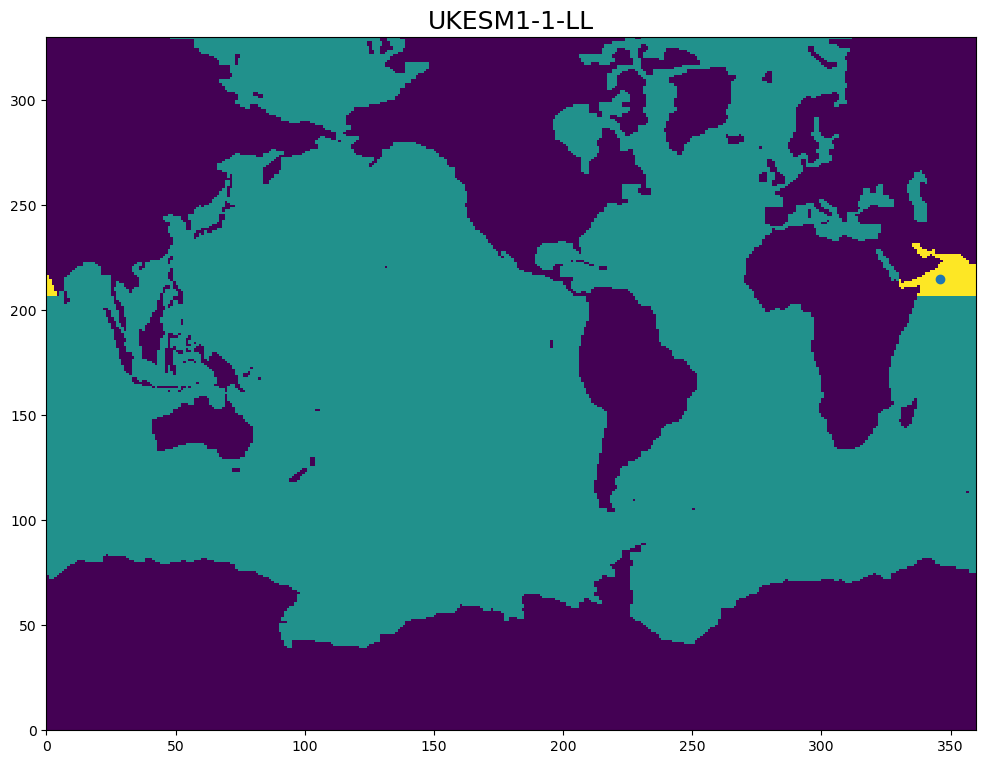

In [14]:
# Compute Arabian Sea if not Computed:
for mm in range(0,nm):
    Model = Clist[Models[mm]]
    basins = ('/gws/pw/j07/wishbone/jmecki/CMIP' + str(cmip) + '/basins/' + Model.name + '_basins.nc')
    
    # Compute only if basins file already exists and connected not yet computed:
    if os.path.isfile(basins):
        if not check_var(basins,'ArabianSea'):
            print('Computing ArabianSea for ' + Model.name)

            ncid  = Dataset(basins,'r')
            dims  = ncid.variables['Tmask'].get_dims()
            lon   = ncid.variables['lon'][:,:]
            lat   = ncid.variables['lat'][:,:]
            tmask            = ncid.variables['Tmask'][:,:]
            RedSea           = ncid.variables['RedSea'][:,:]
            BayOfBengal      = ncid.variables['BayOfBengal'][:,:]
            IndoPacific = ncid.variables['IndoPacific'][:,:]
            ncid.close()
    
            ArabianSea = copy.deepcopy(IndoPacific) - RedSea - BayOfBengal

            # Define Arabian Sea Region:
            ArabianSea[np.where(((lat < 8) | (lat > 31)) | ((lon <= 43.25) | (lon >= 77)))] = 0
    
            # Starting point in Arabian Sea:
            inds = np.unravel_index(np.argmin(np.abs(lat-15)+np.abs(lon-60)),np.shape(lon))
            sty = inds[0]
            stx = inds[1]

            find_points(ArabianSea,sty,stx)

            ncid = Dataset(basins,'a')
            ncid.createVariable('ArabianSea','f8',(dims[0].name,dims[1].name,))
            ncid.variables['ArabianSea'][:,:] = ArabianSea
            ncid.close()
            
            plt.figure(figsize=(12,9))
            plt.pcolormesh(tmask+ArabianSea,vmin=0,vmax=2)
            plt.plot(stx,sty,marker='o')
            plt.title(Model.name,fontsize=18)
        else:
            print('Arabian Sea already Computed for ' + Model.name)

            #ncid = Dataset(basins,'r')
            #tmask     = ncid.variables['Tmask'][:,:]
            #ArabianSea = ncid.variables['ArabianSea'][:,:]
            #ncid.close()
            
            #plt.figure(figsize=(12,9))
            #plt.pcolormesh(tmask+ArabianSea,vmin=0,vmax=2)
            #plt.title(Model.name,fontsize=18)

In [ ]:
plt.figure(figsize=(12,9))
plt.pcolormesh(tmask+ArabianSea,vmin=0,vmax=2)
plt.plot(stx,sty,marker='o')
plt.title(Model.name,fontsize=18)